# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

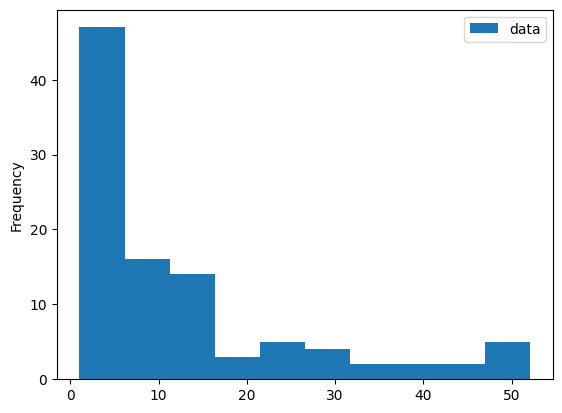

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

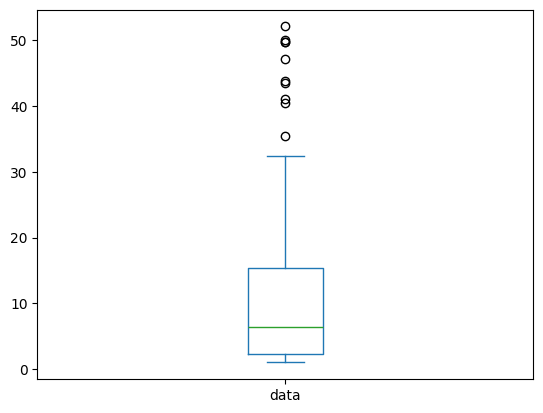

In [3]:
df.plot.box()

**Histogram**

Pros :
1. Distribution Shape : The histogram provides a clear visualization of the overall distribution of drug prices, showing how frequently different price ranges occur.
2. Skewness Identification : Since the data is generated using an exponential function (np.exp), it is likely skewed. A histogram makes this skewness visually apparent. This histrogram has a long tail on the right side, so it shows postive skewness. 
3. Granularity : It shows the density of data points across different price ranges, helping to identify clusters or gaps in the data.

Cons :
1. Lack of Specific Quantiles : While the histogram shows general trends, it does not explicitly highlight specific quantiles (e.g., median, quartiles) that are critical for understanding "how much the more expensive drugs tend to cost."
2. Bin Sensitivity : The appearance of the histogram depends on the number of bins chosen. Poor binning can obscure patterns or create misleading impressions.

**Boxplot**

Pros :
1. Quantile Information : The boxplot explicitly shows key statistics such as the median, interquartile range (IQR), and outliers, which are essential for answering the administrator's question about the cost of more expensive drugs.
2. Outlier Detection : The boxplot highlights potential outliers (e.g., extremely expensive drugs), making it easier to focus on these values.
3. Compact Representation : It summarizes the data in a concise way, making it easy to compare distributions if multiple datasets were involved.

Cons :
1. Limited Distribution Details : The boxplot does not show the detailed shape of the distribution (e.g., skewness or multimodality, kurtosis etc).
2. Less Intuitive for Non-Experts : For users unfamiliar with boxplots, interpreting the meaning of whiskers, quartiles, and outliers may require additional explanation.

**Which Representation would be a better choice?**

To answer the administrator's question—"How much do the more expensive drugs tend to cost, in the context of the other prices?"—the boxplot is the better choice. This is because:

1. It directly highlights the upper quartile (75th percentile) and outliers, which correspond to the "more expensive drugs."
2. It provides a clear numerical context for these expensive drugs relative to the rest of the data (e.g., median and IQR).

The histogram, while useful for understanding the overall distribution, does not emphasize specific quantiles or outliers as effectively.

**Modifications to Improve Visual Clarity and Interest**

For the Boxplot :
1. Add Labels for Key Statistics : Annotate the plot with the exact values of the median, 75th percentile, and any outliers to make it more informative.
Example: Add a text annotation like "75th Percentile: $X" near the upper quartile line.
2. Color Coding : Use contrasting colors for the box (e.g., light blue for the IQR) and outliers (e.g., red dots) to draw attention to the more expensive drugs.
3. Logarithmic Scale : Since the data is exponentially distributed, applying a logarithmic scale to the y-axis can make the boxplot easier to interpret.
4. Title and Context : Add a descriptive title, such as "Distribution of Drug Prices with Focus on Expensive Drugs".
Include axis labels, e.g., "Drug Price ($)".

For the Histogram :
1. Overlay Summary Statistics : Add vertical lines or annotations for the median, 75th percentile, and mean to provide additional context.
2. Adjust Bin Width : Experiment with different bin sizes to ensure the histogram accurately reflects the data's distribution without being overly granular or oversimplified.
3. Highlight the Upper Tail : Use a different color or shading for the bins corresponding to the upper quartile and above to emphasize the more expensive drugs.
4. Logarithmic Scale : Apply a logarithmic scale to the x-axis to better visualize the long tail of the exponential distribution.


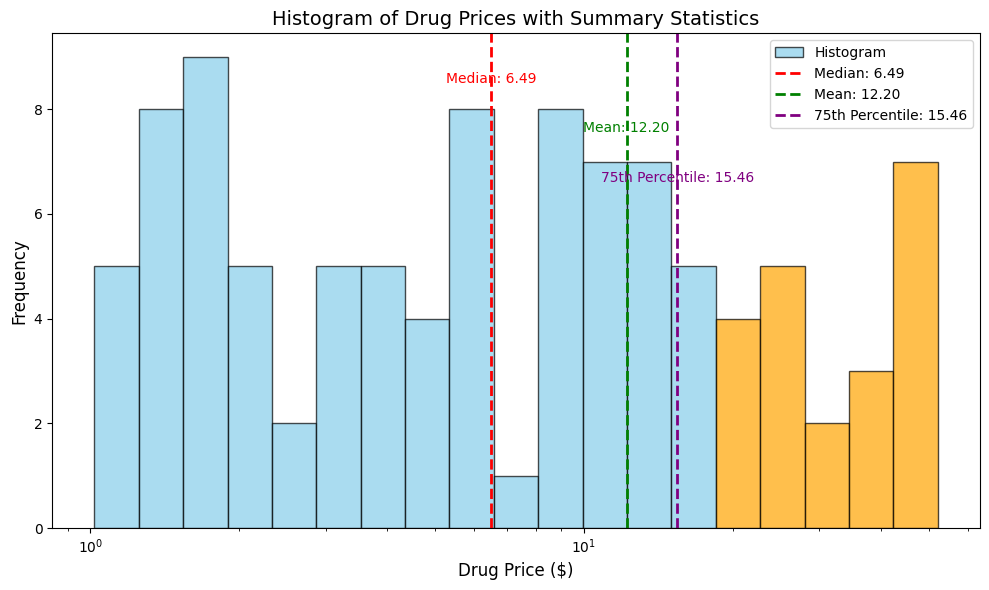

In [4]:
# Histogram 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate the data
np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size=num_data) * 4)
df = pd.DataFrame(data.T, columns=["data"])

# Calculate summary statistics
median = df["data"].median()
mean = df["data"].mean()
q75 = df["data"].quantile(q=0.75)

# Create the histogram
plt.figure(figsize=(10, 6))

# Adjust bin width
bins = np.logspace(np.log10(df["data"].min()), np.log10(df["data"].max()), 20)  # Logarithmic bins
hist, edges, patches = plt.hist(df["data"], bins=bins, edgecolor="black", alpha=0.7, color="skyblue", label="Histogram")

# Highlight the upper tail (bins >= 75th percentile)
for i, patch in enumerate(patches):
    if edges[i] >= q75:  # Highlight bins corresponding to the upper quartile and above
        patch.set_facecolor("orange")

# Overlay summary statistics
plt.axvline(median, color="red", linestyle="--", linewidth=2, label=f"Median: {median:.2f}")
plt.axvline(mean, color="green", linestyle="--", linewidth=2, label=f"Mean: {mean:.2f}")
plt.axvline(q75, color="purple", linestyle="--", linewidth=2, label=f"75th Percentile: {q75:.2f}")

# Add annotations for summary statistics
plt.text(median, plt.ylim()[1] * 0.9, f"Median: {median:.2f}", color="red", ha="center")
plt.text(mean, plt.ylim()[1] * 0.8, f"Mean: {mean:.2f}", color="green", ha="center")
plt.text(q75, plt.ylim()[1] * 0.7, f"75th Percentile: {q75:.2f}", color="purple", ha="center")

# Apply logarithmic scale to the x-axis
plt.xscale("log")

# Add labels, title, and legend
plt.xlabel("Drug Price ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Histogram of Drug Prices with Summary Statistics", fontsize=14)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

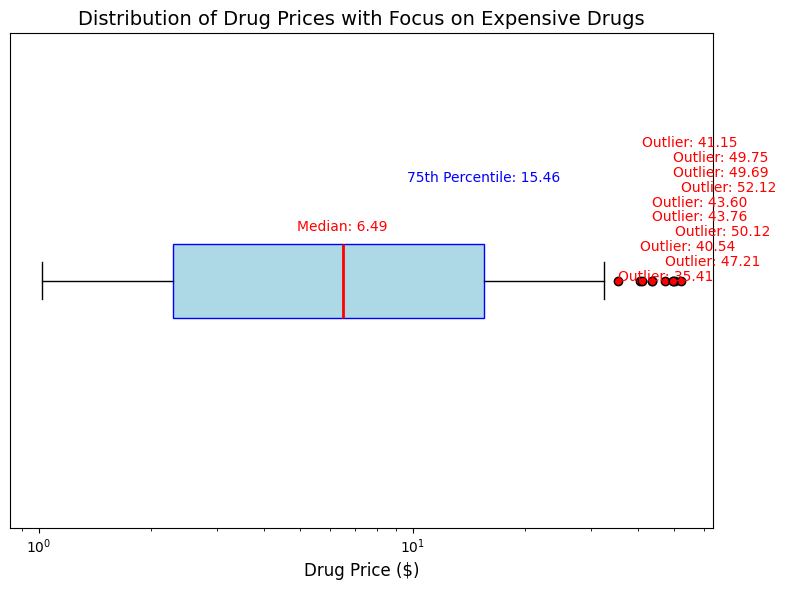

In [5]:
# Boxplot 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate the data
np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size=num_data) * 4)
df = pd.DataFrame(data.T, columns=["data"])

# Calculate summary statistics
median = df["data"].median()
q75 = df["data"].quantile(q=0.75)
outliers = df[df["data"] > q75 + 1.5 * (q75 - df["data"].quantile(q=0.25))]["data"]

# Create the boxplot
plt.figure(figsize=(8, 6))

# Boxplot with color coding
boxprops = dict(color="blue", facecolor="lightblue")  # IQR box color
medianprops = dict(color="red", linewidth=2)         # Median line color
flierprops = dict(marker='o', markerfacecolor="red", markersize=6, linestyle='none')  # Outliers color

# Plot the boxplot
box = plt.boxplot(df["data"], vert=False, patch_artist=True, boxprops=boxprops,
                  medianprops=medianprops, flierprops=flierprops)

# Add annotations for key statistics
plt.text(median, 1.1, f"Median: {median:.2f}", color="red", ha="center")
plt.text(q75, 1.2, f"75th Percentile: {q75:.2f}", color="blue", ha="center")

# Annotate outliers
for i, outlier in enumerate(outliers):
    plt.text(outlier, 1.0 + 0.03 * i, f"Outlier: {outlier:.2f}", color="red", ha="left")

# Apply logarithmic scale to the x-axis
plt.xscale("log")

# Add title and axis labels
plt.title("Distribution of Drug Prices with Focus on Expensive Drugs", fontsize=14)
plt.xlabel("Drug Price ($)", fontsize=12)
plt.yticks([])  # Remove y-axis ticks since there's only one group

# Show the plot
plt.tight_layout()
plt.show()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

Important Note: Own dataset will be used for the Homework 04. I am going to use the Red Wine Dataset, which has been used in the previous semster, Fall 2024. 

In [6]:
import math
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

red_wine = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz", sep="\t")
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
red_wine.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  target  
0      9.4       5  
1      9.8       5  
2      9.8       5  
3      9.8       6  
4      9.4       5  
5      9.4       5  
6      9.4       5  
7     10.0       7  
8      9.5       7  
9     10.5       5

**Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).**

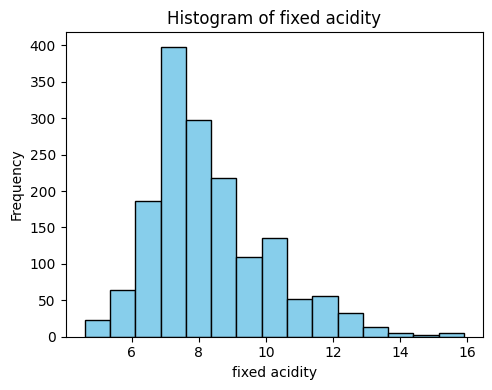

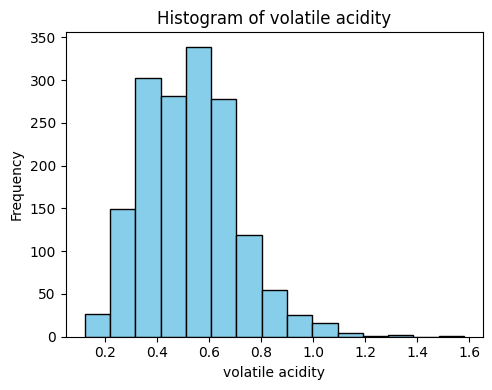

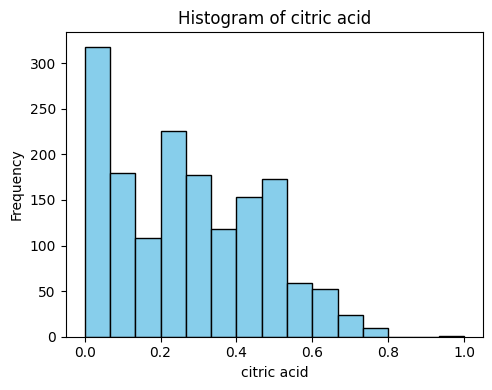

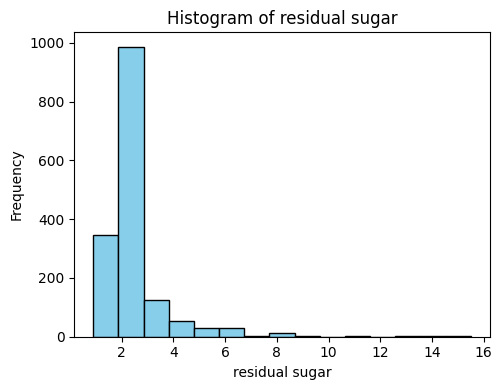

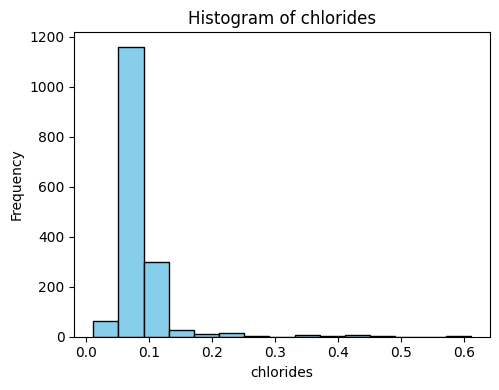

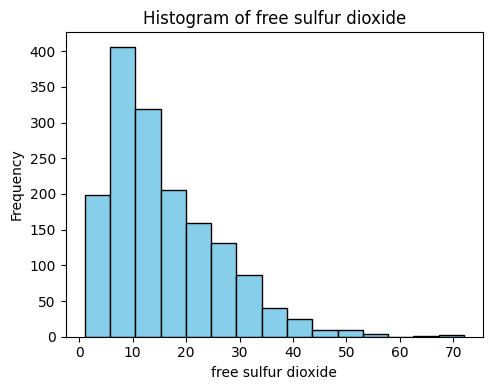

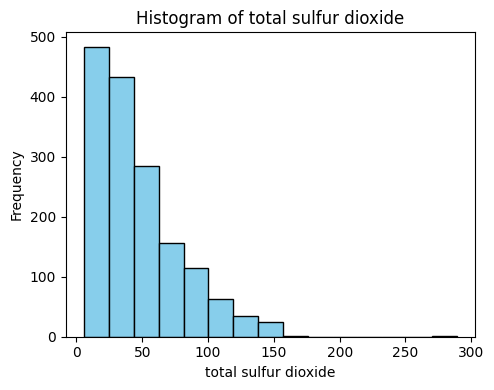

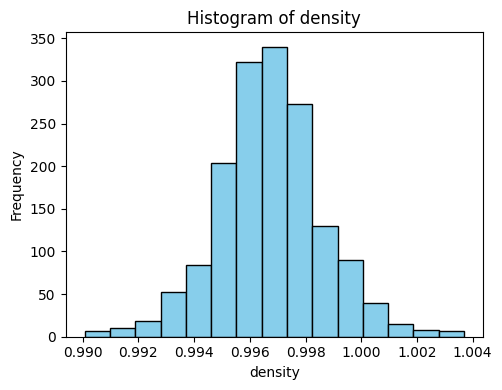

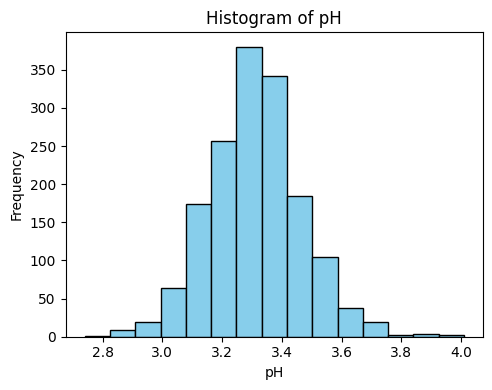

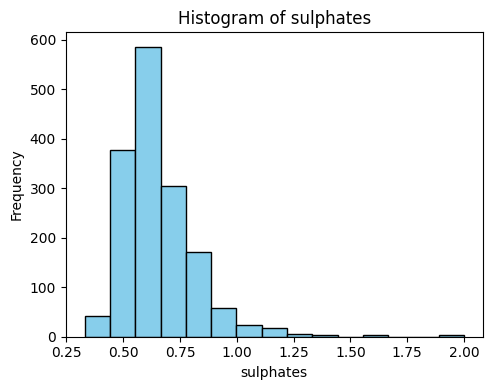

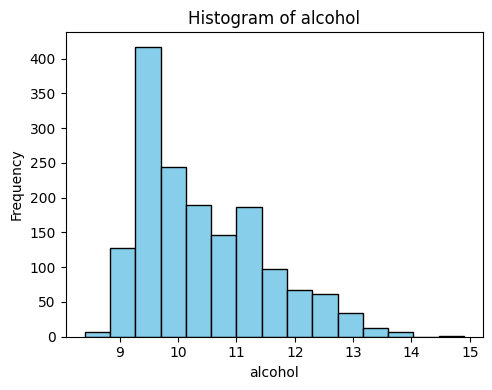

In [8]:
# Draw Histogram for each Feature/ Column
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Loop through each column (excluding the target column)
for i, column in enumerate(red_wine.columns[:-1]):  # Exclude 'target'
    plt.figure(figsize=(18, 4))
    
    # Histogram
    plt.subplot(1, 4, 1)
    plt.hist(red_wine[column], bins=15, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {column}", fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel("Frequency", fontsize=10)

    plt.tight_layout()
    plt.show()

**To create histogram variants for each feature or column in the dataset, we can explore multiple ways of visualizing histograms. These variants include:**

1. Basic Histogram : A standard histogram showing the frequency distribution.
2. Stacked Histogram : Groups data by a categorical variable (e.g., target) and stacks the bars.
3. Overlay Histogram : Overlays histograms for different groups (e.g., target) with transparency.
4. Cumulative Histogram : Shows the cumulative distribution of values.
5. Normalized Histogram : Displays the proportion (density) instead of raw frequencies.

Note: Below code shows the Histogram Varinants

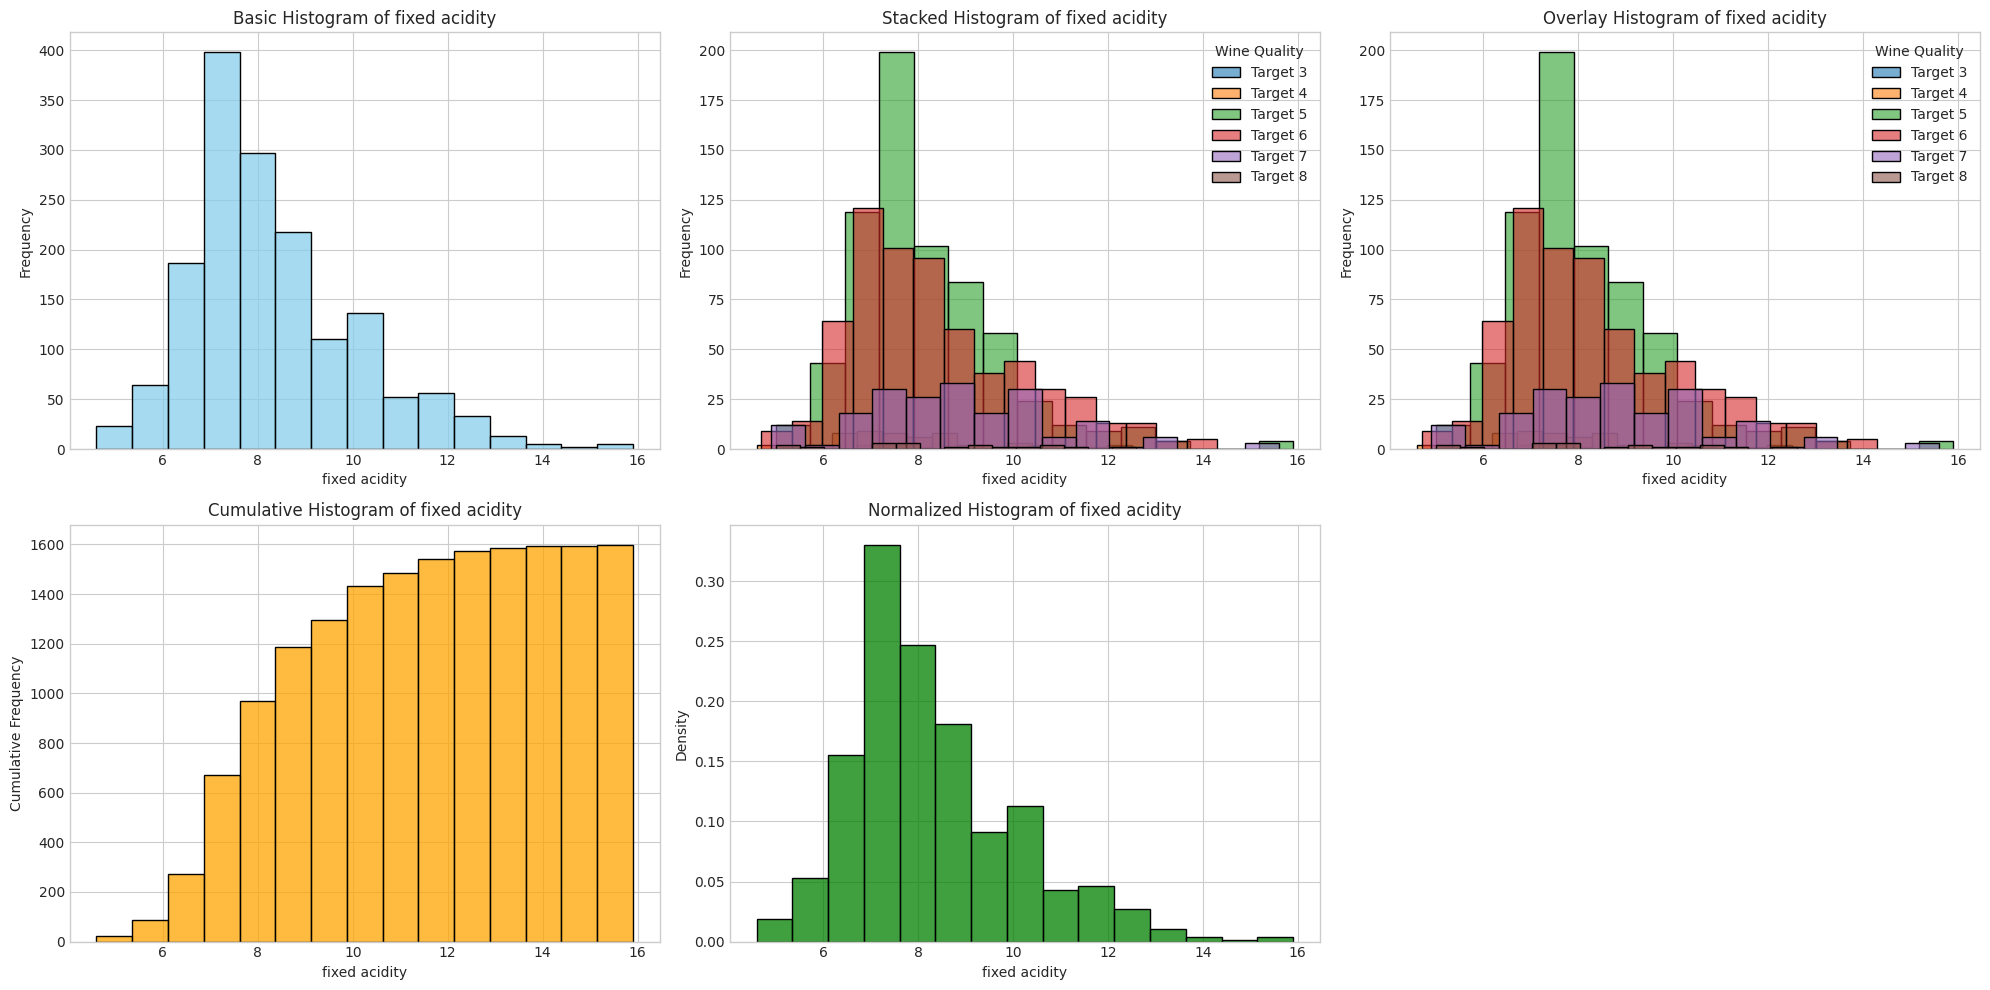

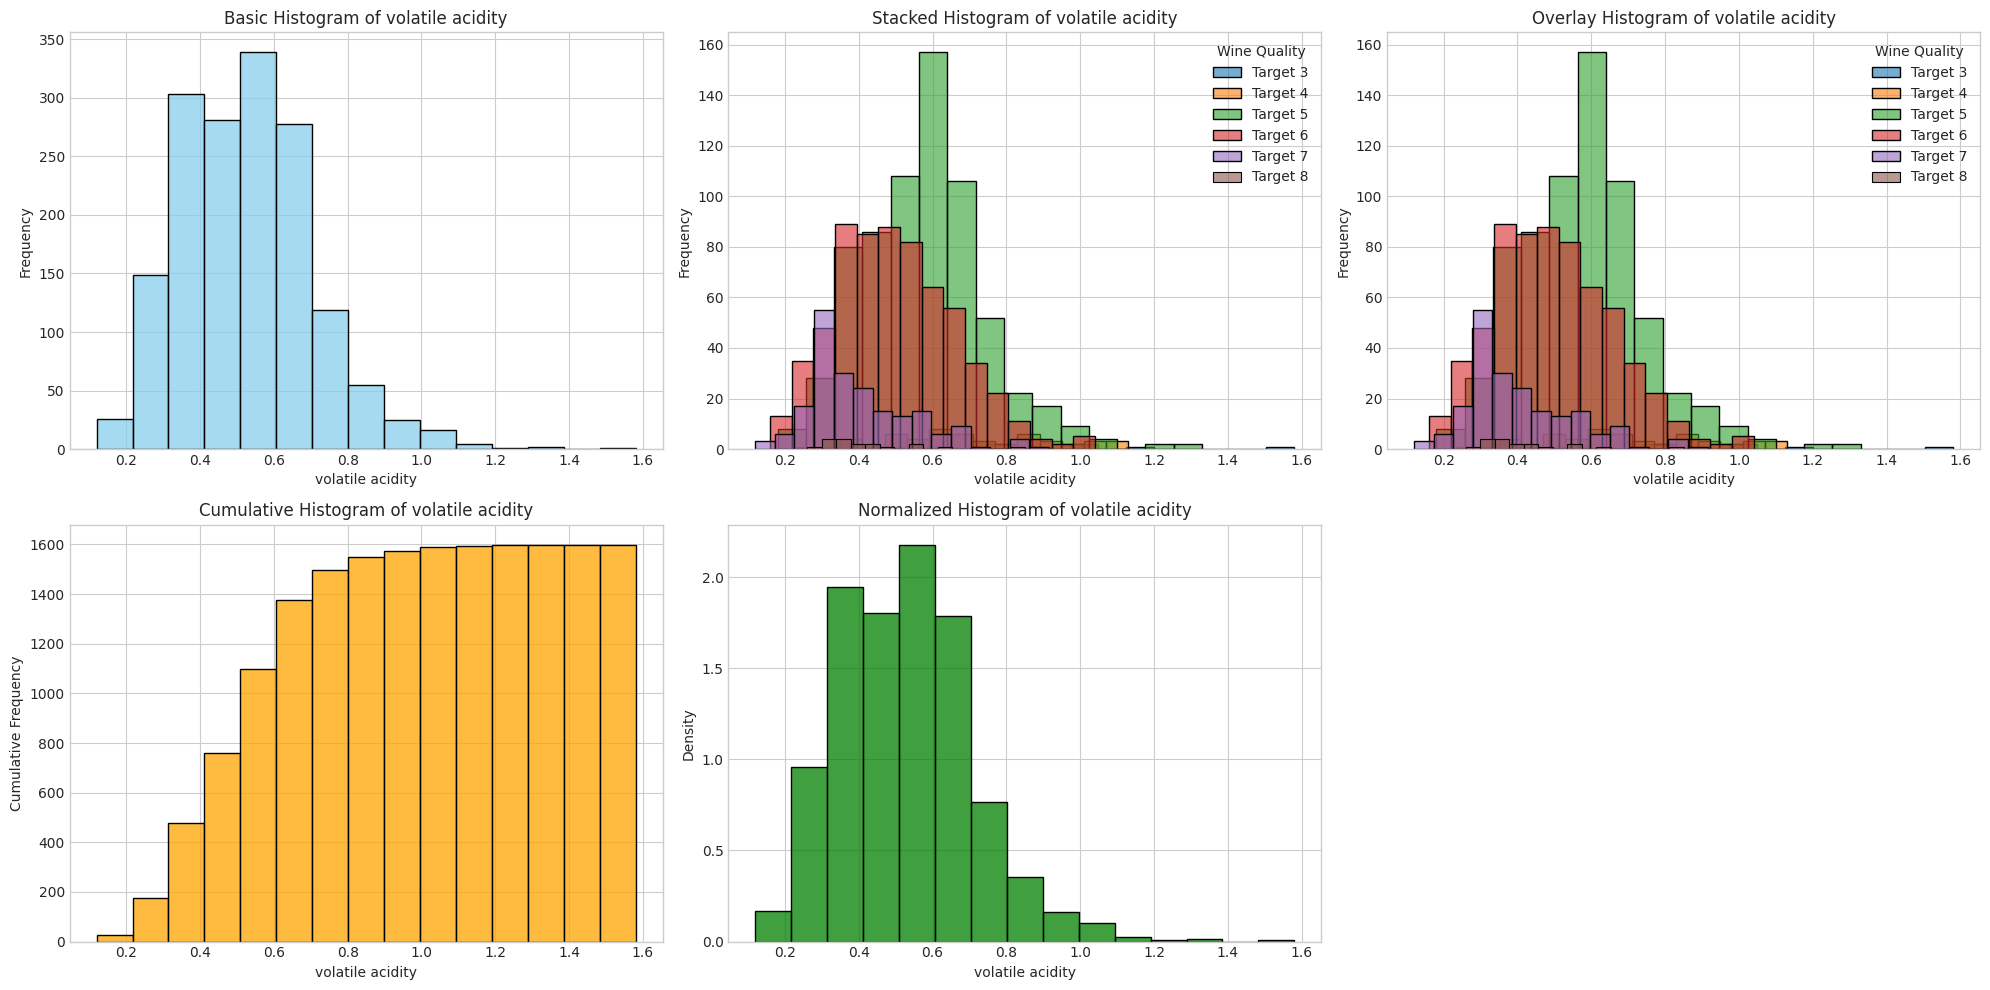

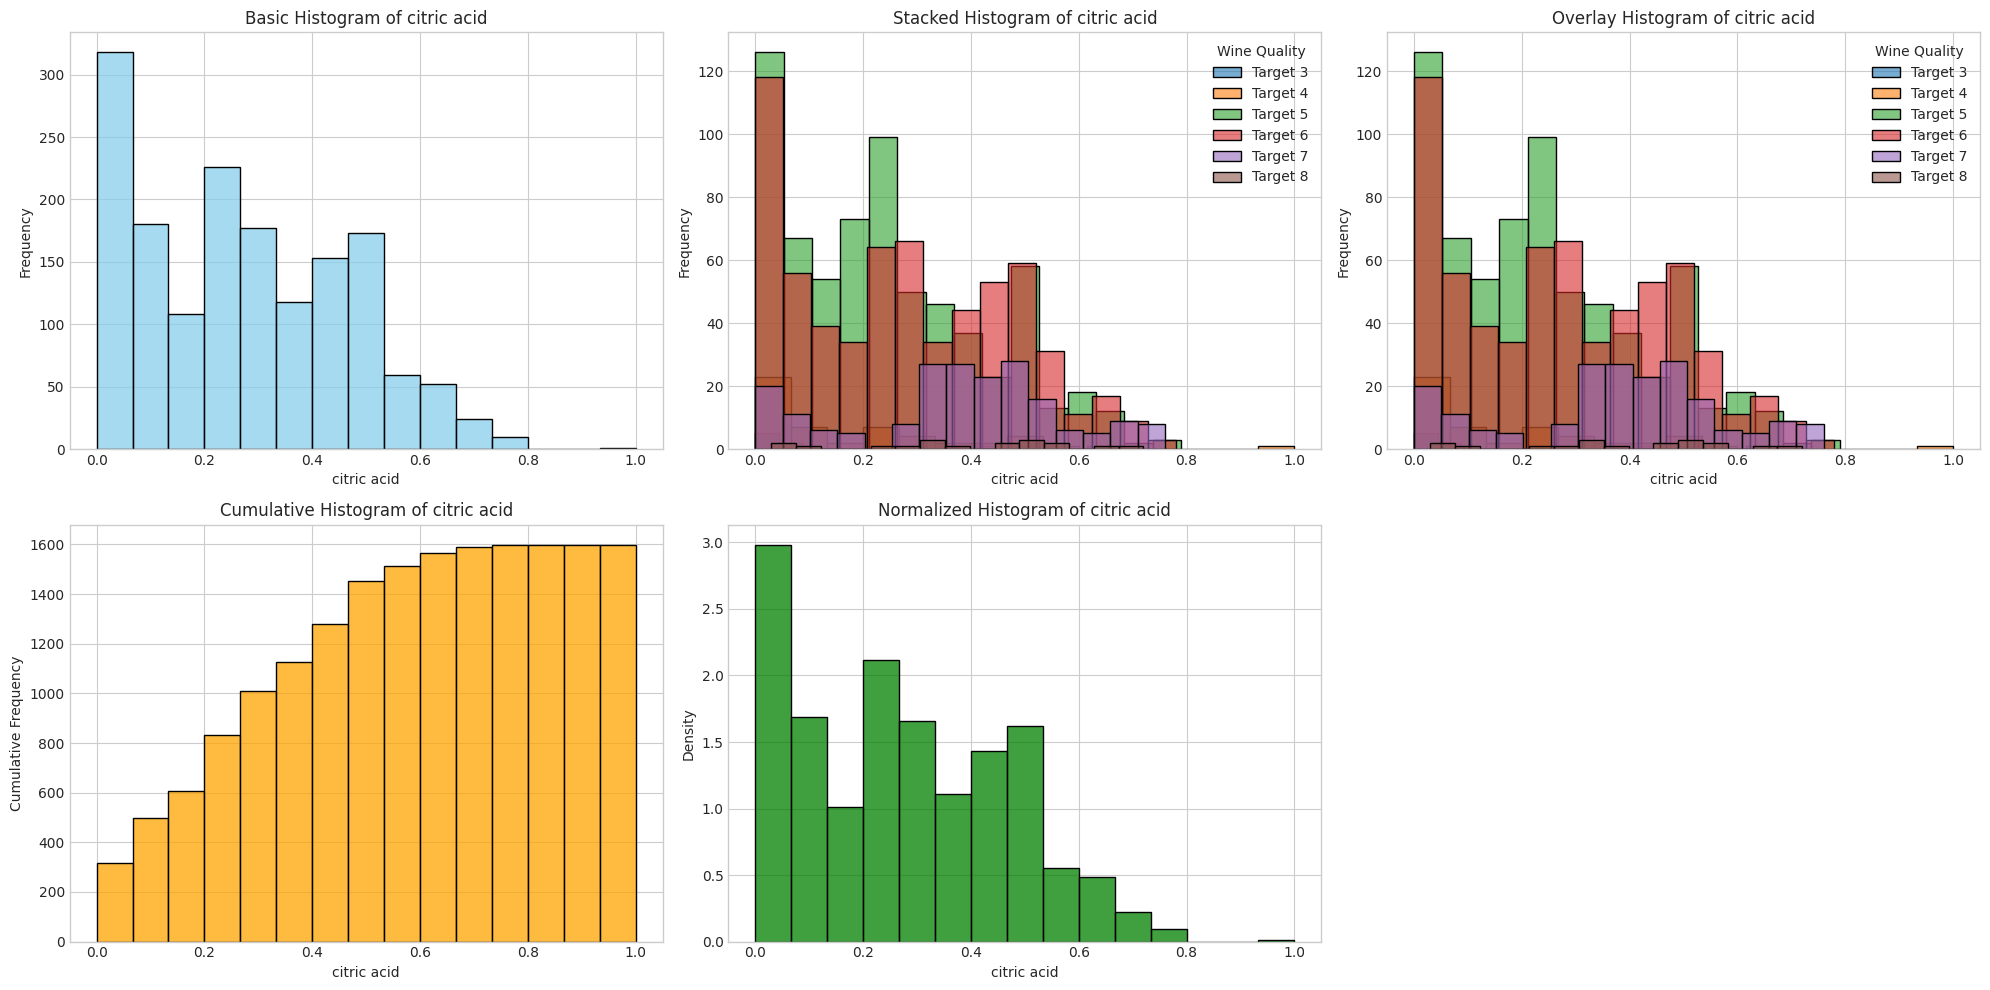

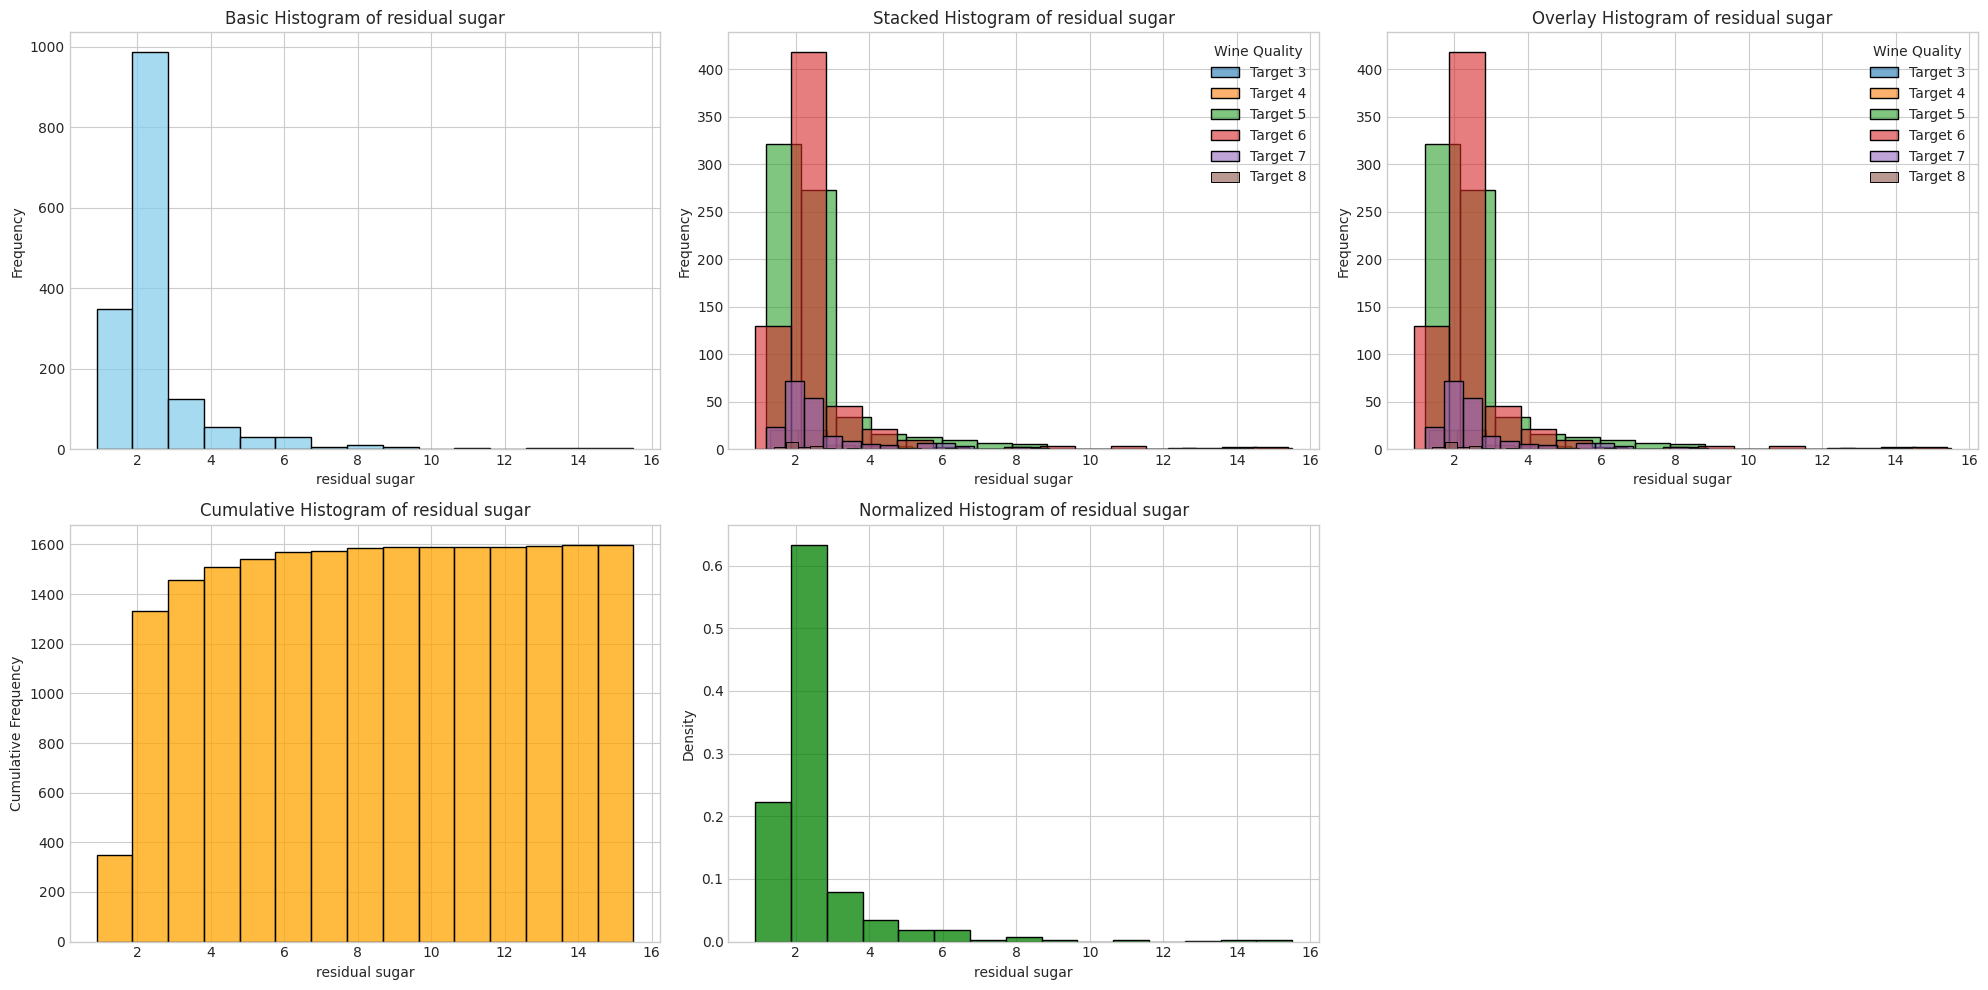

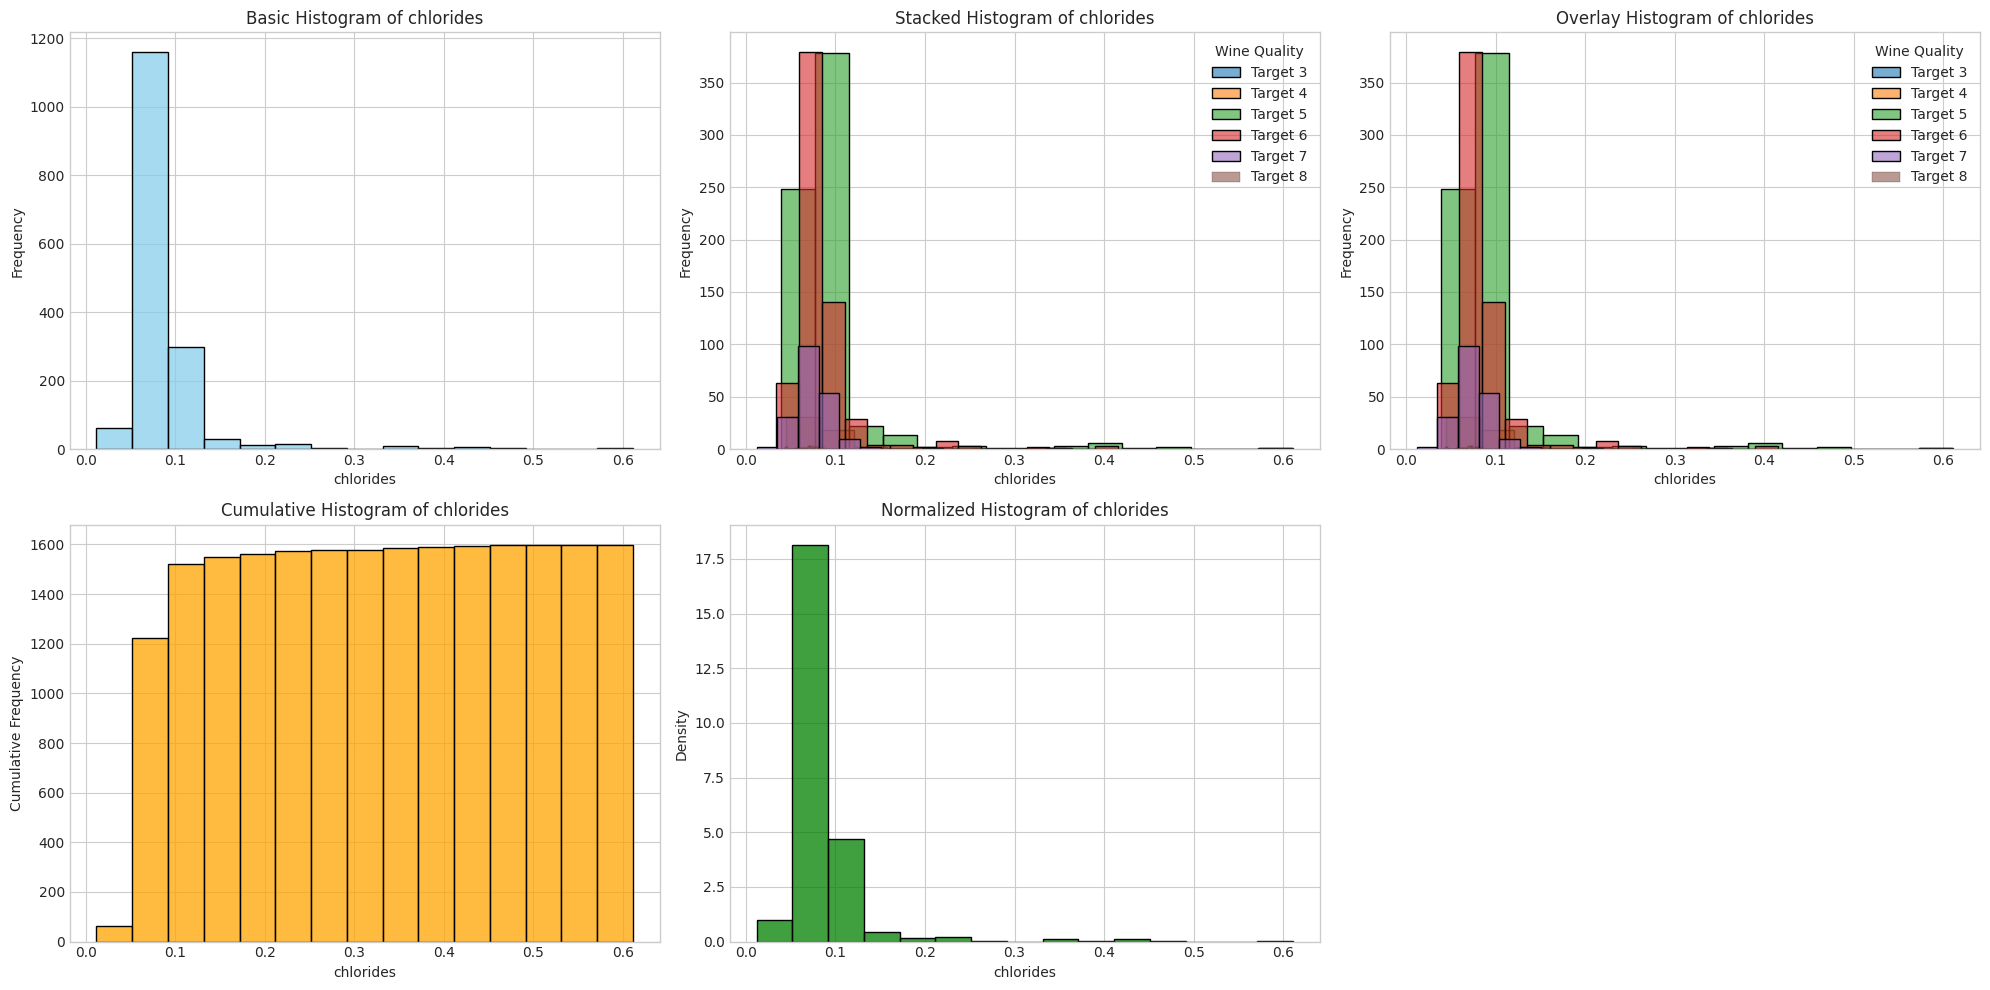

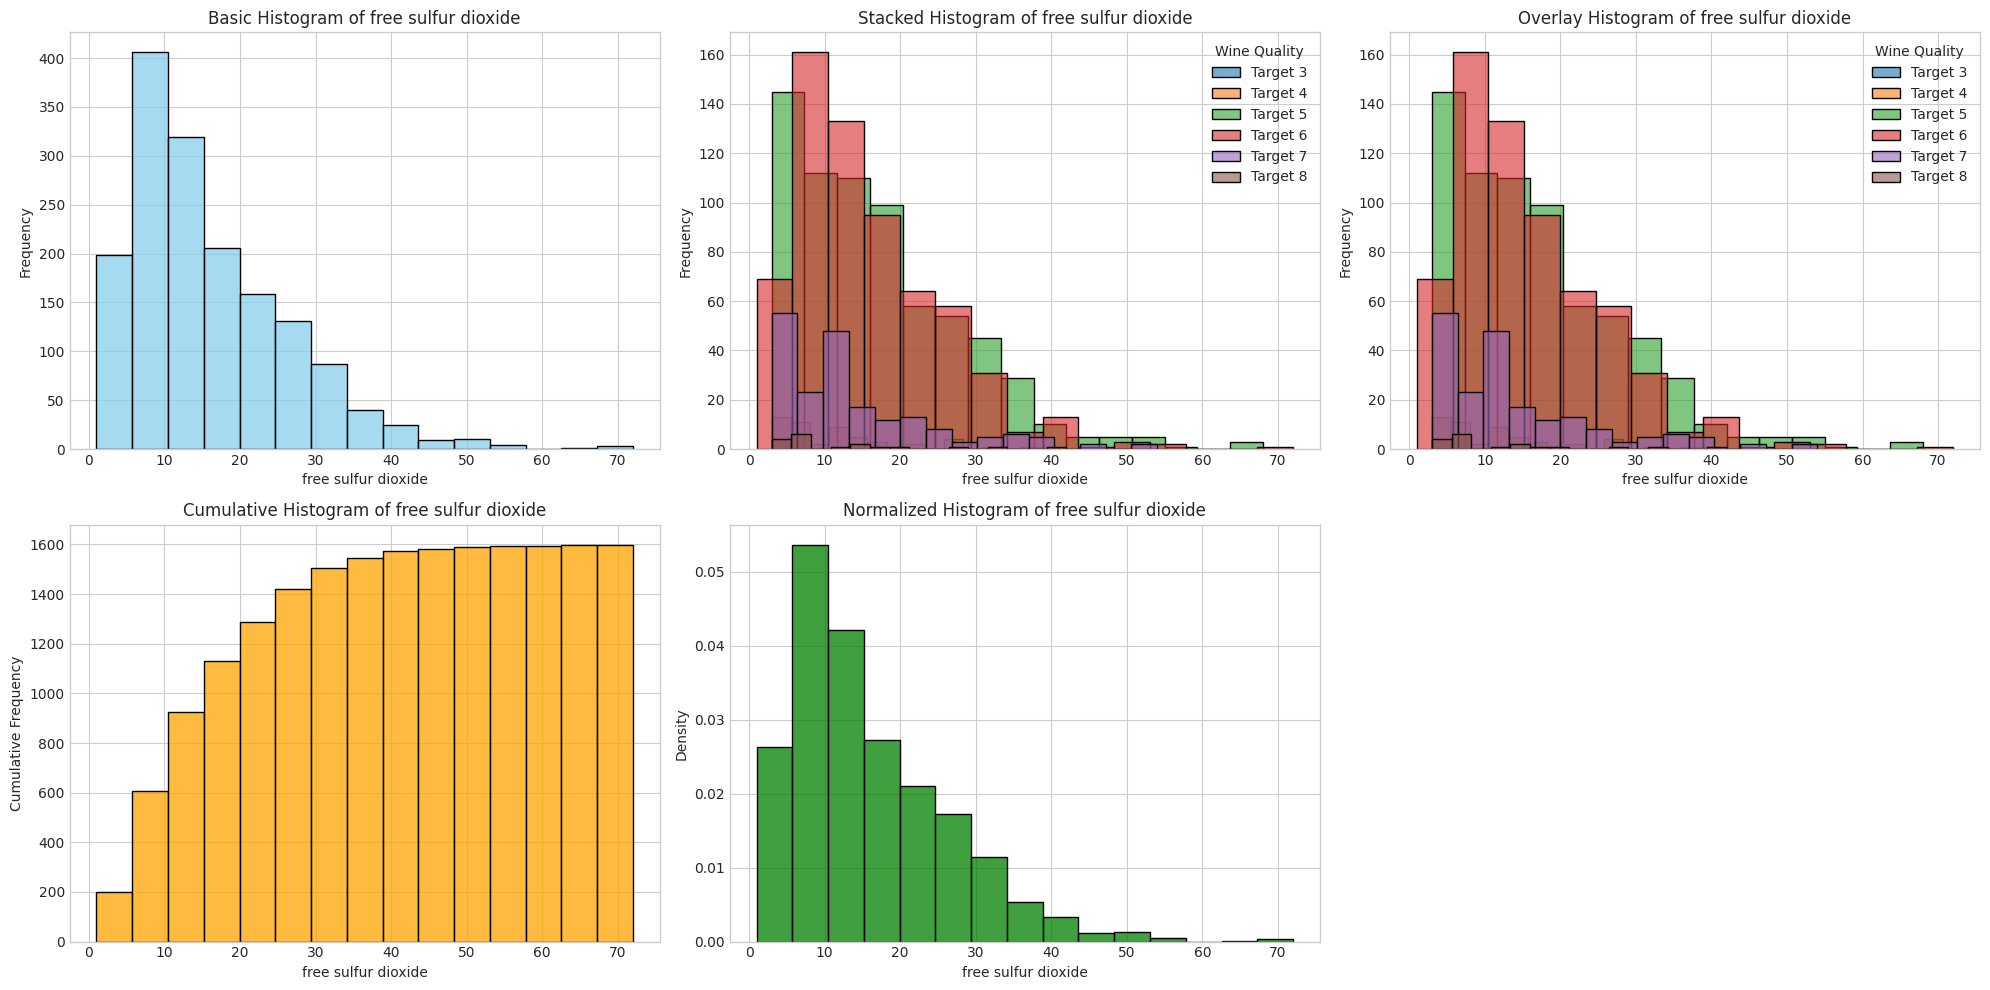

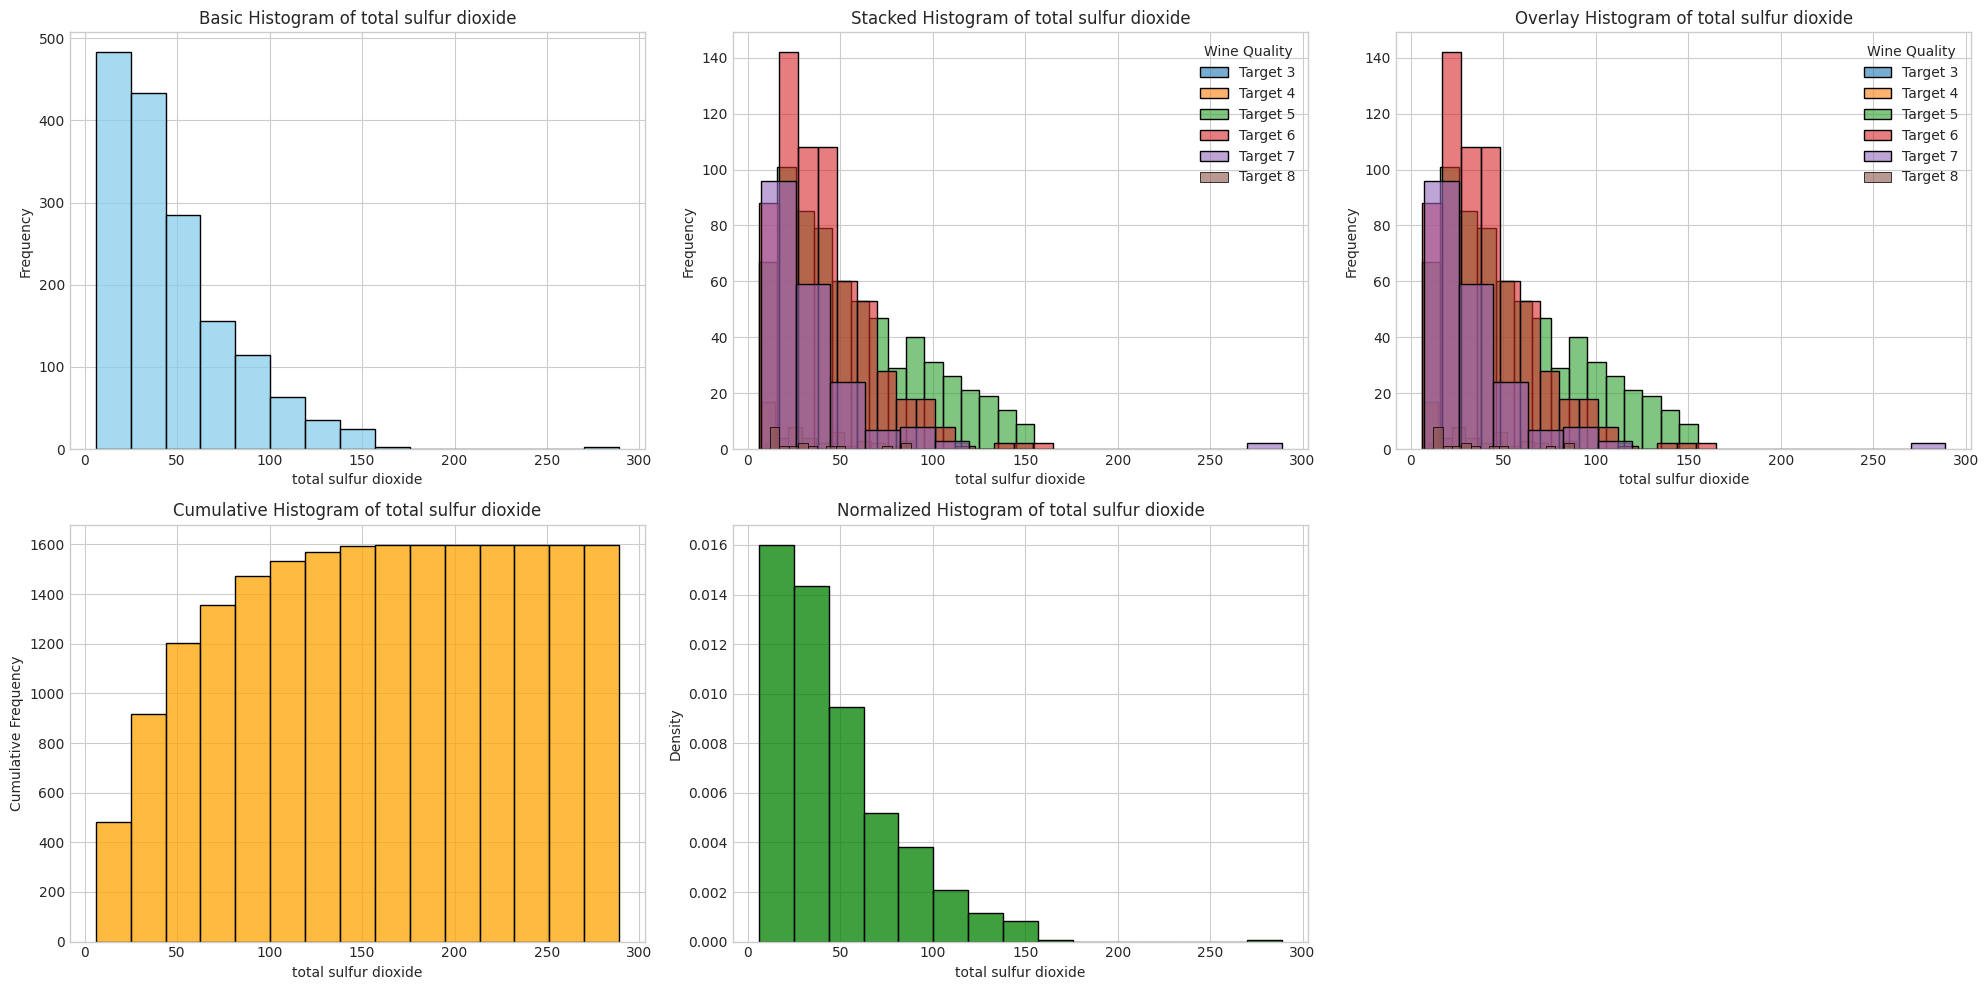

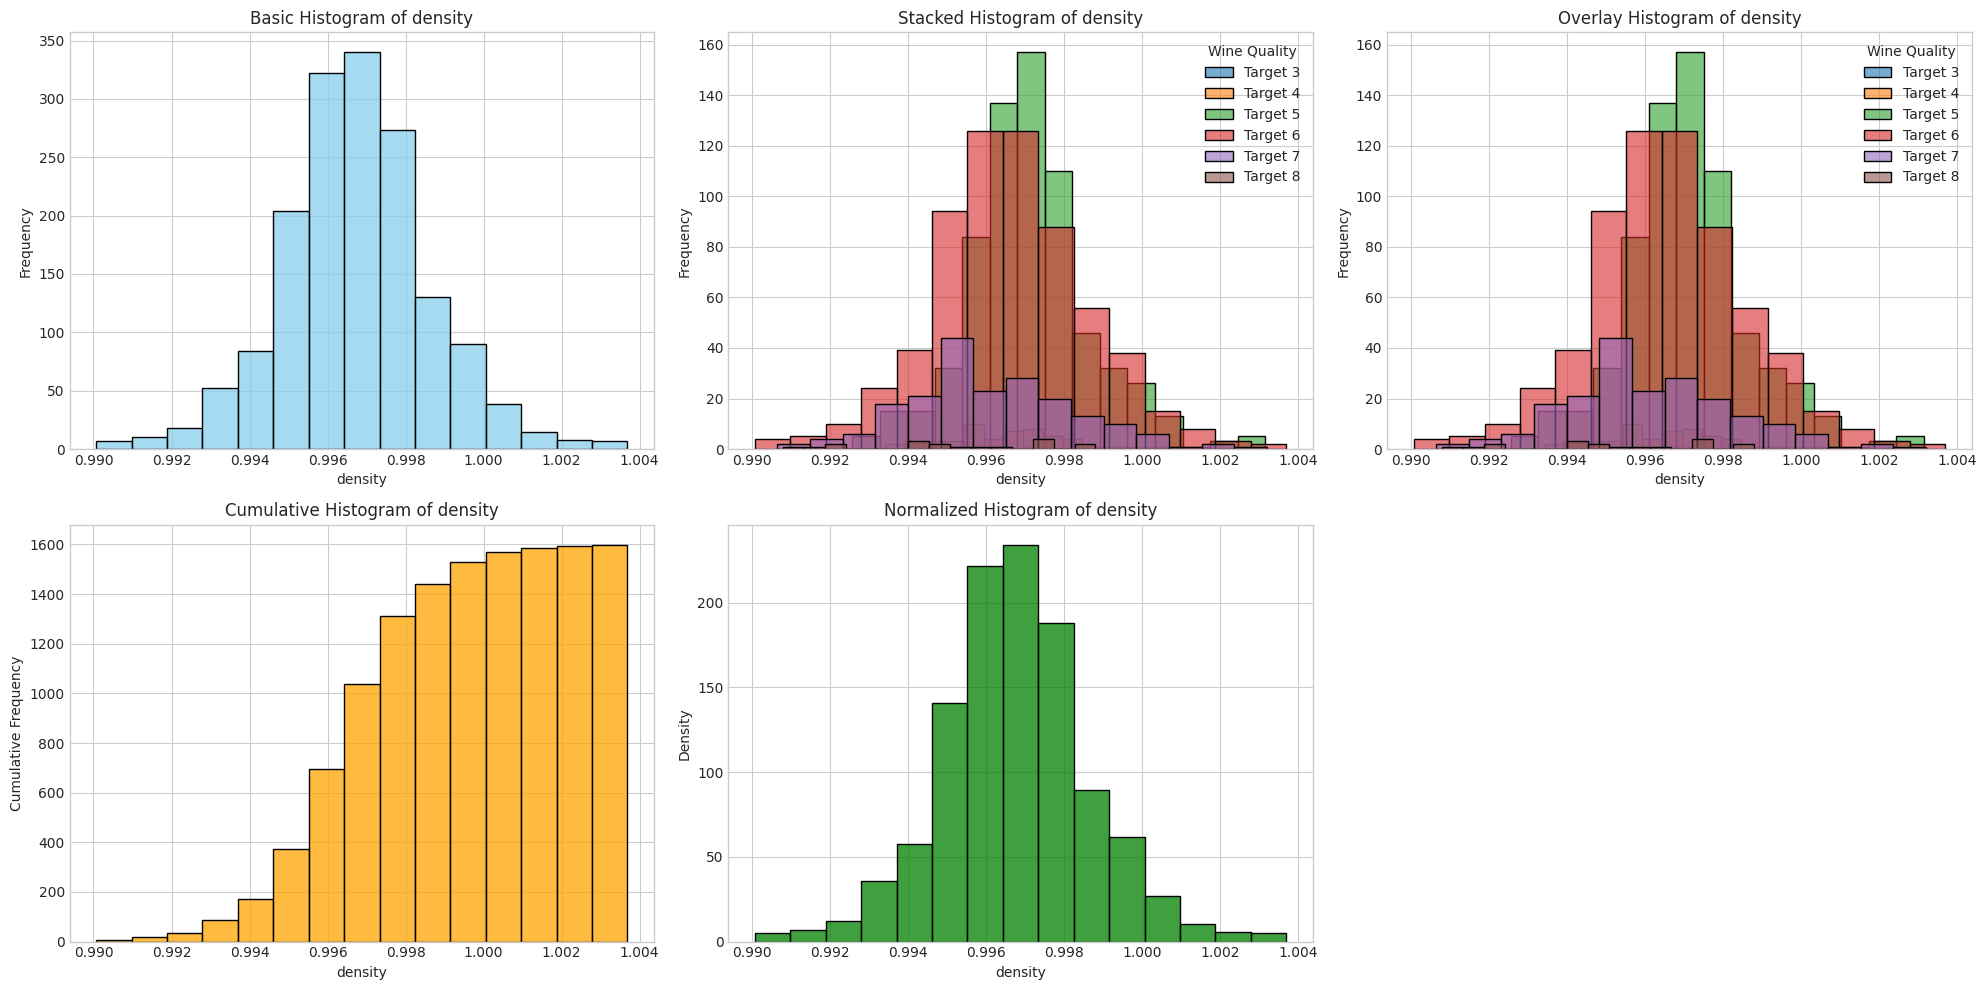

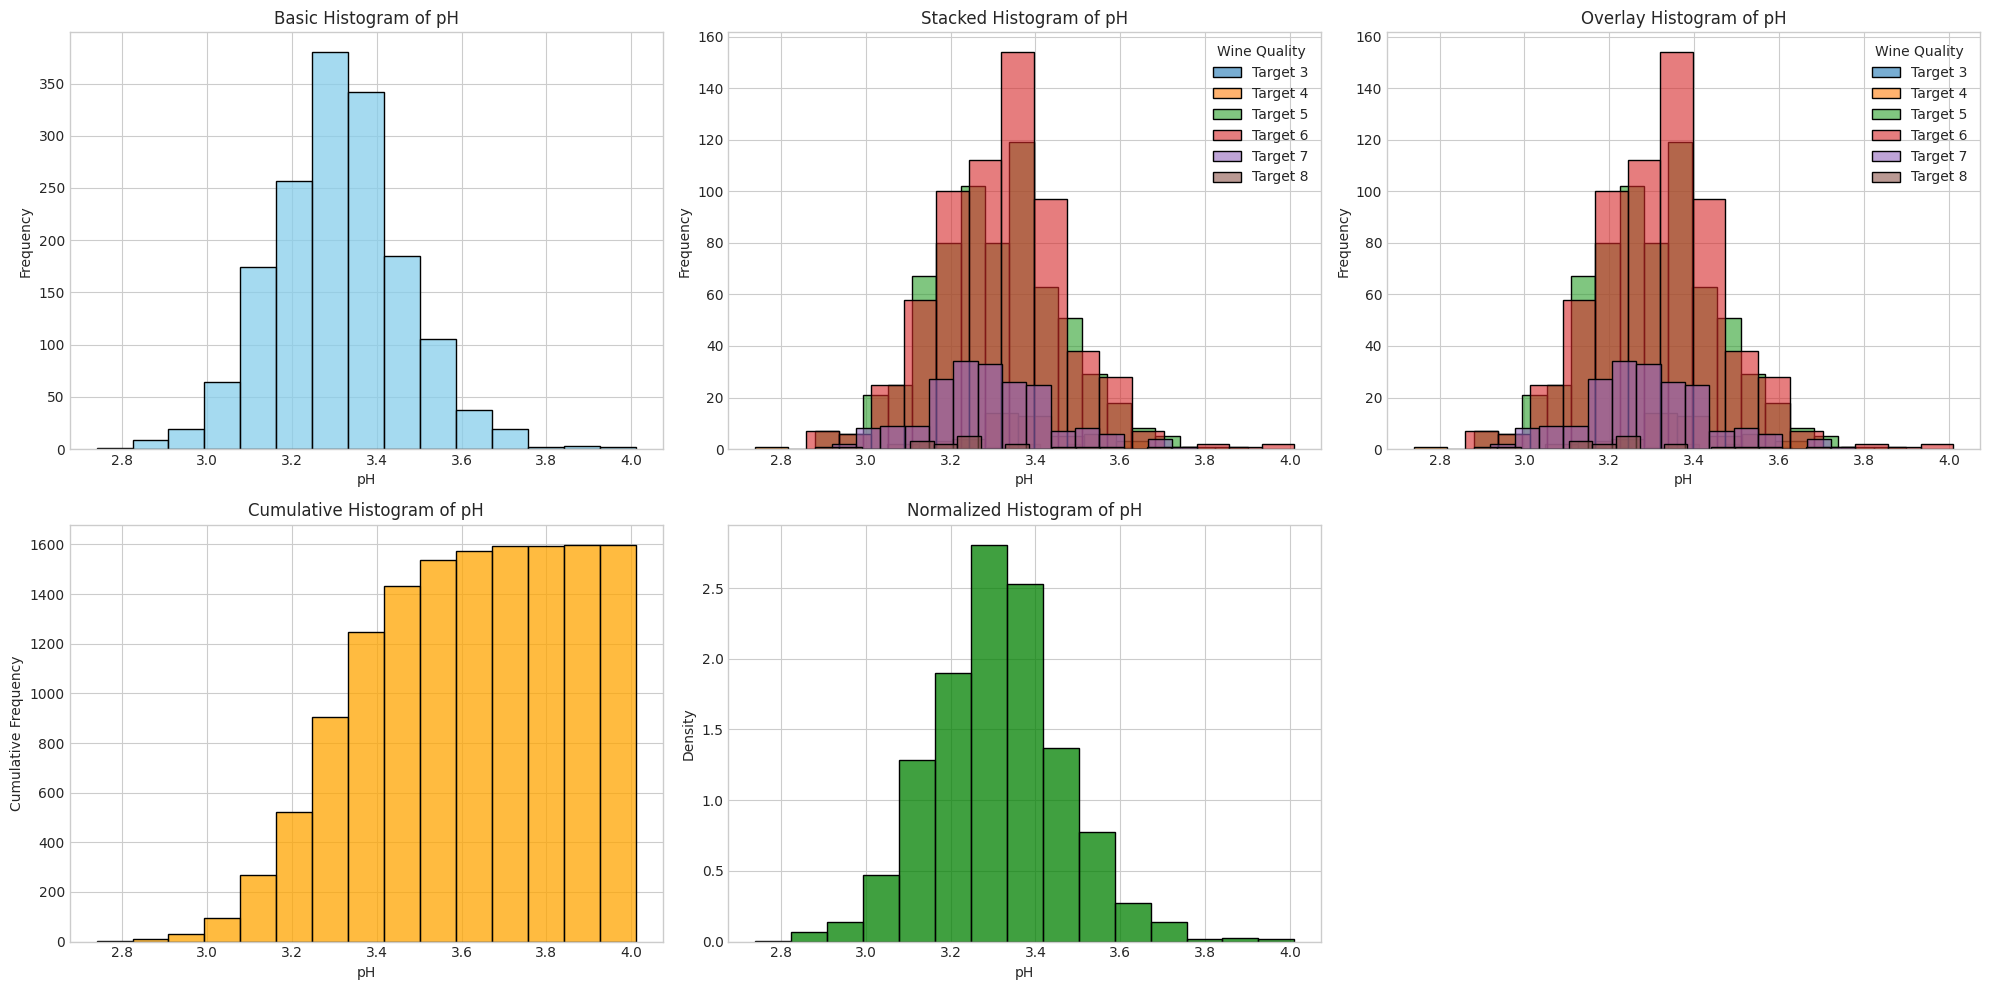

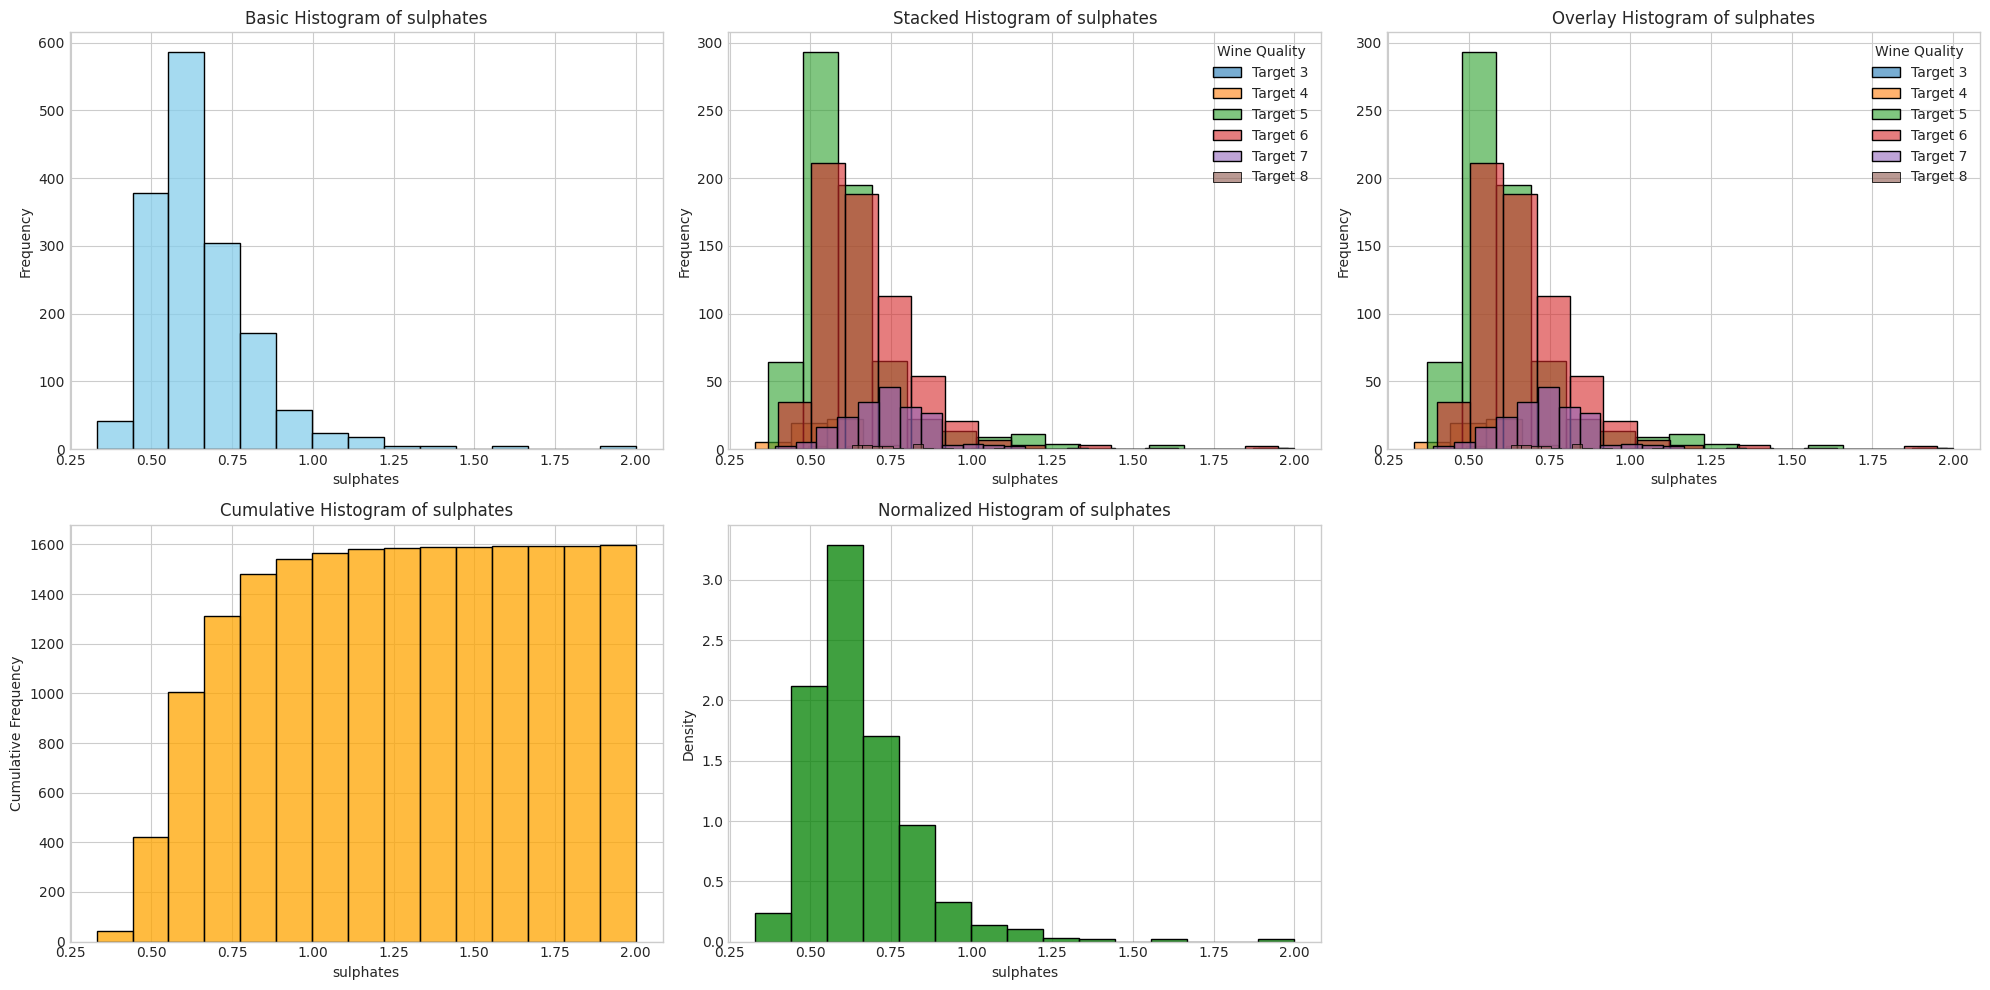

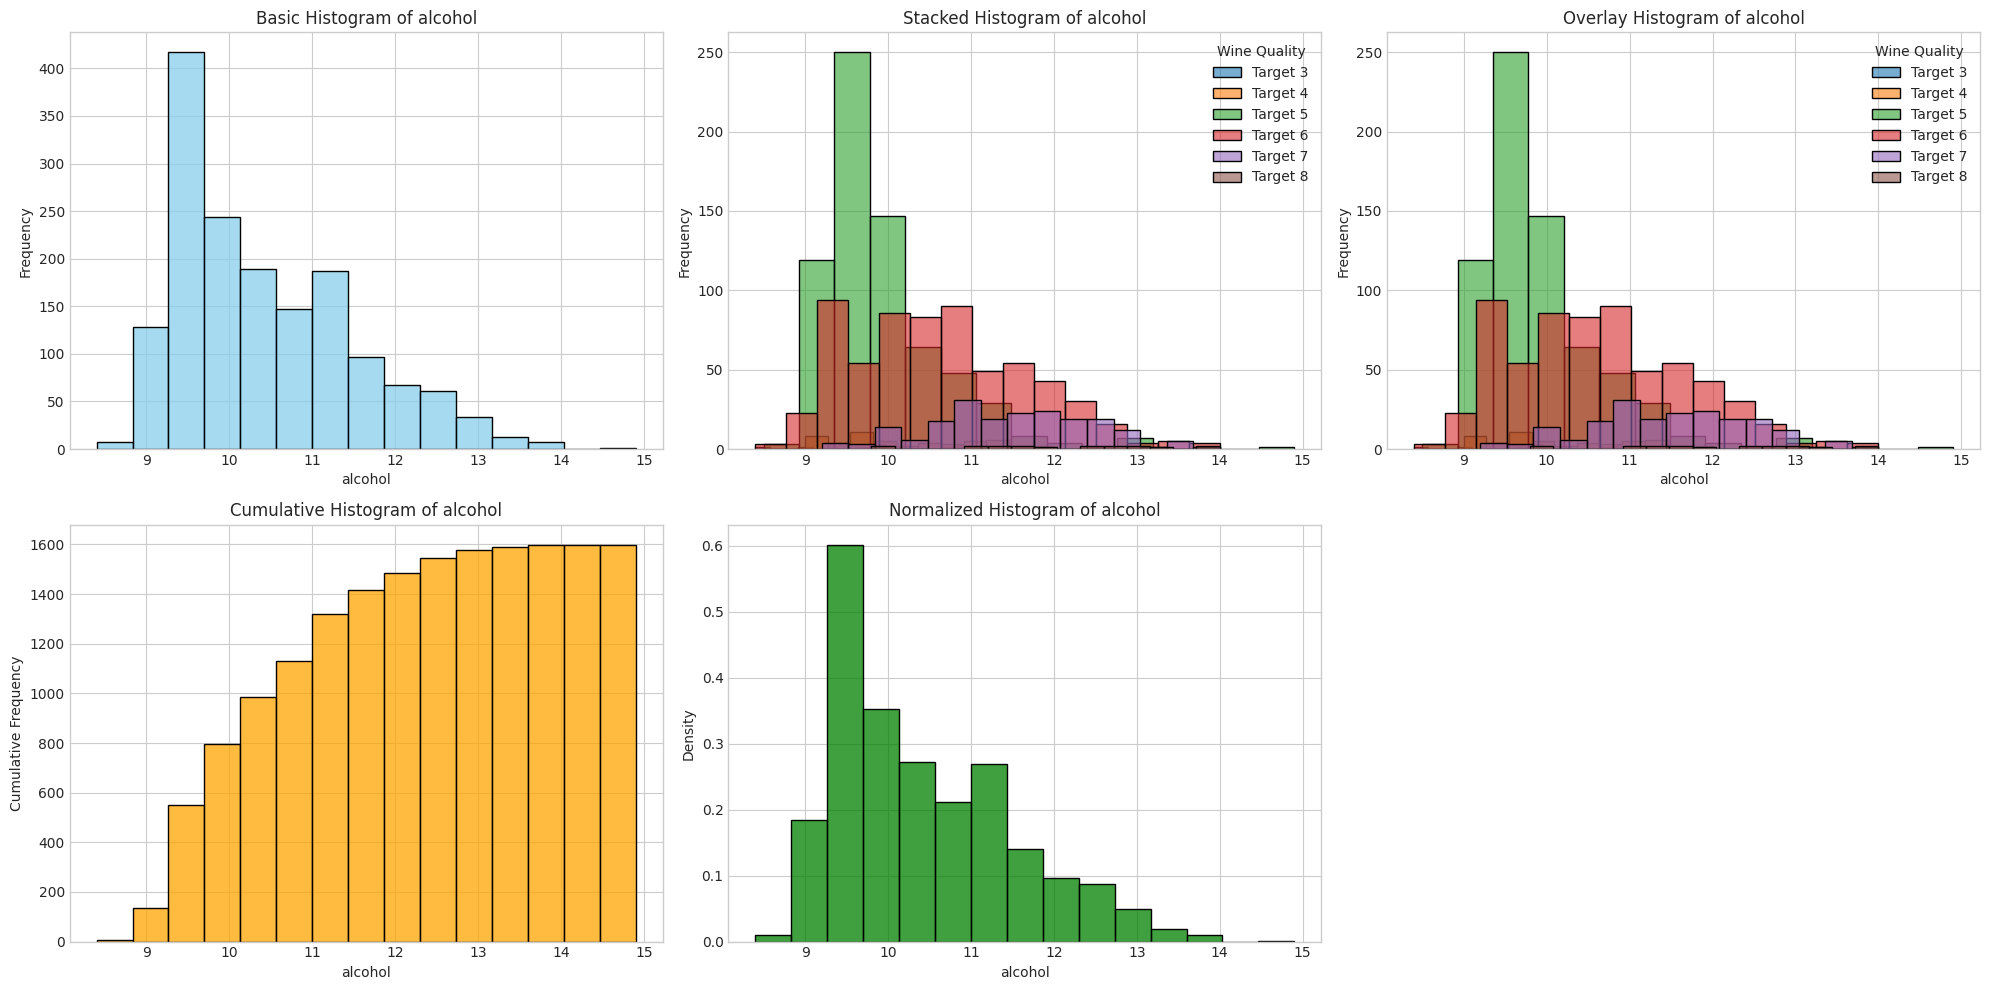

In [9]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plotting environment
plt.style.use('seaborn-v0_8-whitegrid')

# Loop through each column (excluding the target column)
for column in red_wine.columns[:-1]:  # Exclude 'target'
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    axes = axes.flatten()
    
    # Basic Histogram
    sns.histplot(red_wine[column], bins=15, color="skyblue", edgecolor="black", ax=axes[0])
    axes[0].set_title(f"Basic Histogram of {column}", fontsize=12)
    axes[0].set_xlabel(column, fontsize=10)
    axes[0].set_ylabel("Frequency", fontsize=10)
    
    # Stacked Histogram (Grouped by Target)
    for target_value, group in red_wine.groupby('target'):
        sns.histplot(group[column], bins=15, label=f"Target {target_value}", ax=axes[1], alpha=0.6)
    axes[1].set_title(f"Stacked Histogram of {column}", fontsize=12)
    axes[1].set_xlabel(column, fontsize=10)
    axes[1].set_ylabel("Frequency", fontsize=10)
    axes[1].legend(title="Wine Quality")
    
    # Overlay Histogram (Grouped by Target)
    for target_value, group in red_wine.groupby('target'):
        sns.histplot(group[column], bins=15, label=f"Target {target_value}", ax=axes[2], alpha=0.6, kde=False)
    axes[2].set_title(f"Overlay Histogram of {column}", fontsize=12)
    axes[2].set_xlabel(column, fontsize=10)
    axes[2].set_ylabel("Frequency", fontsize=10)
    axes[2].legend(title="Wine Quality")
    
    # Cumulative Histogram
    sns.histplot(red_wine[column], bins=15, cumulative=True, color="orange", edgecolor="black", ax=axes[3])
    axes[3].set_title(f"Cumulative Histogram of {column}", fontsize=12)
    axes[3].set_xlabel(column, fontsize=10)
    axes[3].set_ylabel("Cumulative Frequency", fontsize=10)
    
    # Normalized Histogram
    sns.histplot(red_wine[column], bins=15, stat="density", color="green", edgecolor="black", ax=axes[4])
    axes[4].set_title(f"Normalized Histogram of {column}", fontsize=12)
    axes[4].set_xlabel(column, fontsize=10)
    axes[4].set_ylabel("Density", fontsize=10)
    
    # Hide unused subplot
    axes[5].axis('off')
    
    plt.tight_layout()
    plt.show()

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


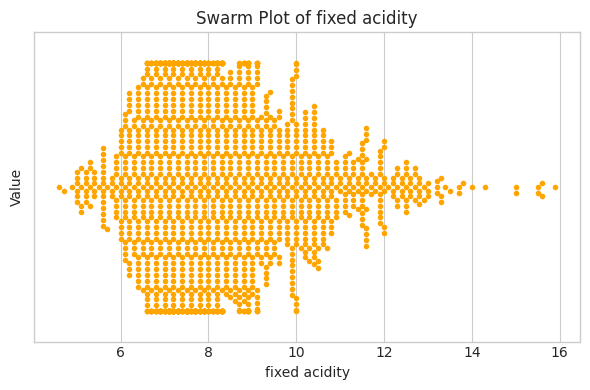

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


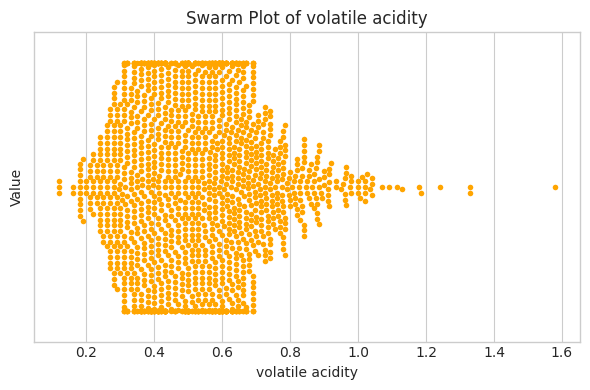

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


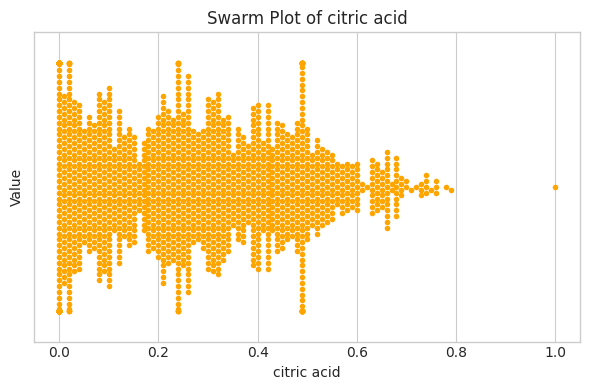

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


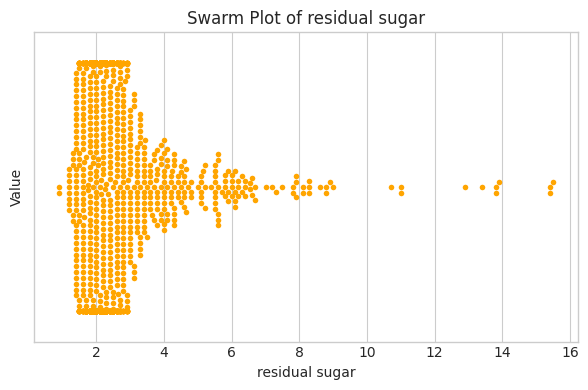

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 62.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


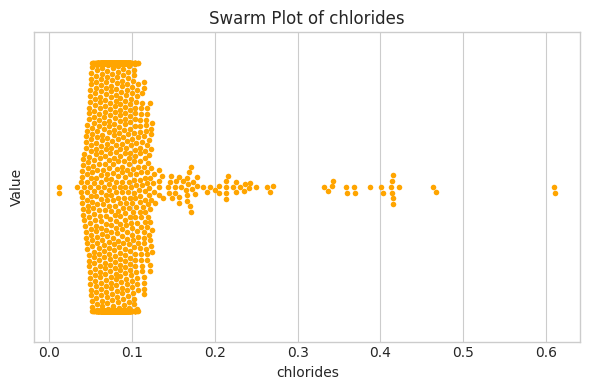

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 25.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


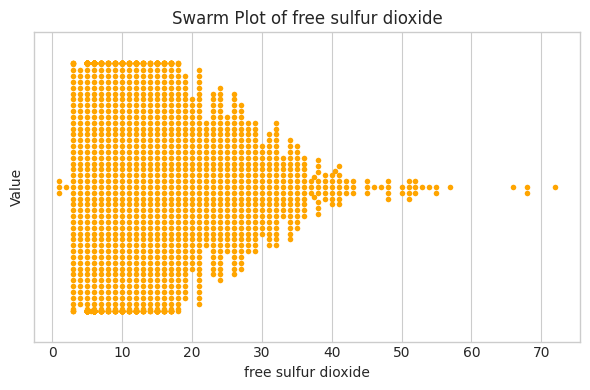

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 28.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


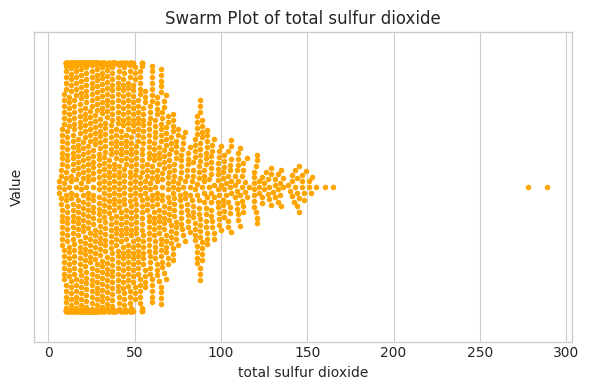

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


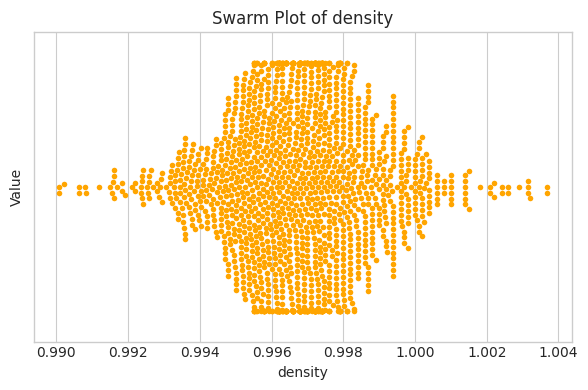

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


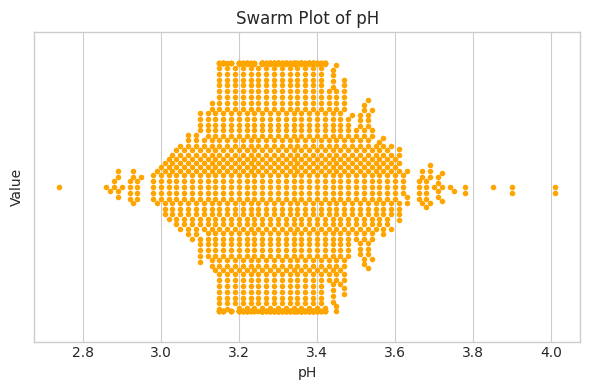

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


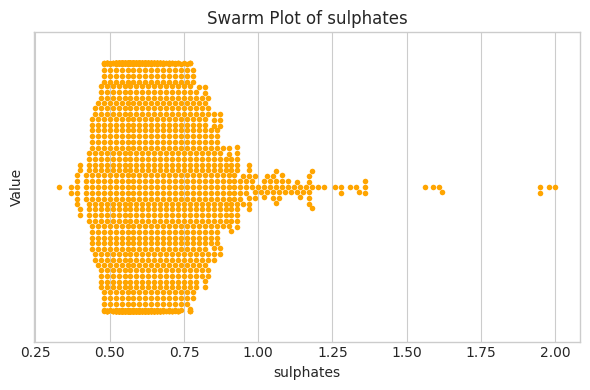

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 22.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


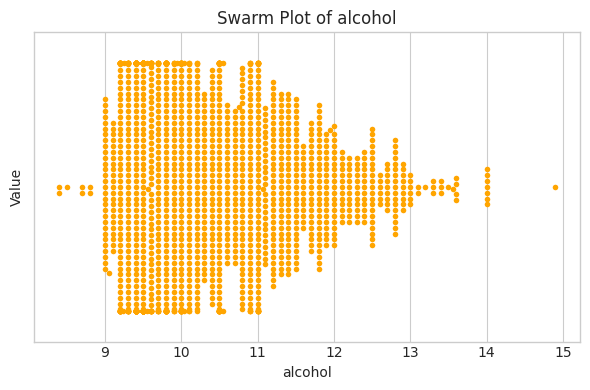

In [10]:
# Draw SwarmPlot for each Feature/ Column
import seaborn as sns

# Loop through each column (excluding the target column)
for i, column in enumerate(red_wine.columns[:-1]):  # Exclude 'target'
    plt.figure(figsize=(6, 4))
    sns.swarmplot(x=red_wine[column], color="orange", size=4)
    plt.title(f"Swarm Plot of {column}", fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel("Value", fontsize=10)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_136849/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


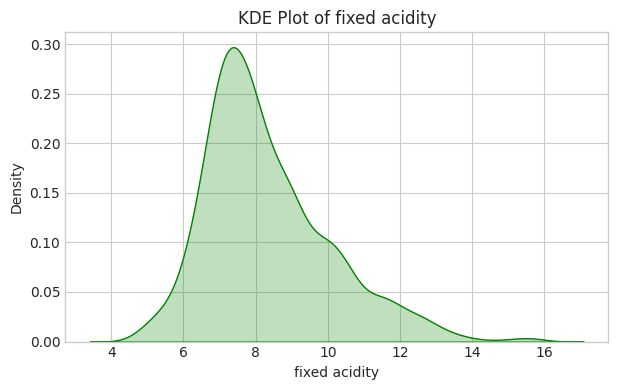

/tmp/ipykernel_136849/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


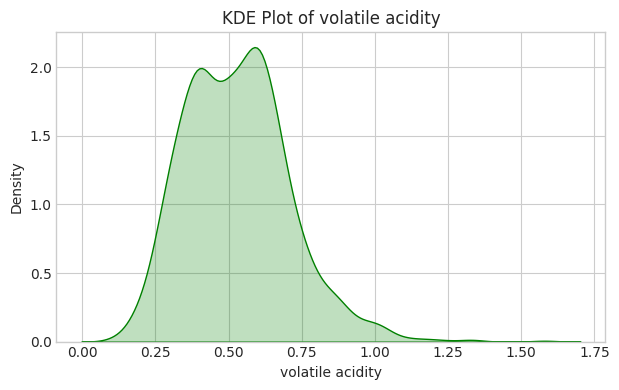

/tmp/ipykernel_136849/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


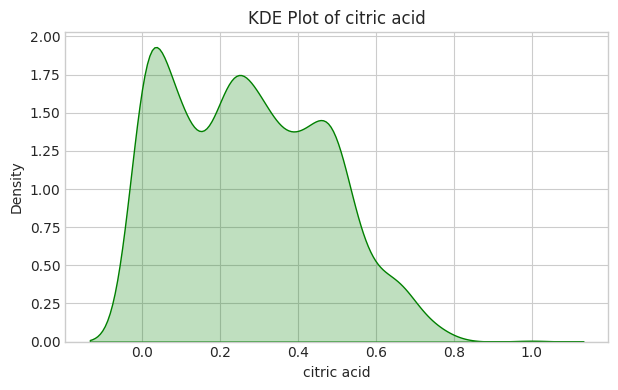

/tmp/ipykernel_136849/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


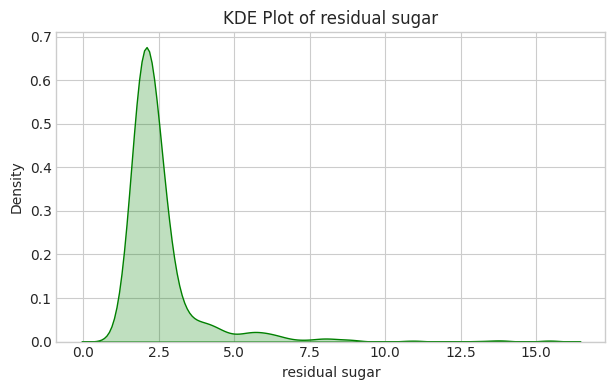

/tmp/ipykernel_136849/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


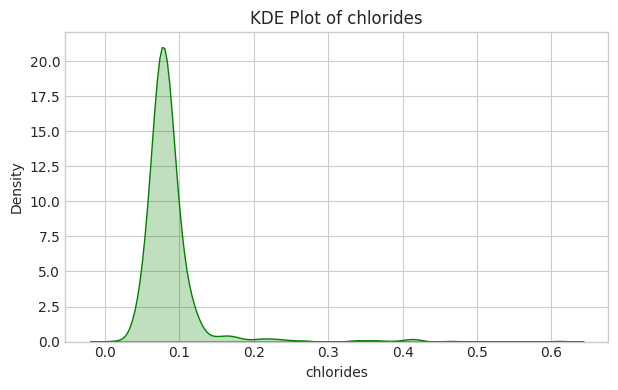

/tmp/ipykernel_136849/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


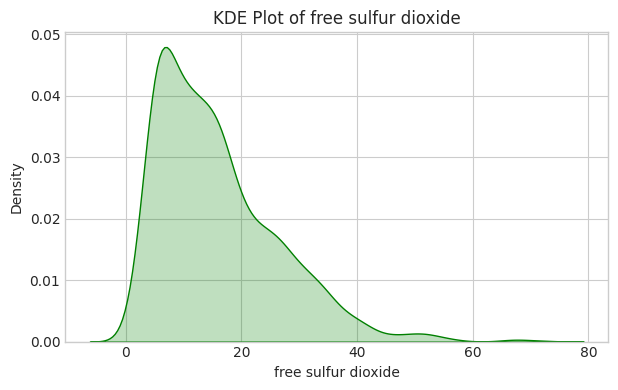

/tmp/ipykernel_136849/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


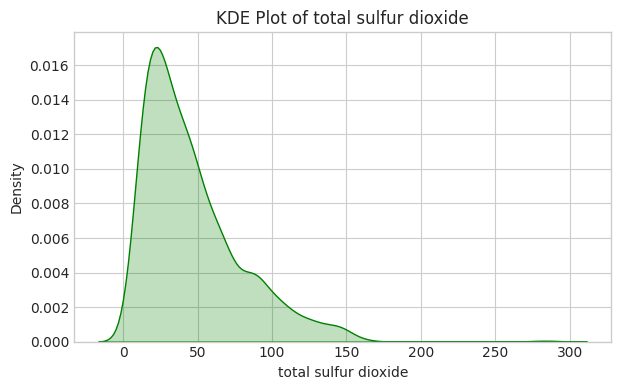

/tmp/ipykernel_136849/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


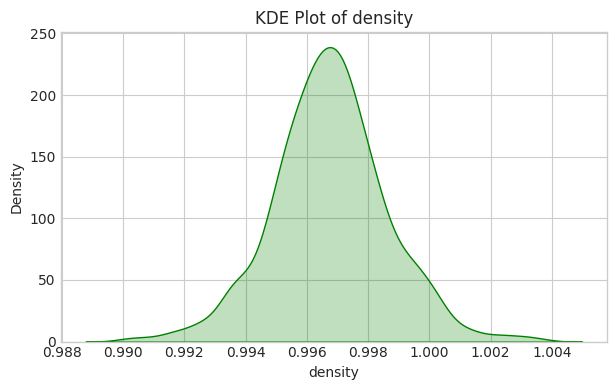

/tmp/ipykernel_136849/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


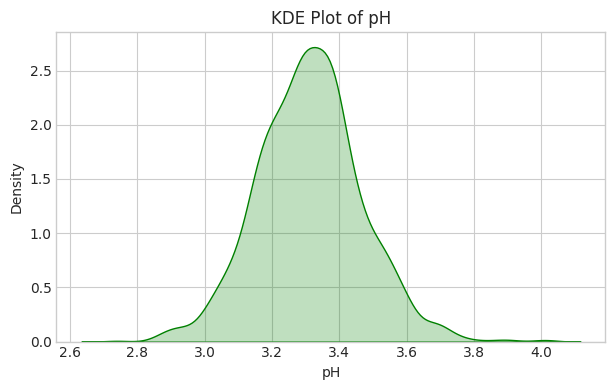

/tmp/ipykernel_136849/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


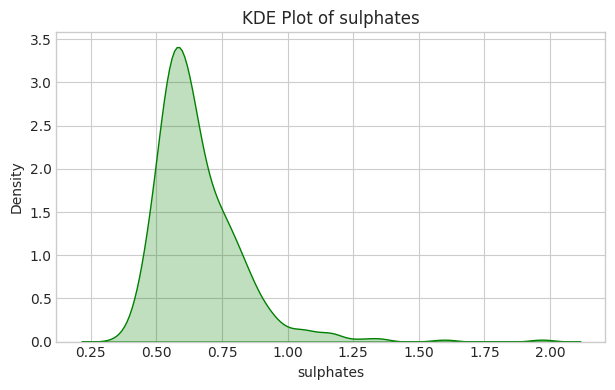

/tmp/ipykernel_136849/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


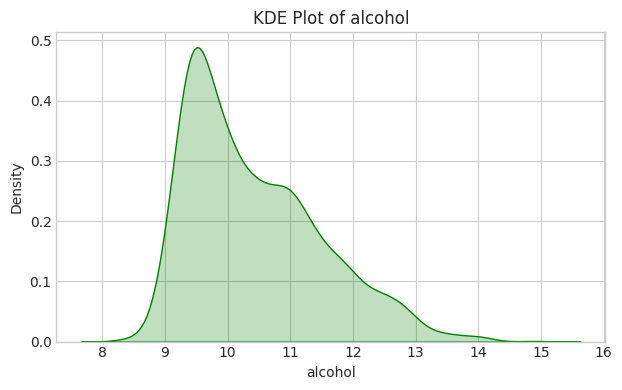

In [11]:
# Draw KDE Plot for each Feature/ Column
import seaborn as sns

# Loop through each column (excluding the target column)
for i, column in enumerate(red_wine.columns[:-1]):  # Exclude 'target'
    plt.figure(figsize=(18, 4))

    # KDE Plot
    plt.subplot(1, 3, 2)
    sns.kdeplot(red_wine[column], color="green", shade=True)
    plt.title(f"KDE Plot of {column}", fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel("Density", fontsize=10)

    plt.tight_layout()
    plt.show()



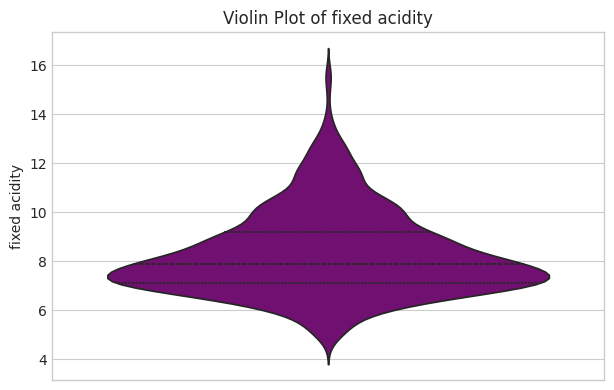

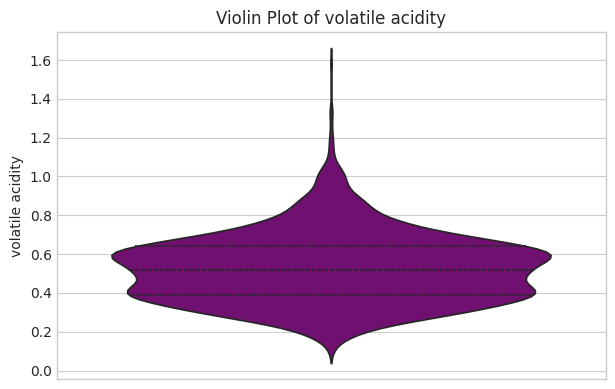

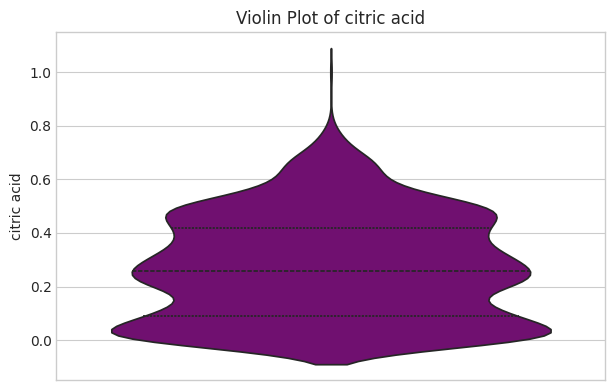

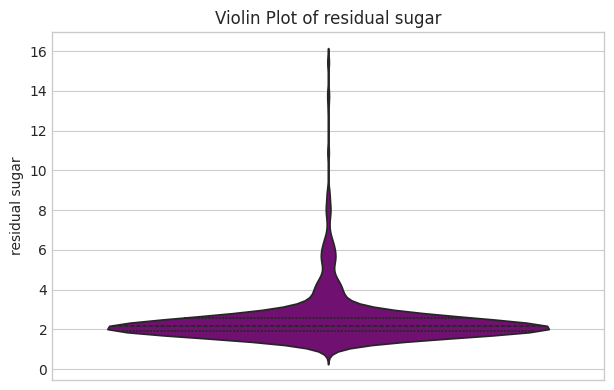

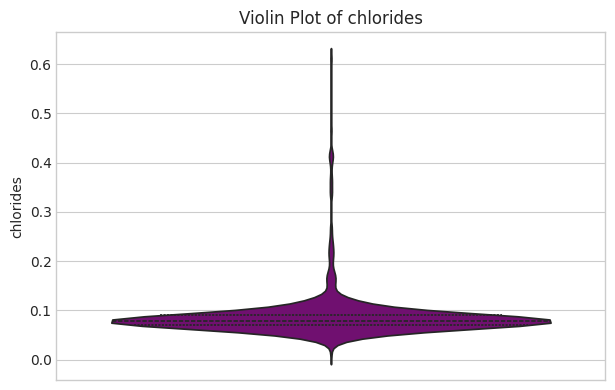

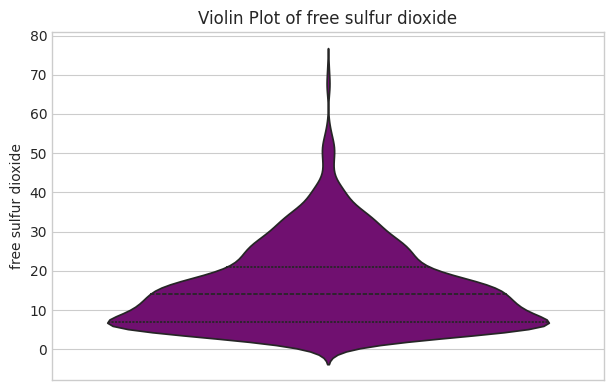

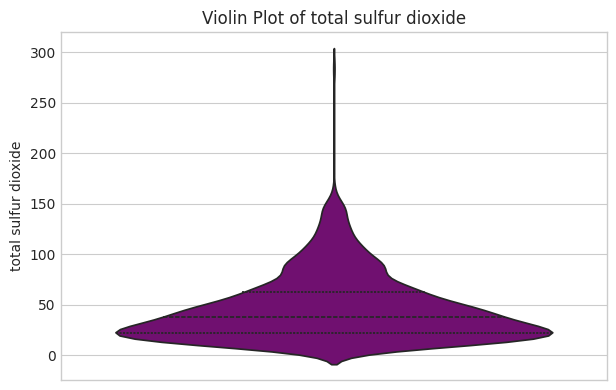

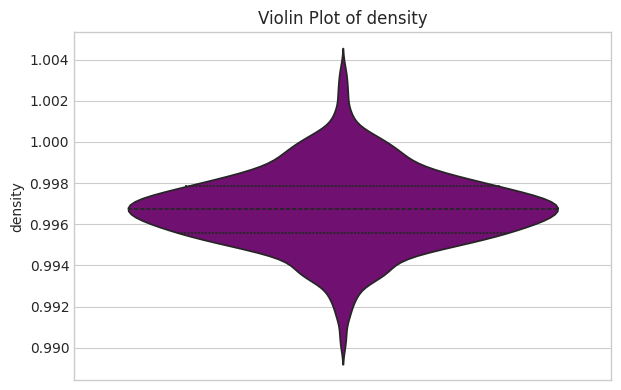

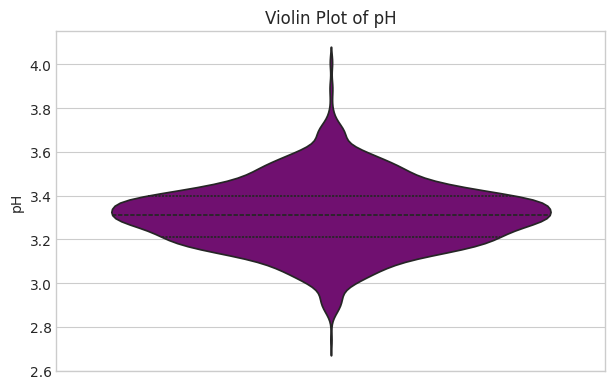

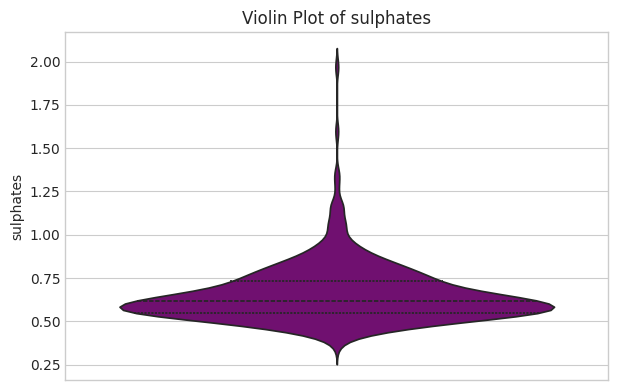

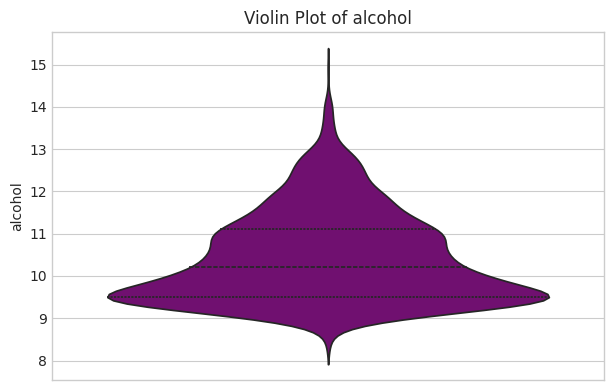

In [12]:
# Draw Violin Plot for each Feature/ Column 

# Loop through each column (excluding the target column)
for i, column in enumerate(red_wine.columns[:-1]):  # Exclude 'target'
    plt.figure(figsize=(18, 4))
    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(y=red_wine[column], color="purple", inner="quartile")
    plt.title(f"Violin Plot of {column}", fontsize=12)
    plt.ylabel(column, fontsize=10)
    
    plt.tight_layout()
    plt.show()



/tmp/ipykernel_136849/4076568047.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True, ax=axes[4 * i + 2])
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_136849/4076568047.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True, ax=axes[4 * i + 2])
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

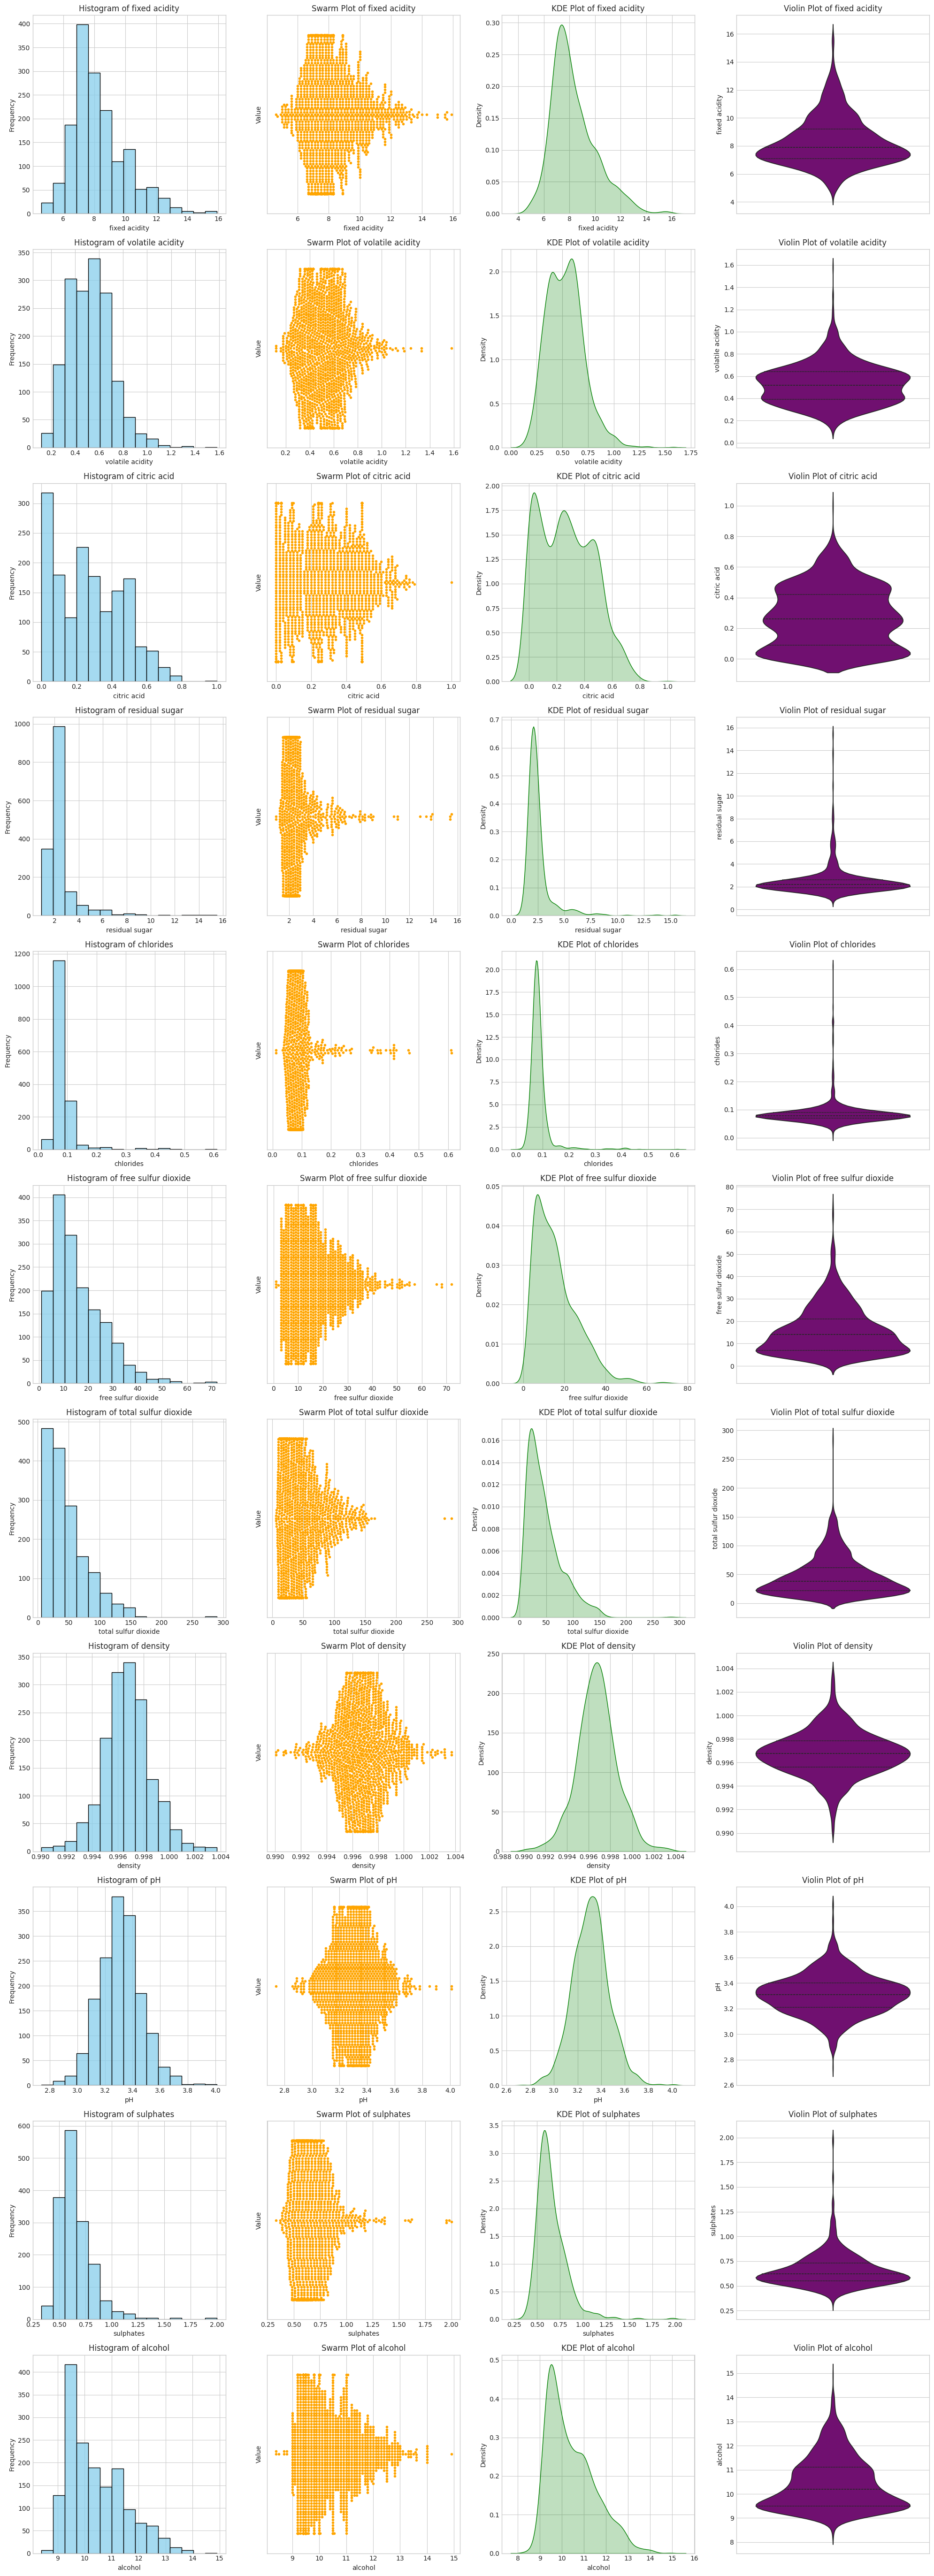

In [13]:
# The followong code would devlop the 4 graphs (Histogram, Swarm Plot, KDE Plot & Violin Plot) in row for each Feature/ Column in a grid.
# This grid view could help to analyze the data distribution of each Feature/ Column

# Set up the plotting environment
plt.style.use('seaborn-v0_8-whitegrid')

# Create a grid for all features (12 features × 4 plots per feature = 48 subplots)
num_features = len(red_wine.columns[:-1])  # Exclude 'target'
fig, axes = plt.subplots(num_features, 4, figsize=(20, 5 * num_features))  # 12 rows, 4 columns
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through each column (excluding the target column)
for i, column in enumerate(red_wine.columns[:-1]):  # Exclude 'target'
    # Histogram
    sns.histplot(red_wine[column], bins=15, color="skyblue", edgecolor="black", ax=axes[4 * i])
    axes[4 * i].set_title(f"Histogram of {column}", fontsize=12)
    axes[4 * i].set_xlabel(column, fontsize=10)
    axes[4 * i].set_ylabel("Frequency", fontsize=10)  
    
    # Swarm Plot
    sns.swarmplot(x=red_wine[column], color="orange", size=4, ax=axes[4 * i + 1])
    axes[4 * i + 1].set_title(f"Swarm Plot of {column}", fontsize=12)
    axes[4 * i + 1].set_xlabel(column, fontsize=10)
    axes[4 * i + 1].set_ylabel("Value", fontsize=10)
    
    # KDE Plot
    sns.kdeplot(red_wine[column], color="green", shade=True, ax=axes[4 * i + 2])
    axes[4 * i + 2].set_title(f"KDE Plot of {column}", fontsize=12)
    axes[4 * i + 2].set_xlabel(column, fontsize=10)
    axes[4 * i + 2].set_ylabel("Density", fontsize=10)
    
    # Violin Plot
    sns.violinplot(y=red_wine[column], color="purple", inner="quartile", ax=axes[4 * i + 3])
    axes[4 * i + 3].set_title(f"Violin Plot of {column}", fontsize=12)
    axes[4 * i + 3].set_ylabel(column, fontsize=10)

# Hide any unused subplots
for j in range(len(red_wine.columns[:-1]) * 4, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**My Analysis**

Histogram Analysis

Purpose : Shows the frequency distribution of values in each feature.

Insights :
1. Shape of Distribution : Identifies whether the data is normally distributed, skewed, or multimodal.
Example: If the histogram for "fixed acidity" shows a left-skewed distribution, it indicates most wines have higher fixed acidity values.

2. Outliers : Extreme bins with very low frequencies may indicate outliers.
Example: A bin with very few occurrences at high "residual sugar" values might suggest rare cases of sweet wines.

3. Range of Values : Provides an overview of the minimum, maximum, and range of values.
Example: The range of "alcohol" content might show that most wines fall between 9% and 10.5%.

Swarm Plot Analysis

Purpose : Displays individual data points, providing insight into the spread and density of values.

Insights :
1. Spread of Data : Shows how tightly or loosely the data points are clustered.
Example: If "citric acid" has many overlapping points near zero, it suggests that many wines lack citric acid.

2. Outliers : Points far from the main cluster indicate potential outliers.
Example: A few points at very high "total sulfur dioxide" values might represent wines with unusually high preservatives.

3. Clustering : Groups of points may reveal natural clusters or subgroups within the data.
Example: Clusters in "volatile acidity" might correspond to different wine quality levels.

KDE Plot Analysis

Purpose : Smooths the data to estimate the probability density function (PDF).

Insights :
1. Density Peaks : Indicates where most of the data is concentrated.
Example: A sharp peak in the "pH" KDE plot around 3.3 suggests that most wines have a pH close to this value.

2. Tails : Long tails indicate the presence of extreme values.
Example: A long right tail in "chlorides" might suggest a few wines with unusually high salt content.

3. Multimodality : Multiple peaks suggest the presence of distinct subgroups.
Example: Bimodal distributions in "alcohol" could indicate two types of wines (e.g., light vs. full-bodied).

Violin Plot Analysis

Purpose : Combines a boxplot-like structure with a kernel density estimate, showing both summary statistics and the full range of the data.

Insights :
1. Quartiles and Median : Inner quartile markers provide information about the central tendency and spread.
Example: The median line in "density" might show that most wines have a density slightly below 1.0.

2. Density Estimates : The width of the violin indicates the density of values at different ranges.
Example: A wide section in "sulphates" near 0.6 suggests that many wines have sulphate levels in this range.

3. Outliers : Thin tails extending beyond the main body highlight extreme values.
Example: Thin tails in "free sulfur dioxide" might indicate wines with unusually low or high preservative levels.

**General Conclusions**

By analyzing all four types of plots together, we can draw comprehensive conclusions about the dataset:

1. Central Tendency and Spread

1.1 Features like "fixed acidity", "volatile acidity", and "pH" often have well-defined central tendencies (e.g., modes or medians) but may vary in spread.

1.2 Features like "residual sugar" and "alcohol" might exhibit wider spreads, indicating greater variability in these attributes across wines.

2. Outliers

2.1 Features such as "total sulfur dioxide", "chlorides", and "sulphates" may contain outliers, which could represent unusual wines or measurement errors.

2.2 Outliers can also be identified by comparing swarm plots and violin plots.

3. Skewness

3.1 Many features (e.g., "citric acid", "residual sugar") might show skewness, indicating that certain values are more common than others.
For example, "citric acid" might have a spike at zero due to many wines lacking this component.

4. Multimodality

4.1 Some features (e.g., "alcohol", "density") might exhibit multimodal distributions, suggesting the presence of distinct subgroups within the data.

4.2 This could reflect differences in wine styles or production methods.

5. Correlation with Quality

5.1 By comparing these plots with the "target" column (wine quality), we can identify features that correlate with higher or lower quality.
Example: Wines with higher "alcohol" content or balanced "pH" levels might tend to have higher quality ratings.


Here are some specific observations based on the provided dataset:

**Fixed Acidity :**
1. Histogram: Left-skewed, indicating most wines have higher acidity.
2. Swarm Plot: Dense clustering near 7–8, with a few outliers above 11.
3. KDE Plot: Single peak around 7.5, with a long tail toward higher values.
4. Violin Plot: Wide body near the median, thin tails at extremes.

**Residual Sugar :**
1. Histogram: Right-skewed, with most wines having low sugar content.
2. Swarm Plot: Majority of points near 1–2, with a few outliers above 6.
3. KDE Plot: Sharp peak near 2, long tail toward higher values.
4. Violin Plot: Narrow body near the median, wide tails for outliers.

**Alcohol :**
1. Histogram: Bimodal, suggesting two groups of wines (light vs. full-bodied).
2. Swarm Plot: Clear separation between 9–10 and 10–11.
3. KDE Plot: Two peaks around 9.5 and 10.5.
4. Violin Plot: Two distinct density regions, reflecting the bimodal nature.


**Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.**

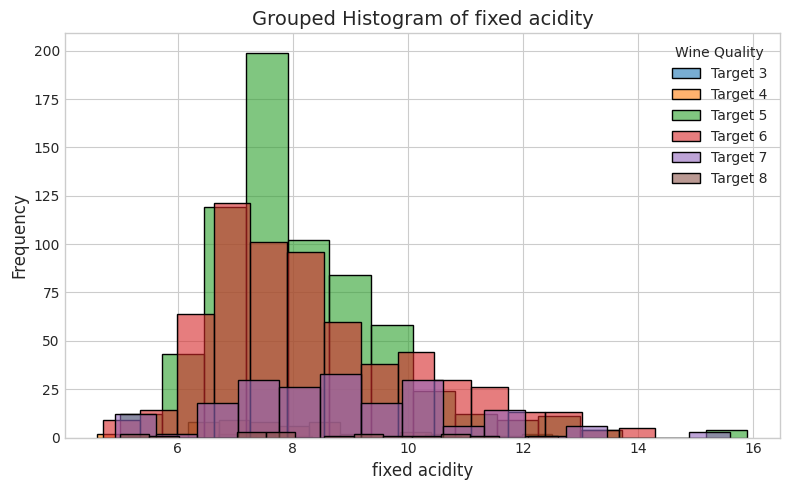

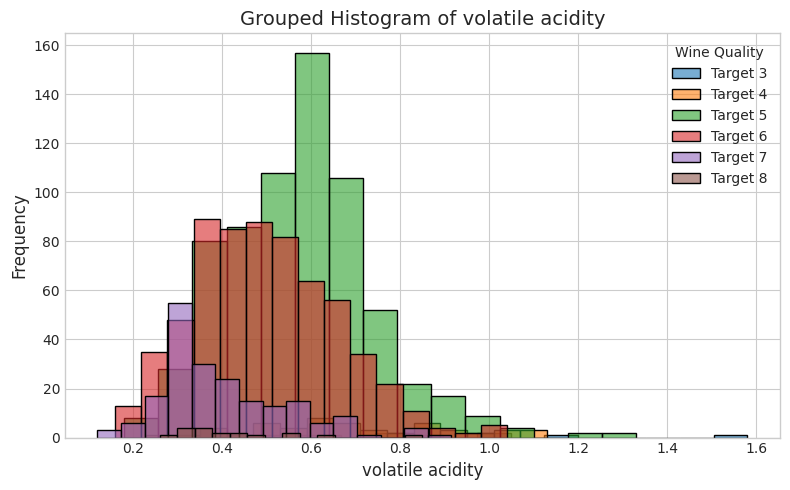

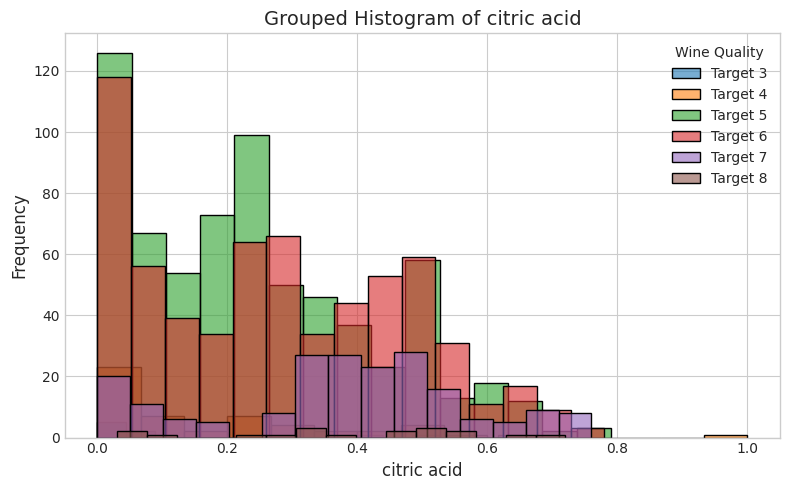

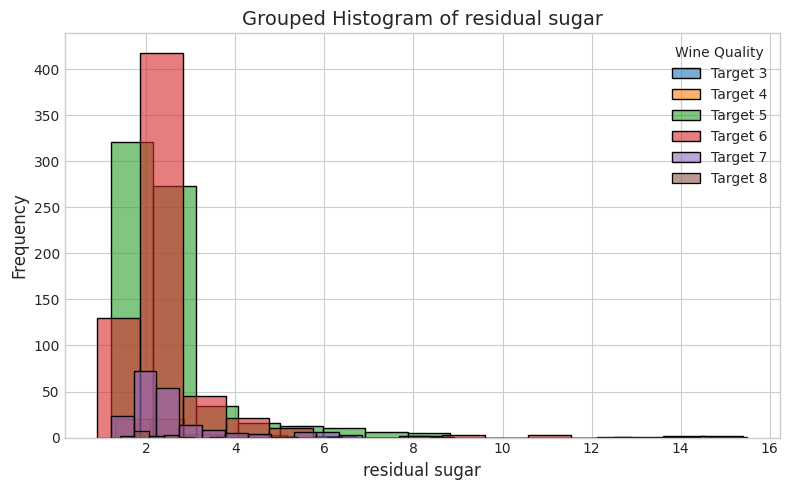

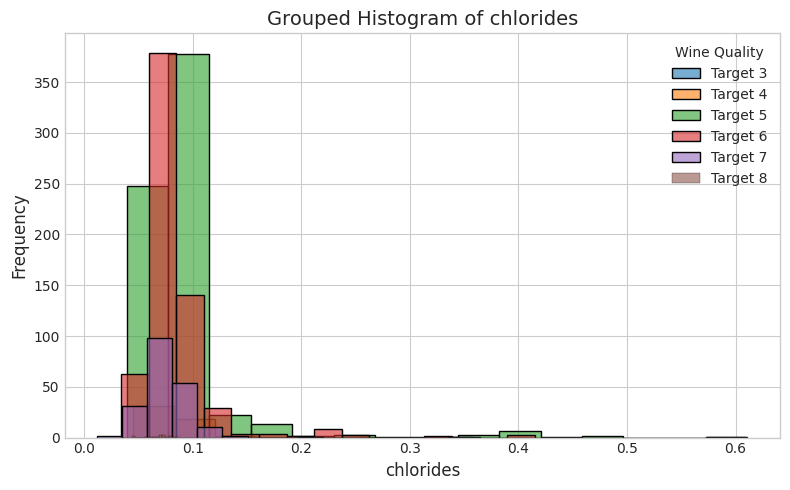

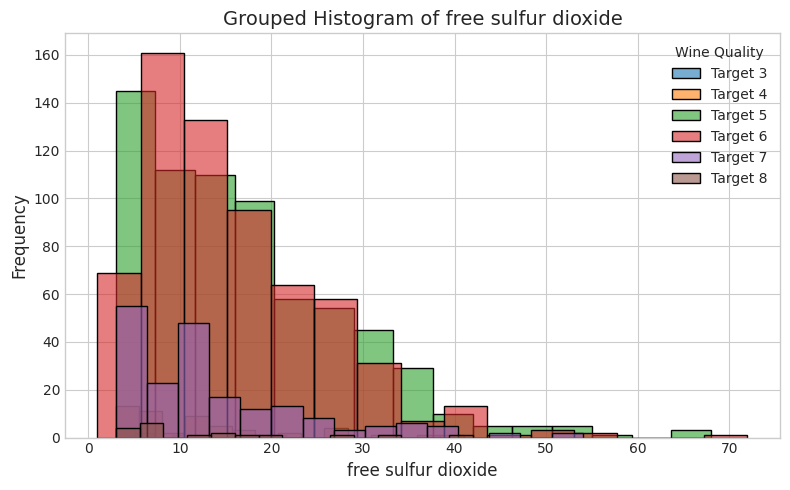

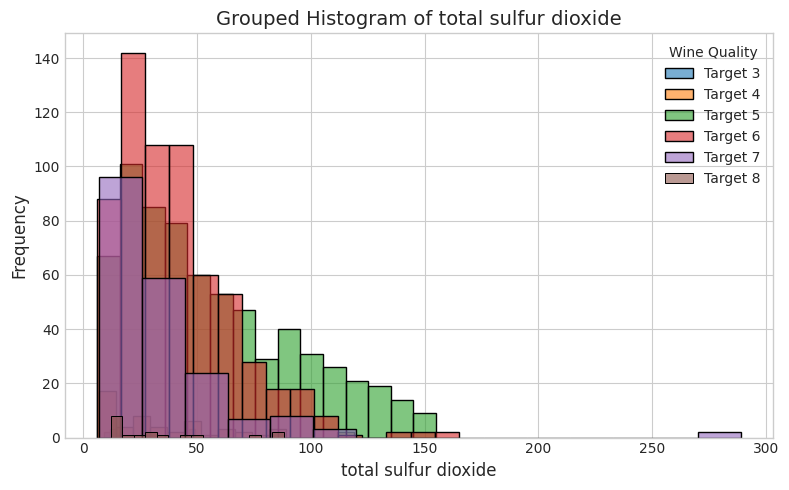

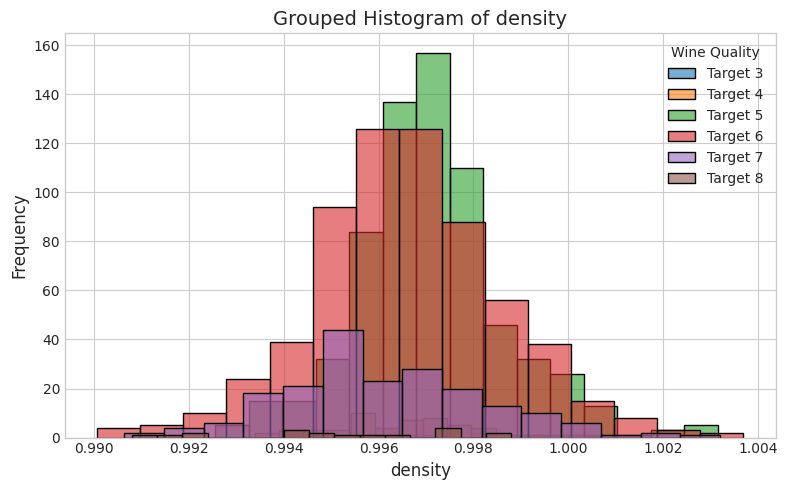

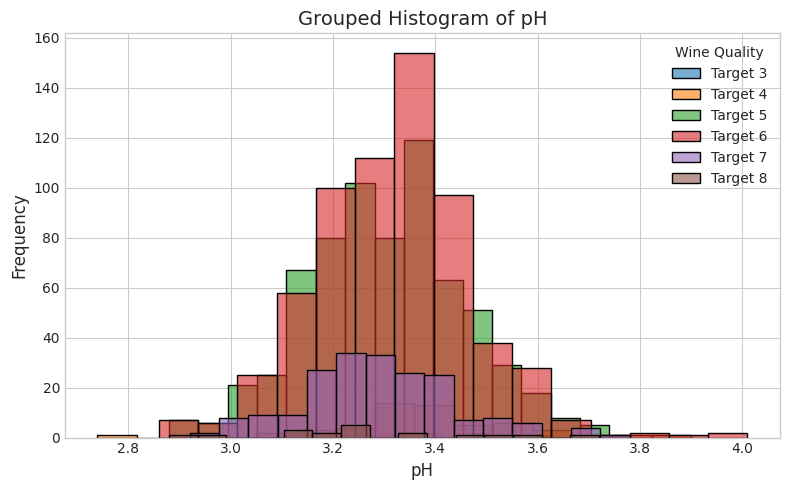

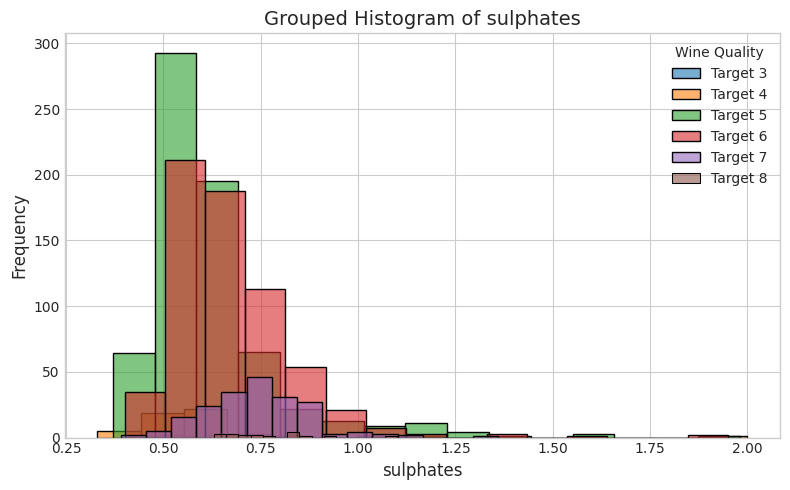

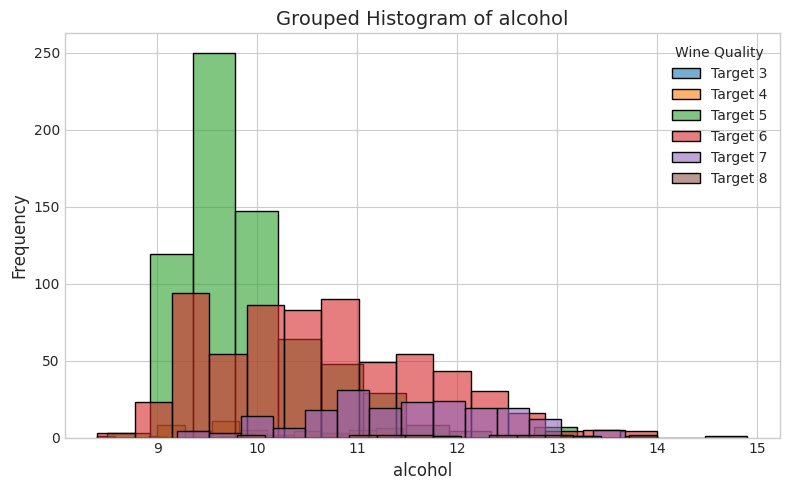

In [14]:
# Set up the plotting environment
plt.style.use('seaborn-v0_8-whitegrid')

# Loop through each column (excluding the target column)
for column in red_wine.columns[:-1]:  # Exclude 'target'
    plt.figure(figsize=(8, 5))
    
    # Group the data by the 'target' column
    for target_value, group in red_wine.groupby('target'):
        sns.histplot(group[column], bins=15, label=f"Target {target_value}", kde=False, alpha=0.6)
    
    # Add title and labels
    plt.title(f"Grouped Histogram of {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend(title="Wine Quality")
    plt.tight_layout()
    plt.show()

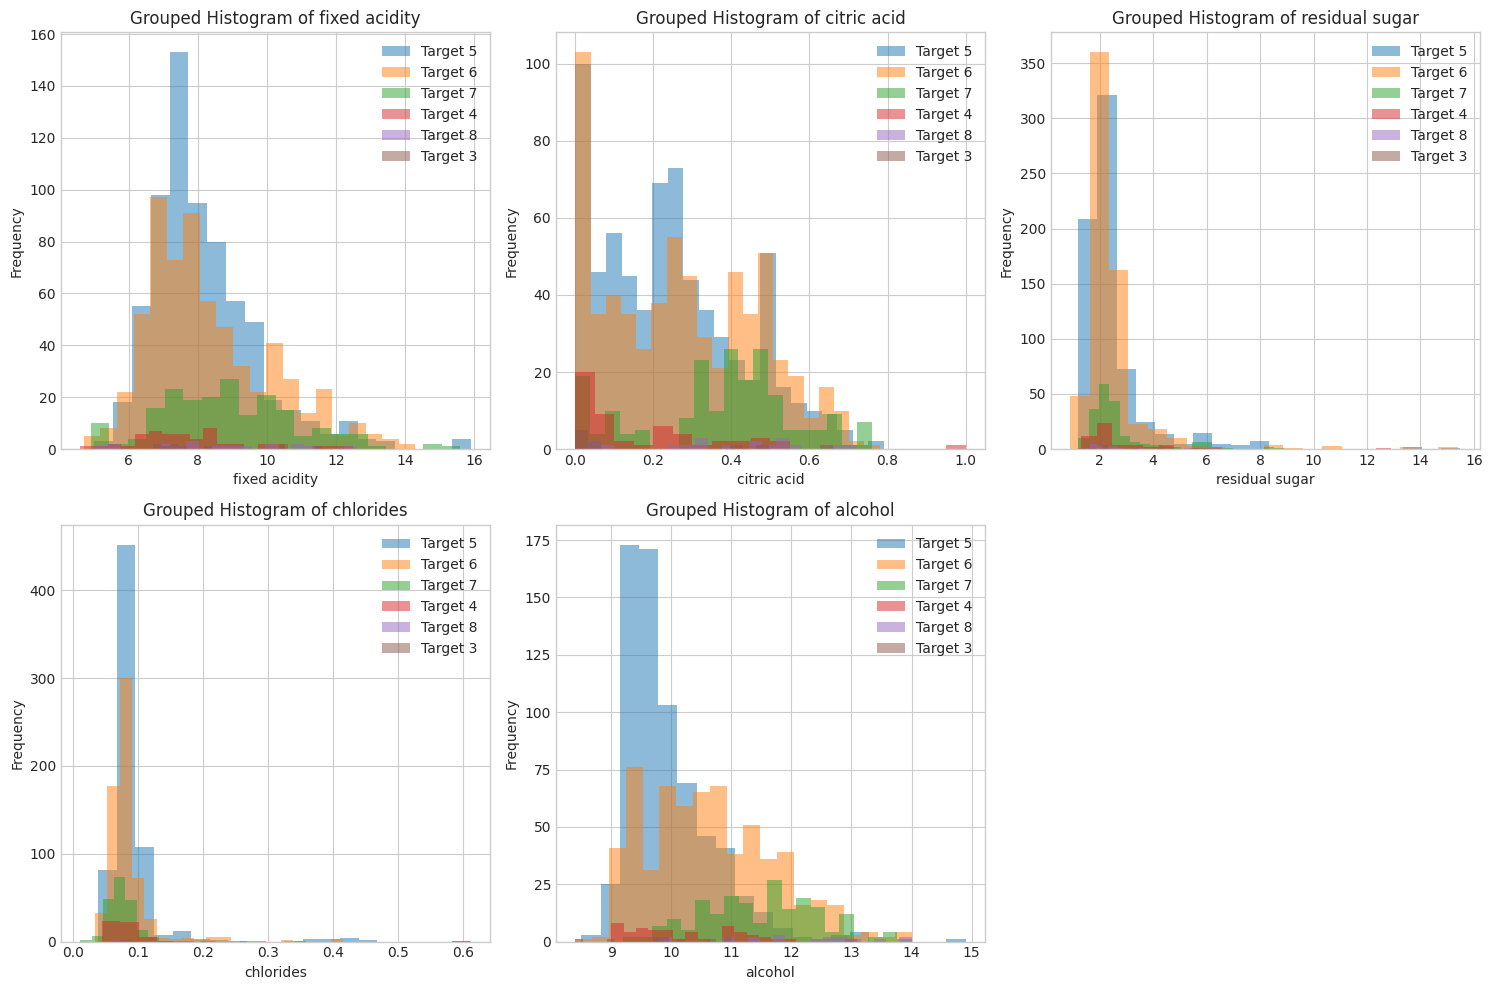

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a list of numeric columns you want to plot
numeric_columns = ['fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'alcohol']

# Create a figure for the histograms
plt.figure(figsize=(15, 10))

# Loop through each numeric column and plot histograms for each group of 'target'
for i, column in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)  # Creates a grid of 2 rows and 3 columns
    for target_value in red_wine['target'].unique():  # Group by the 'target' column
        subset = red_wine[red_wine['target'] == target_value]
        plt.hist(subset[column], bins=20, alpha=0.5, label=f'Target {target_value}')
    
    plt.title(f"Grouped Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


**Draw a bar plot to indicate total counts of each categorical variable in a given column.**

/tmp/ipykernel_136849/790845985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=red_wine, palette='viridis', edgecolor="black")


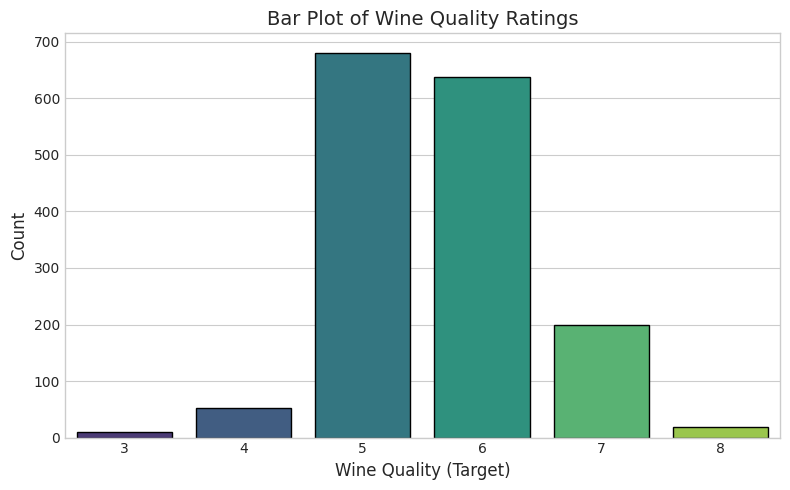

In [16]:
# Set up the plotting environment
plt.style.use('seaborn-v0_8-whitegrid')

# Bar Plot for Total Counts of Each Categorical Variable in 'target'
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=red_wine, palette='viridis', edgecolor="black")
plt.title("Bar Plot of Wine Quality Ratings", fontsize=14)
plt.xlabel("Wine Quality (Target)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)  # Ensure labels are horizontal
plt.tight_layout()
plt.show()

**The output is a bar plot where:**

1. The x-axis represents the unique values in the target column (wine quality ratings: 5, 6, 7).
2. The y-axis represents the count of occurrences for each rating.
For example:
The bar for target=5 be the tallest, indicating that most wines in the dataset have a quality rating of 5.
The bar for target=3 be shorter, indicating fewer wines with a quality rating of 3.

**Insights from the Bar Plot:**

1. Distribution of Wine Quality :
The bar plot reveals the distribution of wine quality ratings in the dataset.
For instance, if target=5 has the highest count, it suggests that most wines are rated as "average" quality.
2. Imbalanced Data :
If one category (e.g., target=5) dominates the plot, it indicates an imbalance in the dataset, which could affect machine learning model training.
3. Rare Categories :
Categories with very low counts (e.g., target=3, 8) might represent rare cases, requiring special attention during analysis.


**Find means, medians, and modes.**

In [17]:
# Calculate mean, median, and mode for each column
summary_stats = pd.DataFrame({
    "Mean": red_wine.mean(numeric_only=True),
    "Median": red_wine.median(numeric_only=True),
    "Mode": red_wine.mode().iloc[0]  # First mode if multiple modes exist
})

# Display the summary statistics
print(summary_stats)

                           Mean    Median     Mode
fixed acidity          8.319637   7.90000   7.2000
volatile acidity       0.527821   0.52000   0.6000
citric acid            0.270976   0.26000   0.0000
residual sugar         2.538806   2.20000   2.0000
chlorides              0.087467   0.07900   0.0800
free sulfur dioxide   15.874922  14.00000   6.0000
total sulfur dioxide  46.467792  38.00000  28.0000
density                0.996747   0.99675   0.9972
pH                     3.311113   3.31000   3.3000
sulphates              0.658149   0.62000   0.6000
alcohol               10.422983  10.20000   9.5000
target                 5.636023   6.00000   5.0000


### Conclusions
**- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!**

Yes, this red wine dataset likely to be usable.

**- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?**

Analysis of Distribution Shapes:
Based on the visualizations and statistical properties (mean, median, skewness), here are the shapes of the distributions for each feature:



| **Feature**              | **Distribution Type**    | **Description**                                                                 |
|--------------------------|---------------------------|---------------------------------------------------------------------------------|
| **Fixed Acidity**         | Slightly left-skewed      | Most wines have higher acidity, with a few outliers at lower values.            |
| **Volatile Acidity**      | Right-skewed              | A majority of wines have low volatile acidity, with some high outliers.         |
| **Citric Acid**           | Bimodal                   | Two peaks: one near zero (many wines lack citric acid) and another around 0.3.  |
| **Residual Sugar**        | Right-skewed              | Most wines have low residual sugar, with a long tail toward higher values.      |
| **Chlorides**             | Right-skewed              | Chloride levels are generally low, with a few wines having unusually high values.|
| **Free Sulfur Dioxide**   | Right-skewed              | Most wines have moderate free sulfur dioxide, with some very high outliers.     |
| **Total Sulfur Dioxide**  | Right-skewed              | Similar to free sulfur dioxide, but with a wider range of values.               |
| **Density**               | Normal-like               | Density values are tightly clustered around a central peak.                     |
| **pH**                    | Approximately normal      | pH values are symmetrically distributed around the mean.                        |
| **Sulphates**             | Right-skewed              | Sulphate levels are mostly low, with a few wines having very high values.       |
| **Alcohol**               | Slightly bimodal          | Two peaks suggest two groups of wines (e.g., light vs. full-bodied).            |

This table summarizes each feature's distribution type and provides a brief description of the data's behavior.


**- Are there any outliers present?  (Data points that are far from the others.)**

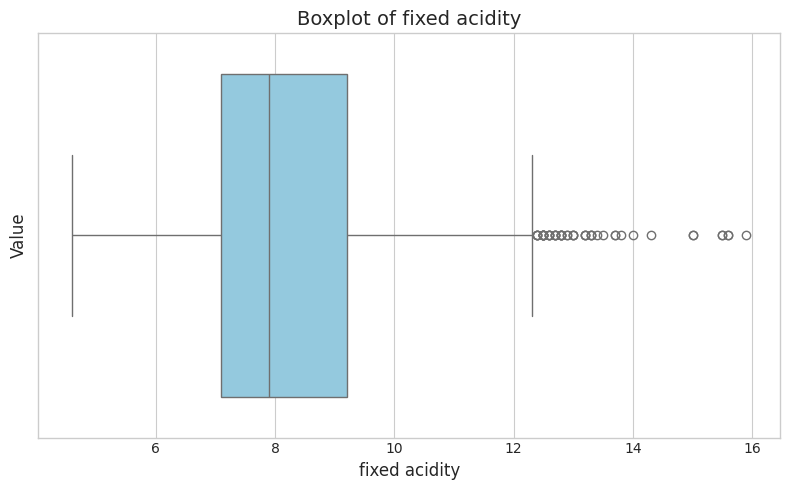

Outliers in fixed acidity:
205     12.8
206     12.8
243     15.0
244     15.0
264     12.5
294     13.3
328     13.4
338     12.4
339     12.5
347     13.8
353     13.5
359     12.6
363     12.5
364     12.8
366     12.8
374     14.0
381     13.7
391     13.7
394     12.7
409     12.5
429     12.8
440     12.6
442     15.6
446     12.5
470     13.0
472     12.5
509     13.3
510     12.4
516     12.5
538     12.9
544     14.3
548     12.4
554     15.5
555     15.5
557     15.6
559     13.0
560     12.7
564     13.0
565     12.7
596     12.4
599     12.7
601     13.2
603     13.2
611     13.2
652     15.9
680     13.3
811     12.9
814     12.6
1224    12.6
Name: fixed acidity, dtype: float64




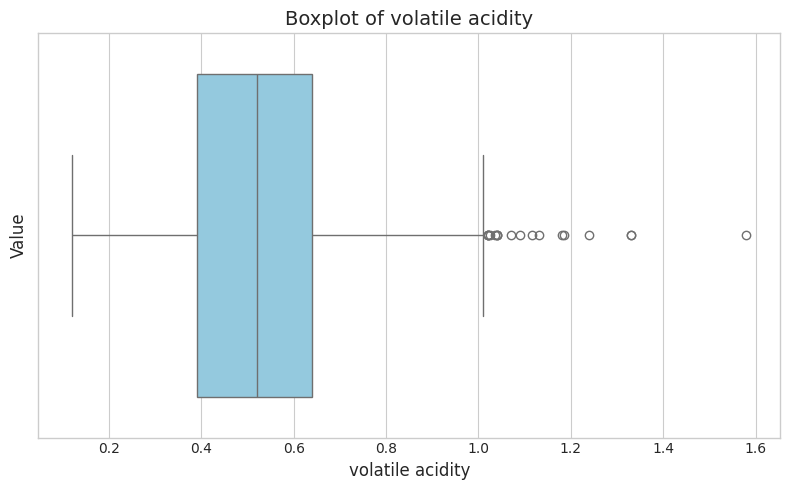

Outliers in volatile acidity:
38      1.130
94      1.020
120     1.070
126     1.330
127     1.330
134     1.040
199     1.090
553     1.040
672     1.240
690     1.185
700     1.020
705     1.035
710     1.025
724     1.115
899     1.020
1261    1.020
1299    1.580
1312    1.180
1467    1.040
Name: volatile acidity, dtype: float64




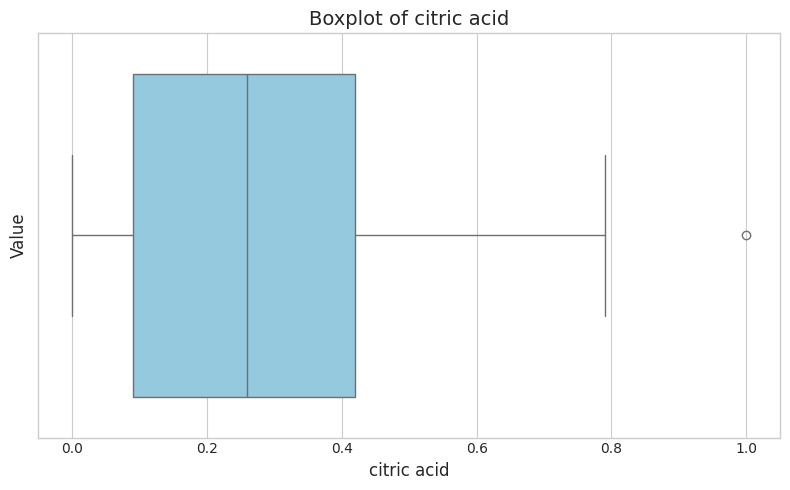

Outliers in citric acid:
151    1.0
Name: citric acid, dtype: float64




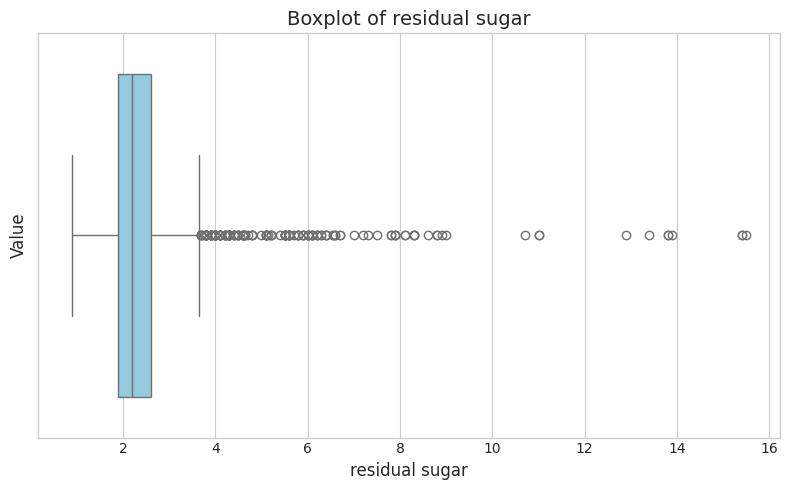

Outliers in residual sugar:
9        6.1
11       6.1
14       3.8
15       3.9
18       4.4
        ... 
1552     3.7
1558     6.7
1574    13.9
1577     5.1
1589     7.8
Name: residual sugar, Length: 155, dtype: float64




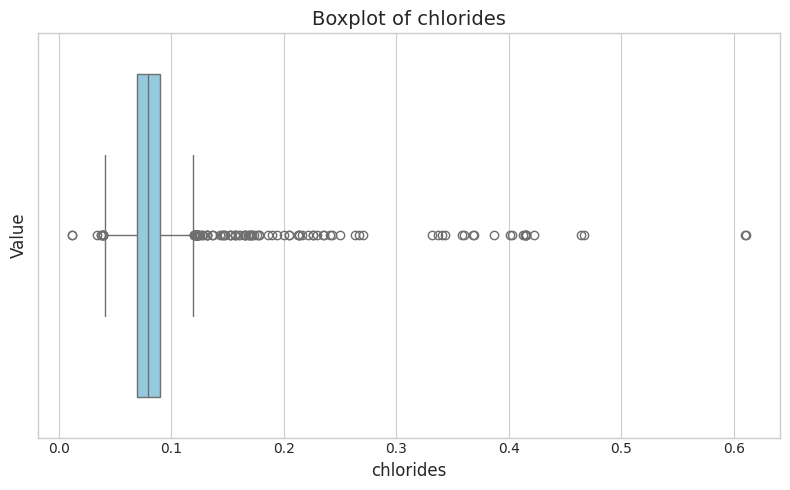

Outliers in chlorides:
14      0.176
15      0.170
17      0.368
19      0.341
38      0.172
        ...  
1476    0.205
1490    0.039
1558    0.235
1570    0.230
1571    0.038
Name: chlorides, Length: 112, dtype: float64




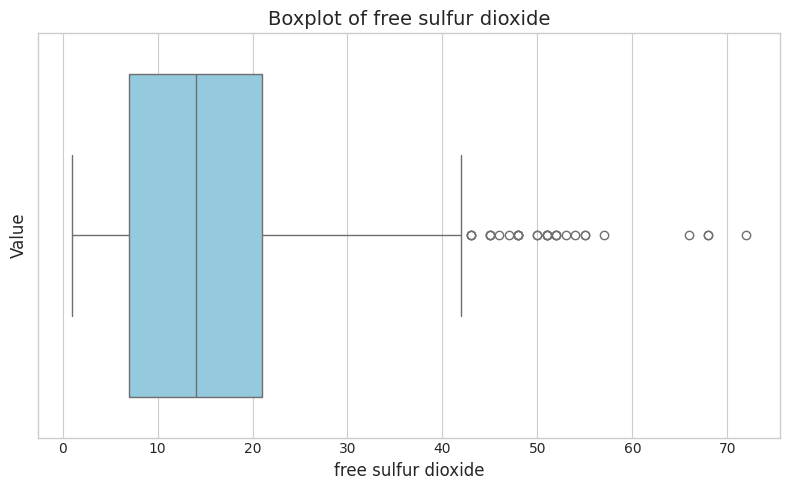

Outliers in free sulfur dioxide:
14      52.0
15      51.0
57      50.0
396     68.0
400     68.0
497     43.0
522     47.0
584     54.0
634     46.0
678     45.0
925     53.0
926     52.0
982     51.0
1075    45.0
1131    57.0
1154    50.0
1156    45.0
1175    48.0
1217    43.0
1231    48.0
1244    72.0
1256    43.0
1295    51.0
1296    51.0
1358    52.0
1434    55.0
1435    55.0
1474    48.0
1476    48.0
1558    66.0
Name: free sulfur dioxide, dtype: float64




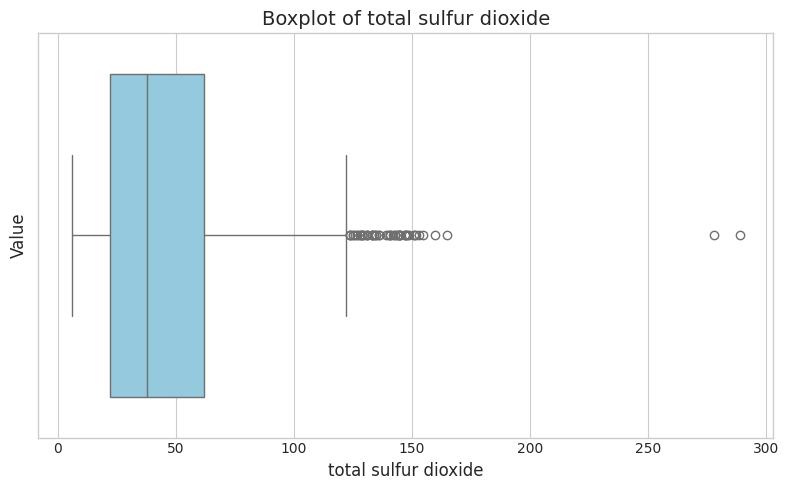

Outliers in total sulfur dioxide:
14      145.0
15      148.0
86      136.0
88      125.0
90      140.0
91      136.0
92      133.0
109     153.0
130     134.0
145     141.0
154     129.0
155     128.0
156     129.0
157     128.0
188     143.0
189     144.0
190     127.0
192     126.0
201     145.0
219     144.0
313     135.0
354     165.0
396     124.0
400     124.0
415     134.0
417     124.0
463     129.0
515     151.0
522     133.0
523     142.0
591     149.0
636     147.0
637     145.0
649     148.0
651     155.0
672     151.0
684     152.0
694     125.0
723     127.0
741     139.0
771     143.0
772     144.0
791     130.0
1079    278.0
1081    289.0
1131    135.0
1244    160.0
1400    141.0
1401    141.0
1419    133.0
1493    147.0
1496    147.0
1559    131.0
1560    131.0
1561    131.0
Name: total sulfur dioxide, dtype: float64




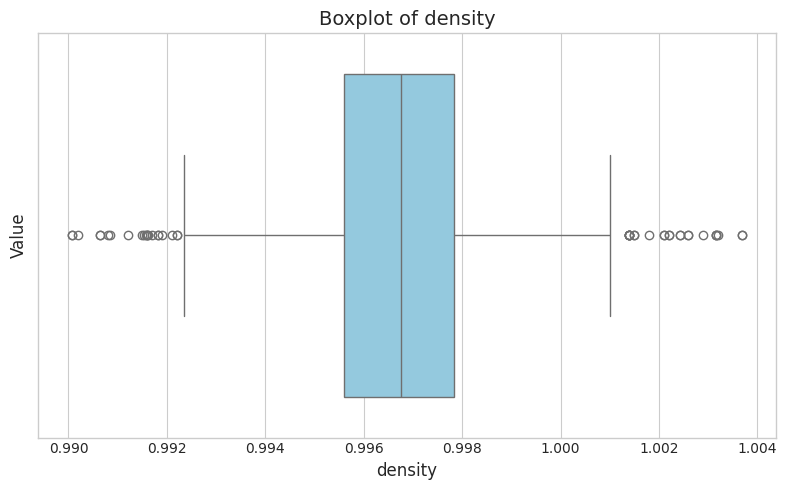

Outliers in density:
142     0.99160
144     0.99160
294     1.00140
324     1.00150
325     1.00150
353     1.00180
354     0.99120
364     1.00220
366     1.00220
374     1.00140
381     1.00140
391     1.00140
415     1.00140
442     1.00320
480     1.00260
538     1.00140
554     1.00315
555     1.00315
557     1.00315
559     1.00210
564     1.00210
588     0.99170
591     0.99220
608     1.00260
695     0.99210
821     0.99154
836     0.99064
837     0.99064
889     1.00289
999     0.99162
1017    0.99007
1018    0.99007
1114    0.99020
1122    0.99220
1126    0.99150
1228    0.99157
1269    0.99080
1270    0.99084
1298    0.99191
1434    1.00369
1435    1.00369
1474    1.00242
1475    0.99182
1476    1.00242
1477    0.99182
Name: density, dtype: float64




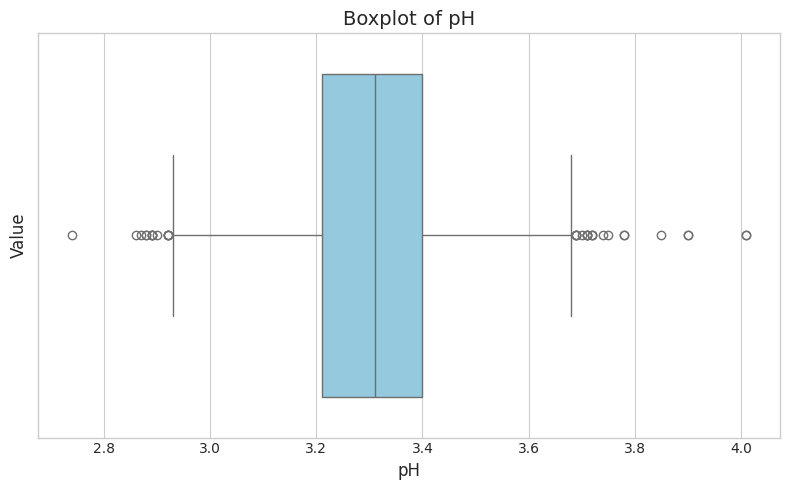

Outliers in pH:
45      3.90
94      3.75
95      3.85
151     2.74
268     3.69
276     3.69
440     2.88
544     2.86
553     3.74
554     2.92
555     2.92
557     2.92
588     3.72
614     2.87
650     2.89
656     2.89
657     2.92
695     3.90
821     3.71
930     3.69
934     3.69
996     3.71
997     3.71
1017    2.89
1018    2.89
1111    3.78
1270    3.70
1300    3.78
1316    4.01
1319    2.90
1321    4.01
1377    3.71
1470    2.88
1488    3.72
1491    3.72
Name: pH, dtype: float64




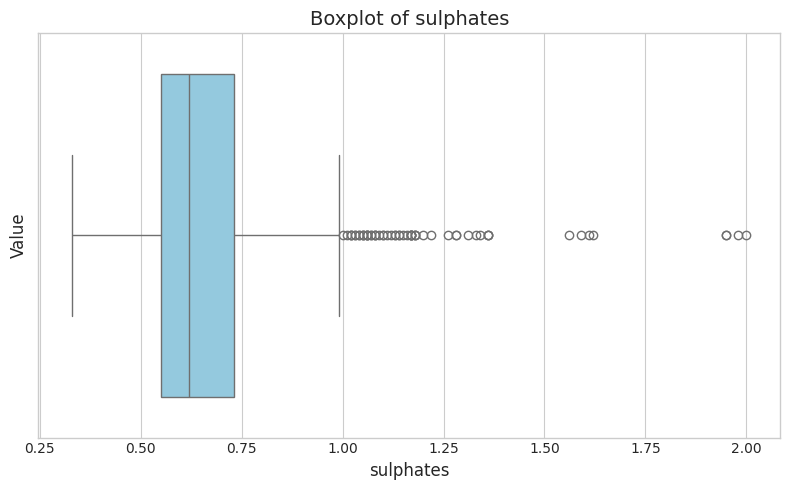

Outliers in sulphates:
13      1.56
17      1.28
19      1.08
43      1.20
79      1.12
81      1.28
83      1.14
86      1.95
88      1.22
91      1.95
92      1.98
106     1.31
151     2.00
161     1.08
169     1.59
181     1.02
201     1.03
226     1.61
240     1.09
258     1.26
281     1.08
338     1.00
339     1.36
340     1.18
369     1.13
372     1.04
376     1.11
377     1.13
415     1.07
451     1.06
477     1.06
482     1.05
483     1.06
503     1.04
504     1.05
506     1.02
515     1.14
586     1.02
614     1.36
639     1.36
689     1.05
692     1.17
723     1.62
754     1.06
795     1.18
852     1.07
1051    1.34
1158    1.16
1165    1.10
1260    1.15
1288    1.17
1289    1.17
1319    1.33
1367    1.18
1370    1.17
1371    1.03
1372    1.17
1403    1.10
1408    1.01
Name: sulphates, dtype: float64




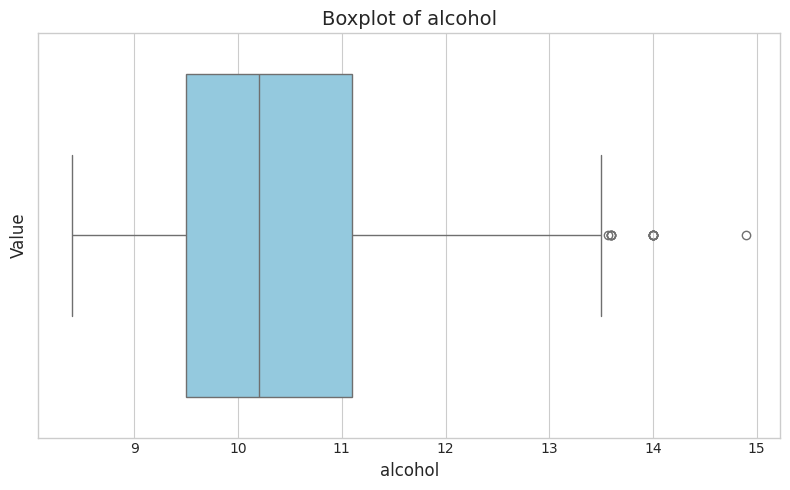

Outliers in alcohol:
142     14.000000
144     14.000000
467     14.000000
588     14.000000
652     14.900000
821     14.000000
1114    13.600000
1132    13.600000
1228    13.600000
1269    14.000000
1270    14.000000
1475    13.566667
1477    13.600000
Name: alcohol, dtype: float64




In [18]:
# Set up the plotting environment
plt.style.use('seaborn-v0_8-whitegrid')

# Loop through each column (excluding the target column)
for column in red_wine.columns[:-1]:  # Exclude 'target'
    plt.figure(figsize=(8, 5))
    
    # Boxplot to visualize outliers
    sns.boxplot(x=red_wine[column], color="skyblue")
    plt.title(f"Boxplot of {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.tight_layout()
    plt.show()

    # Statistical detection of outliers
    Q1 = red_wine[column].quantile(0.25)
    Q3 = red_wine[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = red_wine[(red_wine[column] < lower_bound) | (red_wine[column] > upper_bound)]
    
    print(f"Outliers in {column}:")
    print(outliers[column])
    print("\n")

In [19]:
# Find the outliers in each Feature/ Column 

# Initialize a dictionary to store outlier counts
outlier_counts = {}

# Loop through each column (excluding the target column)
for column in red_wine.columns[:-1]:  # Exclude 'target'
    Q1 = red_wine[column].quantile(0.25)
    Q3 = red_wine[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = red_wine[(red_wine[column] < lower_bound) | (red_wine[column] > upper_bound)]
    outlier_counts[column] = len(outliers)

# Convert the outlier counts to a DataFrame for presentation
outlier_table = pd.DataFrame(list(outlier_counts.items()), columns=["Feature", "Outlier Count"])

# Display the table
print(outlier_table)

                 Feature  Outlier Count
0          fixed acidity             49
1       volatile acidity             19
2            citric acid              1
3         residual sugar            155
4              chlorides            112
5    free sulfur dioxide             30
6   total sulfur dioxide             55
7                density             45
8                     pH             35
9              sulphates             59
10               alcohol             13


### Observations and Insights:
**Features with High Outlier Counts :**
1. Residual Sugar (155 outliers) : This feature has the highest number of outliers, indicating significant variability in sugar content across wines. Some wines likely have unusually high residual sugar levels, which could represent sweet or dessert wines.
2. Chlorides (112 outliers) : Chloride levels also show a large number of outliers, suggesting that some wines have unusually high salt content. This could be due to specific winemaking practices or regional differences.
3. Sulphates (59 outliers) : Sulphate levels exhibit many outliers, possibly reflecting variations in preservative usage or natural sulphate content in certain wines.

**Features with Moderate Outlier Counts :**
1. Fixed Acidity (49 outliers) : Fixed acidity has a moderate number of outliers, indicating some wines with unusually high or low acidity levels. This could affect the taste profile of these wines.
2. Density (45 outliers) : Density also has a moderate number of outliers, which might correlate with residual sugar or alcohol content, as these factors influence wine density.
3. pH (35 outliers) : pH values show a moderate number of outliers, suggesting some wines have unusually acidic or basic properties.

**Features with Low Outlier Counts :**
1. Citric Acid (1 outlier) : Citric acid has only one outlier, indicating that this feature is relatively stable and well-distributed across the dataset.
2. Alcohol (13 outliers) : Alcohol content has relatively few outliers, suggesting most wines fall within a standard range of alcohol levels.
**Free Sulfur Dioxide vs. Total Sulfur Dioxide :**
Both features related to sulfur dioxide (free sulfur dioxide and total sulfur dioxide) show a moderate-to-high number of outliers (30 and 55, respectively). This suggests variability in how sulphur dioxide is used during winemaking, with some wines having unusually high levels of preservatives.

### Conclusion:
**High Variability in Certain Features :**
Features like residual sugar , chlorides , and sulphates exhibit high variability, with many outliers. These features may require further investigation to understand their impact on wine quality and whether they represent meaningful patterns or errors in the data.

**Stable Features :**
Features like citric acid and alcohol have very few outliers, indicating that these properties are relatively consistent across the dataset.

**Potential Anomalies :**
The presence of outliers in features like fixed acidity , density , and pH suggests that some wines have unique characteristics that deviate from the norm. These anomalies could be worth exploring further to determine if they correspond to specific wine types or production methods.

**Implications for Modeling :**
Outliers can significantly affect machine learning models, especially those sensitive to extreme values (e.g., linear regression). Depending on the analysis goals, you may need to:
1. Remove outliers : If they are deemed erroneous or irrelevant.
2. Transform the data : Apply techniques like log transformation to reduce the impact of extreme values.
3. Keep outliers : If they represent meaningful variations in the data.


**- If there are multiple related histograms, how does the distribution change across different groups?**

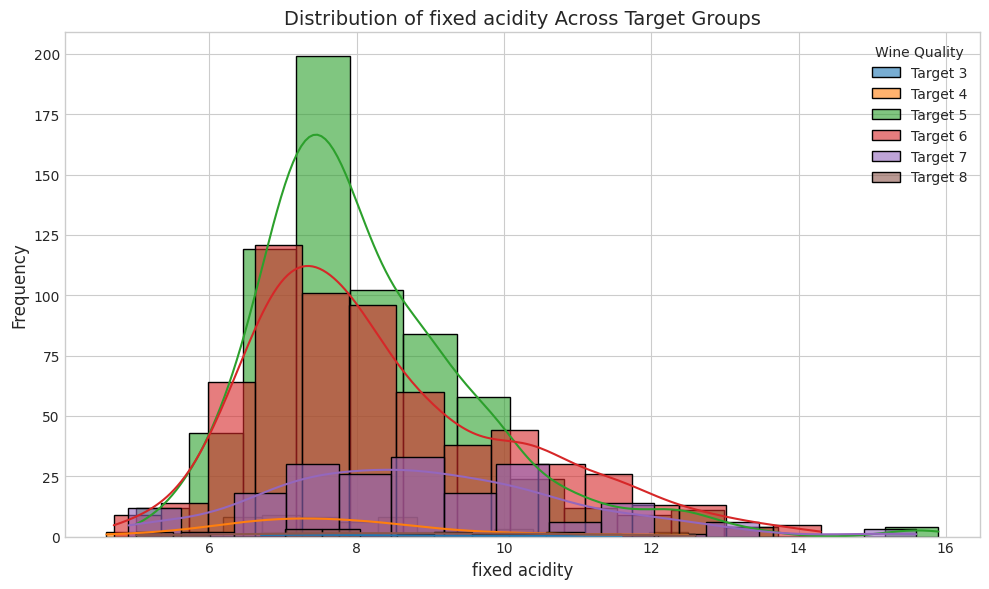

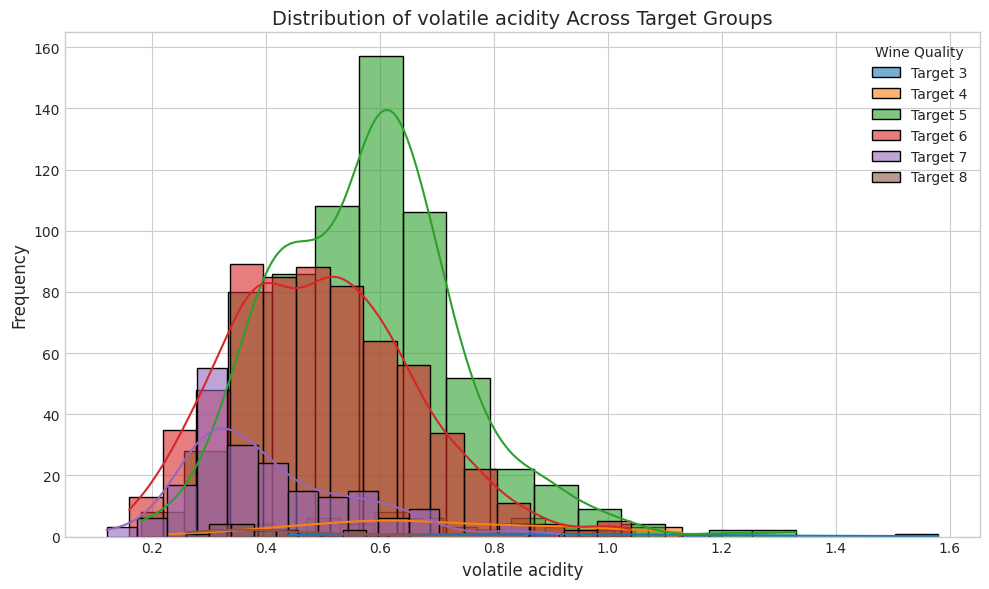

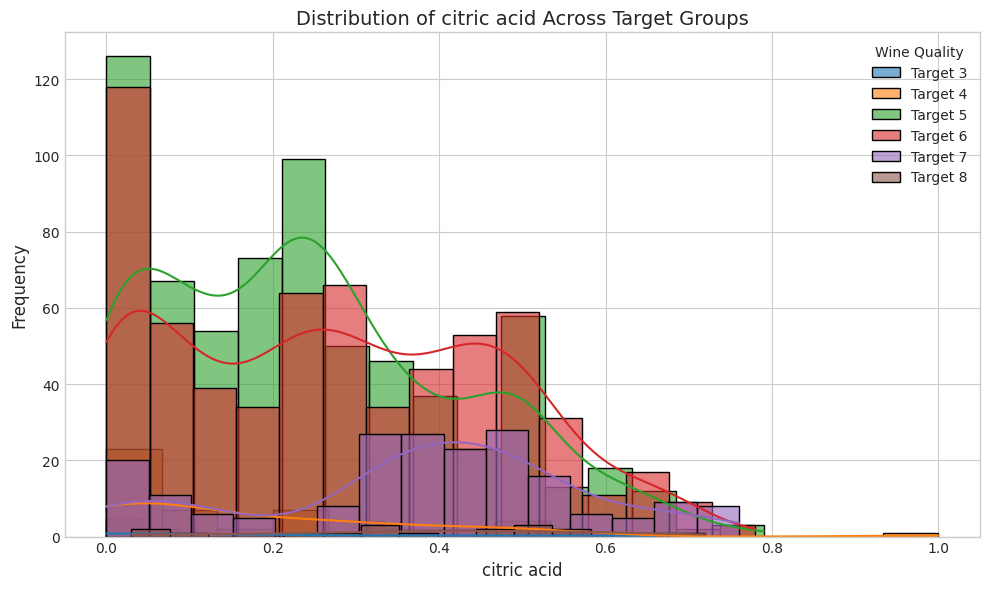

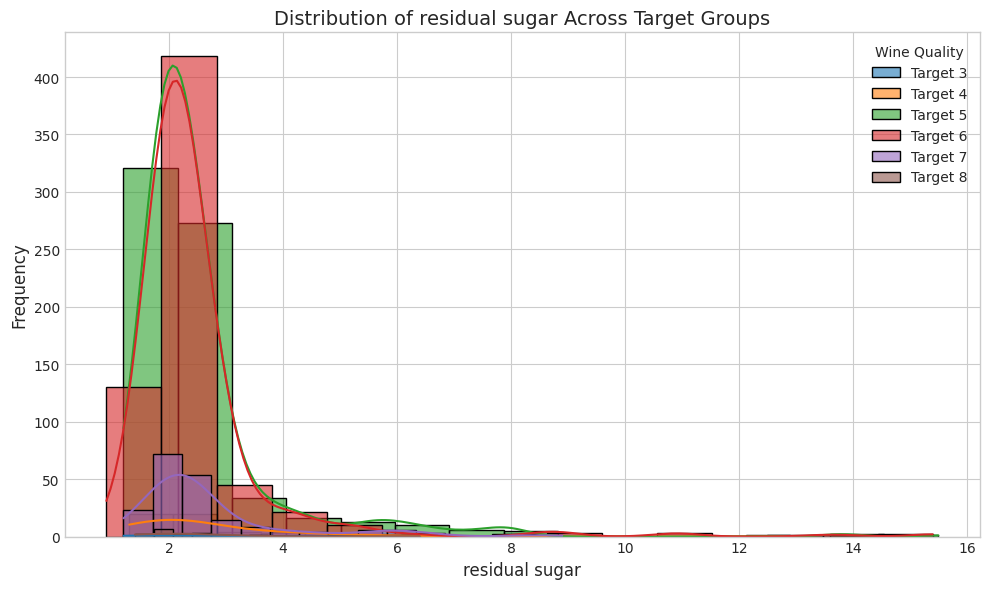

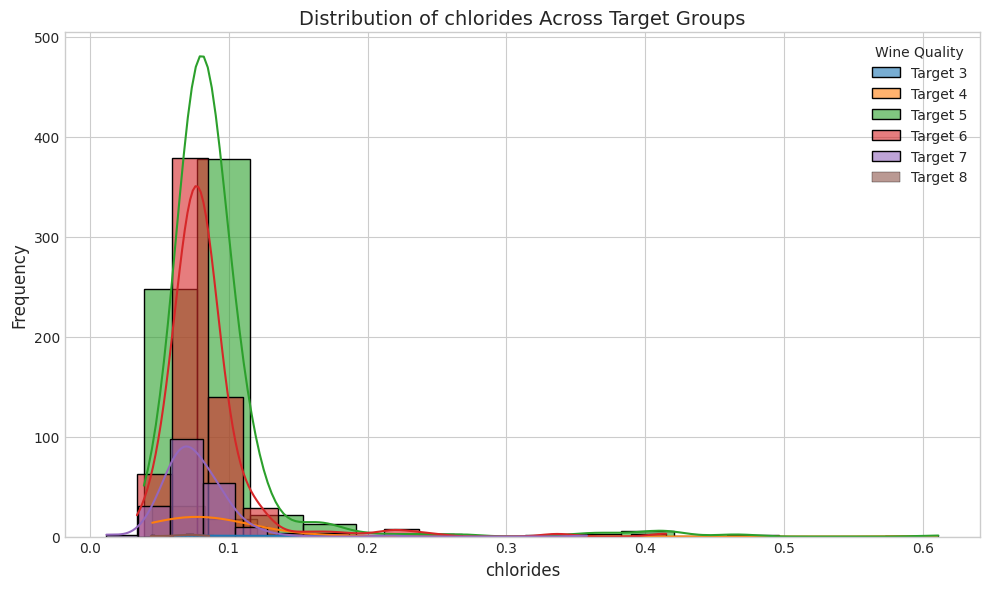

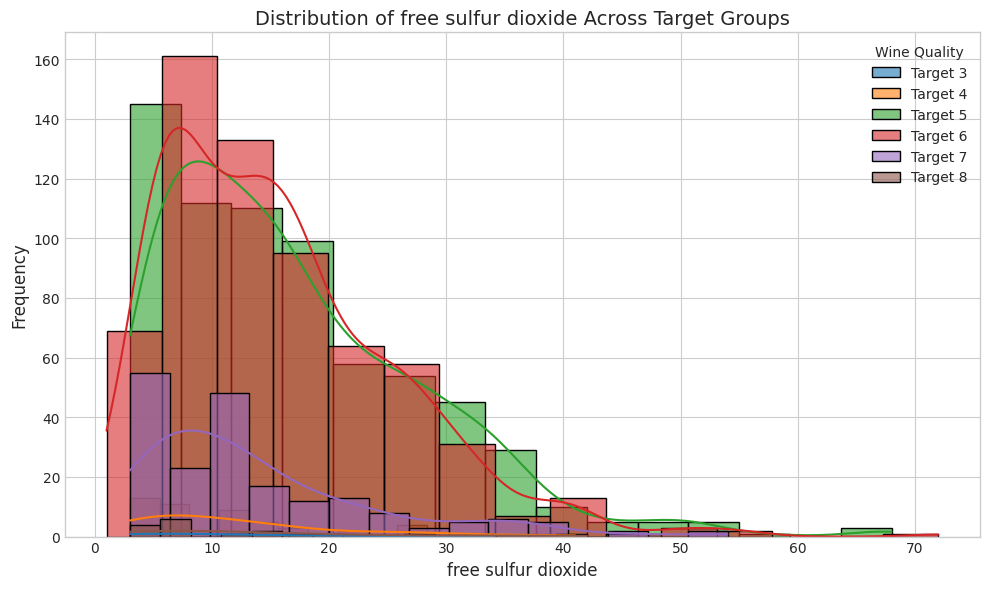

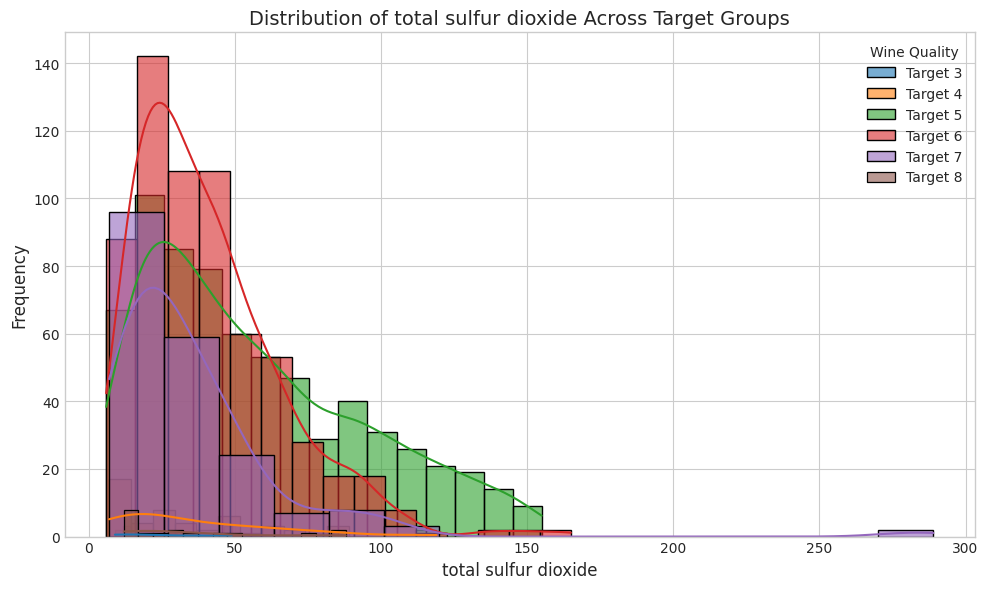

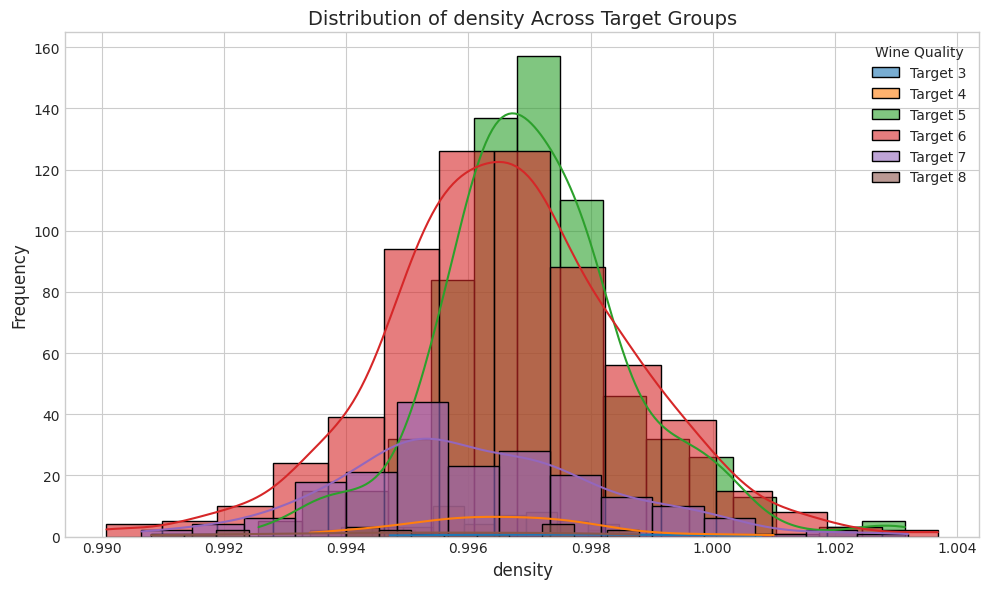

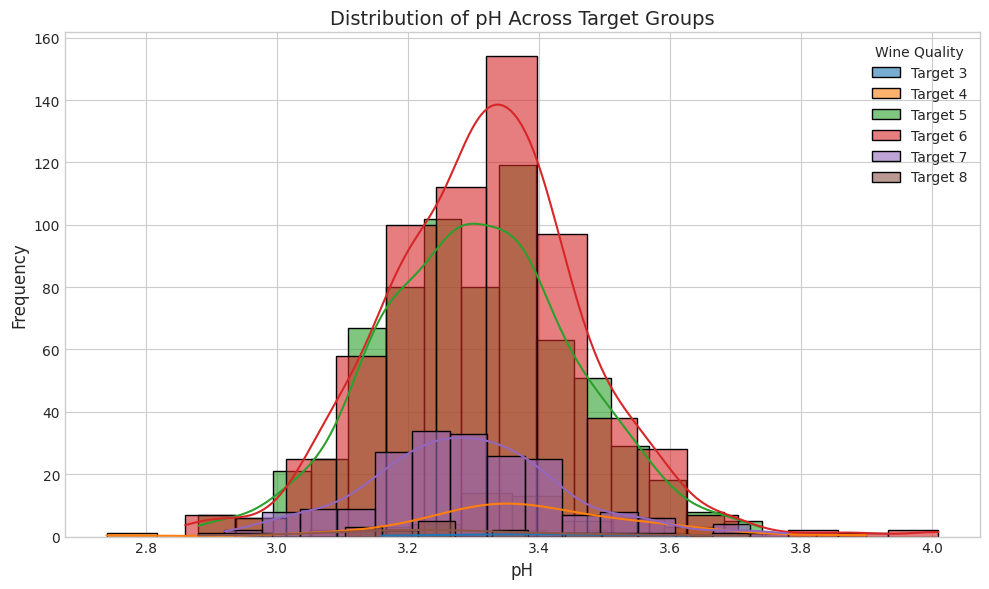

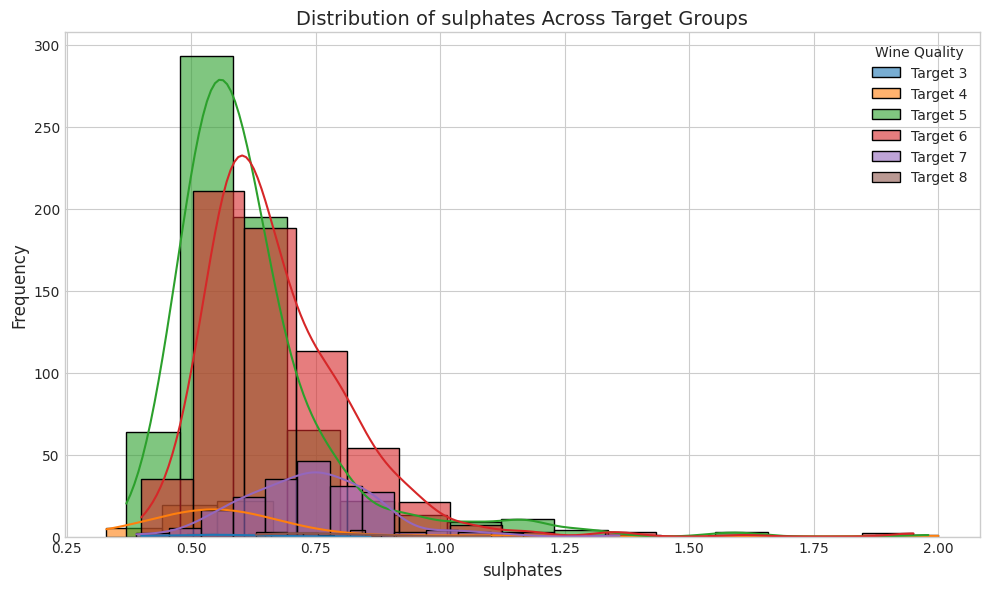

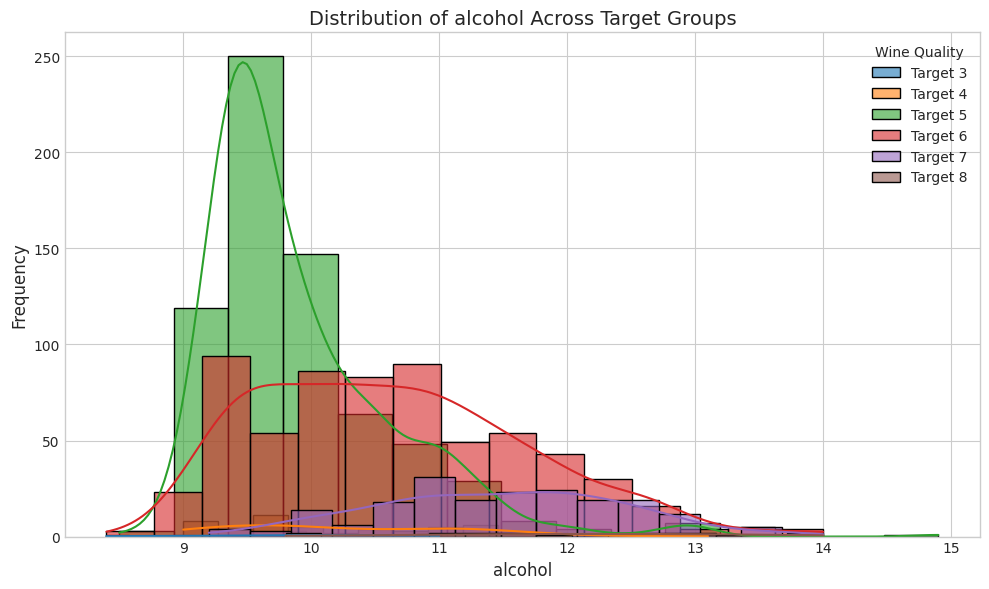

In [20]:
# Set up the plotting environment
plt.style.use('seaborn-v0_8-whitegrid')

# Loop through each column (excluding the target column)
for column in red_wine.columns[:-1]:  # Exclude 'target'
    plt.figure(figsize=(10, 6))
    
    # Overlay histograms for each target group
    for target_value, group in red_wine.groupby('target'):
        sns.histplot(group[column], bins=15, label=f"Target {target_value}", alpha=0.6, kde=True)
    
    plt.title(f"Distribution of {column} Across Target Groups", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend(title="Wine Quality")
    plt.tight_layout()
    plt.show()

### Key Observations and Conclusions :

1. Fixed Acidity :
Distribution Across Groups : Wines with higher quality ratings (e.g., target = 7) tend to have slightly lower fixed acidity compared to wines with average quality (target = 5).
Conclusion : Lower fixed acidity may be associated with better-quality wines, as excessive acidity can negatively impact taste.

2. Volatile Acidity :
Distribution Across Groups : Wines with higher quality ratings (target = 6 or 7) generally exhibit lower volatile acidity compared to lower-quality wines (target = 4 or 5).
Conclusion : High volatile acidity is often associated with off-flavors, so lower levels are preferred in high-quality wines.

3. Citric Acid :
Distribution Across Groups : Higher-quality wines (target = 6 or 7) show slightly higher citric acid levels compared to lower-quality wines.
Conclusion : Citric acid contributes to a fresher taste, and its presence may enhance wine quality.

4. Residual Sugar :
Distribution Across Groups : Residual sugar varies significantly across groups, but there is no clear trend linking residual sugar directly to quality.
Some high-quality wines (target = 7) have low residual sugar, while others have moderate levels.
Conclusion : Residual sugar does not appear to be a strong determinant of wine quality, as both dry and sweet wines can achieve high ratings.

5. Chlorides :
Distribution Across Groups : Wines with higher quality ratings (target = 6 or 7) tend to have lower chloride levels compared to lower-quality wines.
Conclusion : High chloride levels may indicate excess saltiness, which is undesirable in high-quality wines.

6. Free Sulfur Dioxide :
Distribution Across Groups : Free sulfur dioxide levels vary widely, but higher-quality wines (target = 6 or 7) tend to have more consistent and moderate levels.
Conclusion : Proper use of preservatives (sulfur dioxide) is critical for maintaining wine quality, and extreme values may negatively affect taste.

7. Total Sulfur Dioxide :
Distribution Across Groups : Similar to free sulfur dioxide, total sulfur dioxide levels are more consistent in higher-quality wines.
Conclusion : Balanced sulfur dioxide levels are essential for preserving wine without compromising flavor.

8. Density :
Distribution Across Groups : Density distributions overlap significantly across groups, with no clear distinction between quality levels.
Conclusion : Density does not appear to strongly correlate with wine quality, as it is influenced by multiple factors like alcohol and sugar content.

9. pH :
Distribution Across Groups : pH levels are relatively consistent across all quality groups, with slight variations.
Conclusion : pH does not seem to be a major factor in determining wine quality, as long as it remains within an acceptable range.

10. Sulphates :
Distribution Across Groups : Higher-quality wines (target = 6 or 7) tend to have slightly higher sulphate levels compared to lower-quality wines.
Conclusion : Sulphates contribute to wine preservation and flavor complexity, which may explain their positive association with quality.

11. Alcohol :
Distribution Across Groups : Higher-quality wines (target = 6 or 7) generally have higher alcohol content compared to lower-quality wines.
Conclusion : Alcohol content appears to be positively correlated with wine quality, possibly due to its influence on body and flavor intensity.

### General Insights :
**Quality Trends :**
1. Features like volatile acidity , chlorides , and free/total sulfur dioxide show clear trends where lower variability and optimal levels are associated with higher-quality wines.
2. Features like citric acid , sulphates , and alcohol exhibit positive associations with wine quality.

**Neutral Features :**
1. Features such as residual sugar , density , and pH do not show strong correlations with wine quality, suggesting they are less influential or context-dependent.

**Importance of Balance :**
1. High-quality wines tend to exhibit balanced levels of acidity, preservatives, and other chemical properties, highlighting the importance of moderation in winemaking.

**Implications for Modeling :**
1. Features that show clear differences across quality groups (e.g., volatile acidity, alcohol) are likely to be strong predictors in machine learning models for wine quality classification.

**- What are the minimum and maximum values represented in each histogram?**

In [21]:
# Calculate min and max values for each feature
min_max_values = red_wine.iloc[:, :-1].agg(['min', 'max'])

# Convert the result to a DataFrame for better presentation
min_max_table = min_max_values.transpose()
min_max_table.columns = ['Minimum Value', 'Maximum Value']

# Display the table
print(min_max_table)

                      Minimum Value  Maximum Value
fixed acidity               4.60000       15.90000
volatile acidity            0.12000        1.58000
citric acid                 0.00000        1.00000
residual sugar              0.90000       15.50000
chlorides                   0.01200        0.61100
free sulfur dioxide         1.00000       72.00000
total sulfur dioxide        6.00000      289.00000
density                     0.99007        1.00369
pH                          2.74000        4.01000
sulphates                   0.33000        2.00000
alcohol                     8.40000       14.90000


### Key Observations and Insights :
1. Fixed Acidity :
Range : 4.6 to 15.9.
Insight : Fixed acidity varies significantly, indicating that wines in the dataset span a wide spectrum from low-acid to high-acid varieties. This could reflect differences in grape variety, climate, or winemaking techniques.
2. Volatile Acidity :
Range : 0.12 to 1.58.
Insight : Volatile acidity has a broad range, with lower values typically associated with better-quality wines. High volatile acidity (close to 1.58) may indicate spoilage or off-flavors.
3. Citric Acid :
Range : 0.0 to 1.0.
Insight : Citric acid levels vary widely, with some wines lacking citric acid entirely (0.0). Higher levels contribute to a fresher taste, while lower levels may indicate aging or specific winemaking practices.
4. Residual Sugar :
Range : 0.9 to 15.5.
Insight : The wide range reflects the diversity of wine styles, from very dry wines (low residual sugar) to sweet dessert wines (high residual sugar).
5. Chlorides :
Range : 0.012 to 0.611.
Insight : Chloride levels vary significantly, with higher values potentially indicating excess saltiness. Wines with chloride levels near 0.611 may be less desirable.
6. Free Sulfur Dioxide :
Range : 1.0 to 72.0.
Insight : Free sulfur dioxide levels show substantial variability, reflecting differences in preservative usage during winemaking. Extremely high levels (e.g., 72.0) may affect taste.
7. Total Sulfur Dioxide :
Range : 6.0 to 289.0.
Insight : Total sulfur dioxide has an even wider range than free sulfur dioxide, highlighting significant differences in overall preservative content across wines.
8. Density :
Range : 0.99007 to 1.00369.
Insight : Density varies slightly, influenced by factors like alcohol and residual sugar content. Higher density values may correspond to sweeter or less alcoholic wines.
9. pH :
Range : 2.74 to 4.01.
Insight : pH values span a moderate range, with most wines falling within an acceptable acidity level. Lower pH values indicate higher acidity, which can affect taste and preservation.
10. Sulphates :
Range : 0.33 to 2.0.
Insight : Sulphate levels vary significantly, with higher values potentially enhancing flavor complexity and preservation. However, excessively high sulphates (e.g., 2.0) may negatively impact taste.
11. Alcohol :
Range : 8.4 to 14.9.
Insight : Alcohol content shows moderate variability, with higher values often associated with fuller-bodied wines. Wines with alcohol levels near 14.9 may appeal to consumers seeking stronger flavors.

### General Conclusions :
1. Wide Variability in Some Features :
Features like residual sugar , free sulfur dioxide , total sulfur dioxide , and alcohol exhibit wide ranges, reflecting the diversity of wine styles and production methods.
For example, residual sugar ranges from very dry (0.9) to very sweet (15.5), accommodating different consumer preferences.

2. Moderate Variability in Others :
Features like fixed acidity , volatile acidity , and pH show moderate variability, suggesting that these properties are more tightly controlled during winemaking.

3. Outliers and Extreme Values :
Some features, such as chlorides (up to 0.611) and total sulfur dioxide (up to 289.0), have extreme maximum values that may represent outliers or unusual cases. These values warrant further investigation to determine their impact on wine quality.

4. Implications for Modeling :
Features with wide ranges (e.g., residual sugar , total sulfur dioxide ) may require scaling or transformation before being used in machine learning models.
Extreme values should be carefully examined to decide whether they represent meaningful variations or errors in the data.

5. Quality and Consumer Preferences :
The diversity in wine characteristics suggests that the dataset captures a wide range of wine styles, catering to different tastes and preferences. This makes it suitable for analyzing how various chemical properties influence perceived quality.

**- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?**


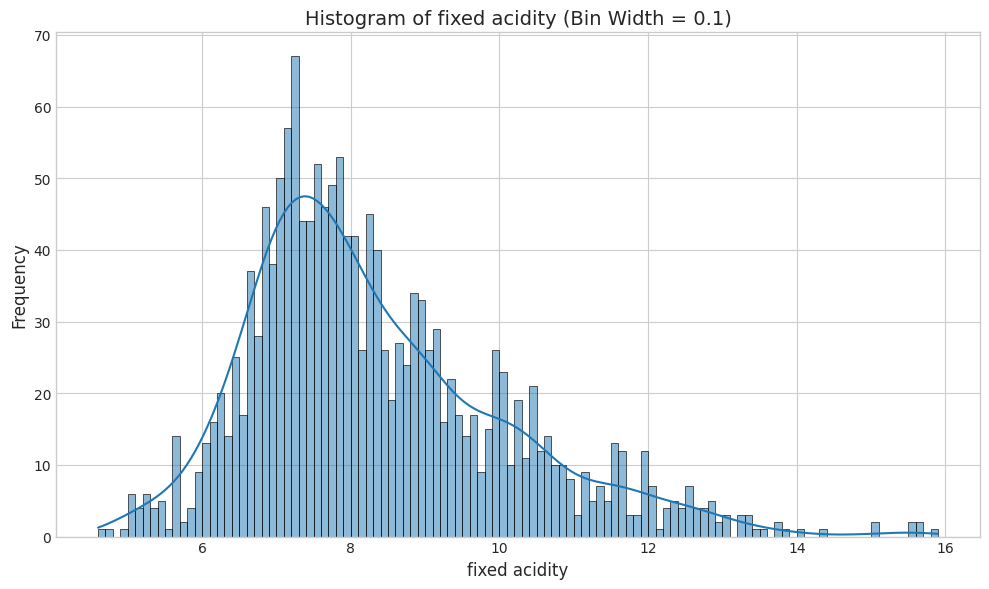

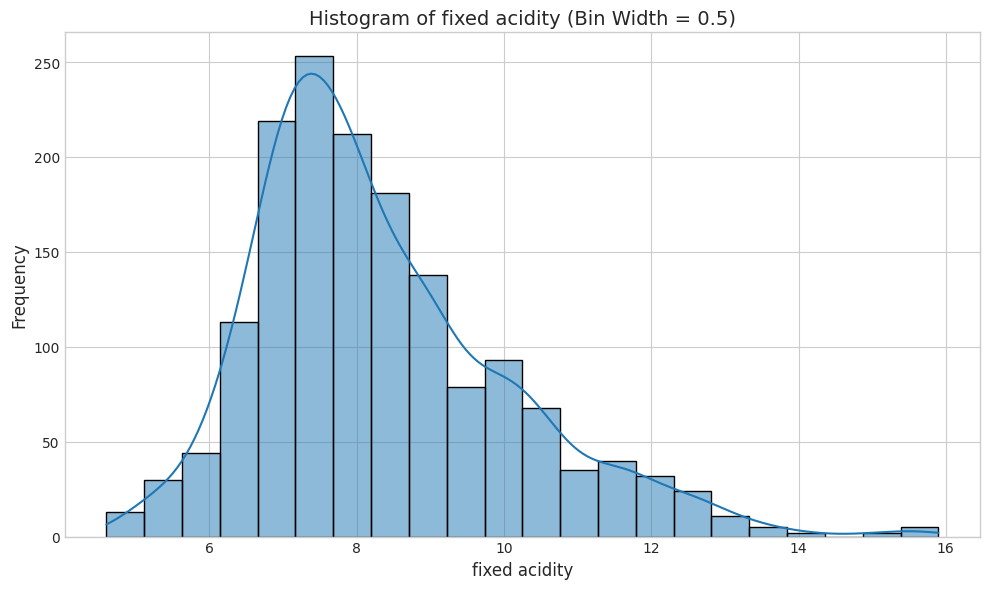

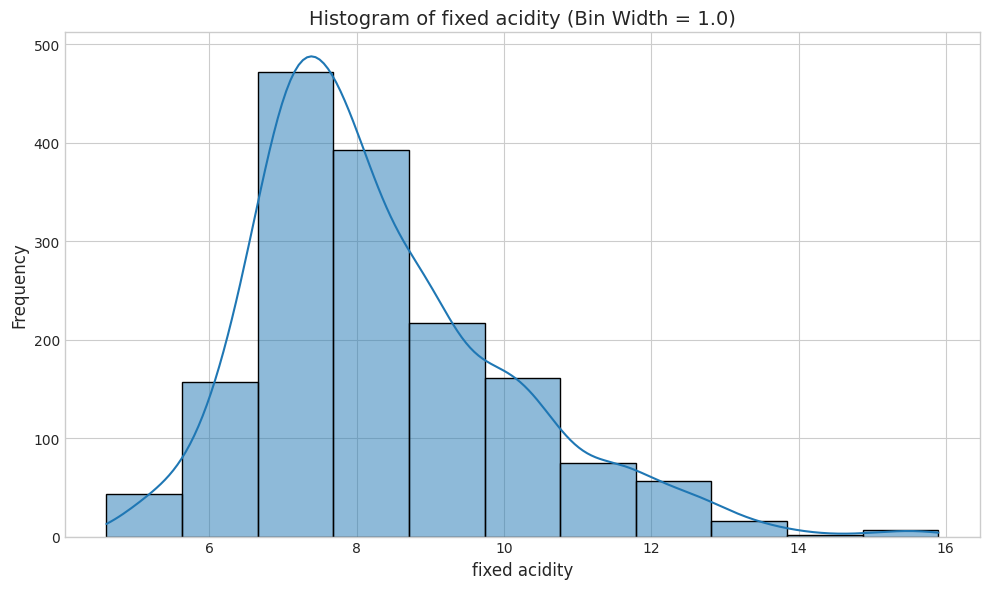

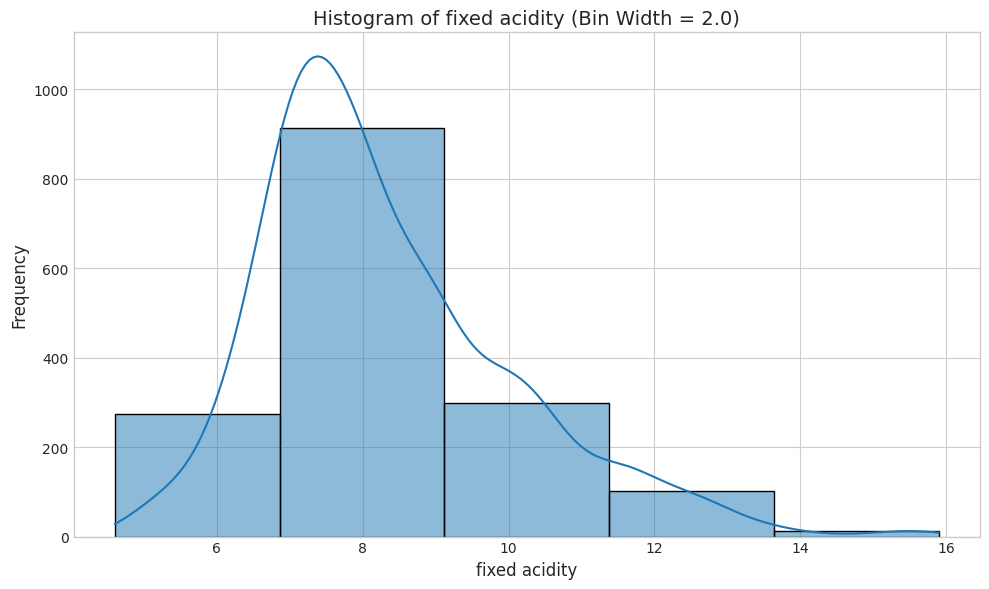

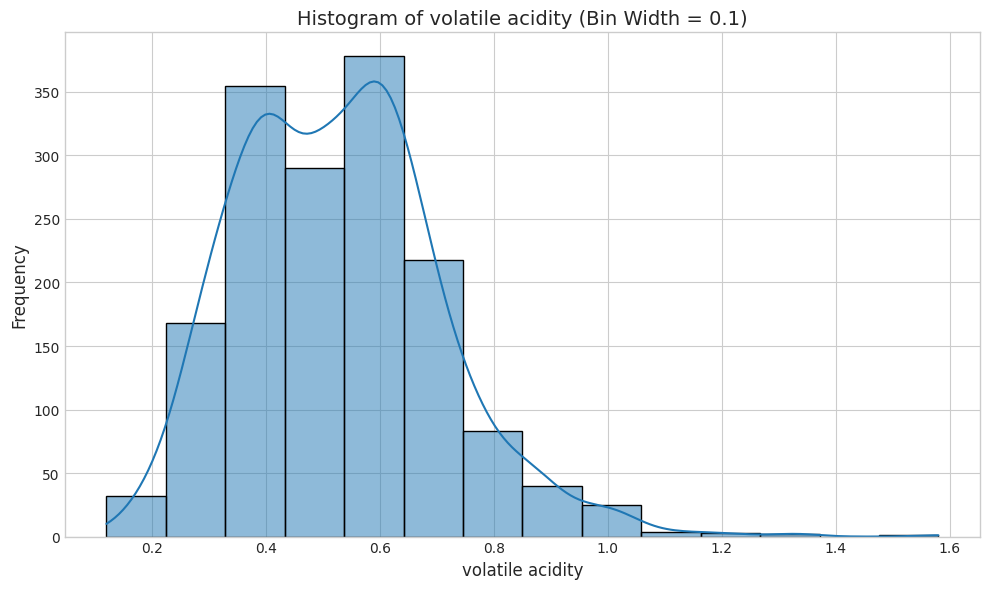

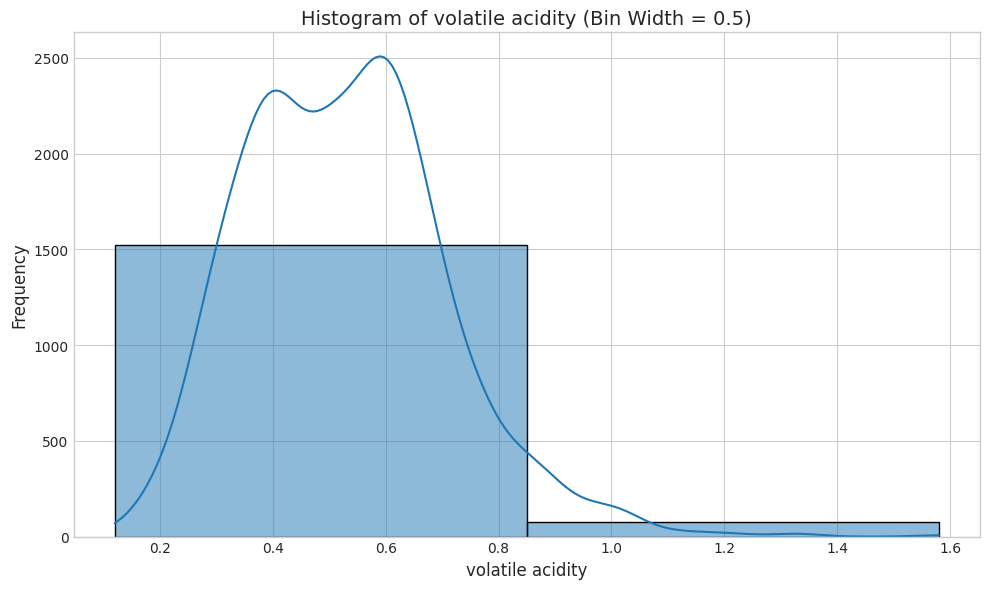

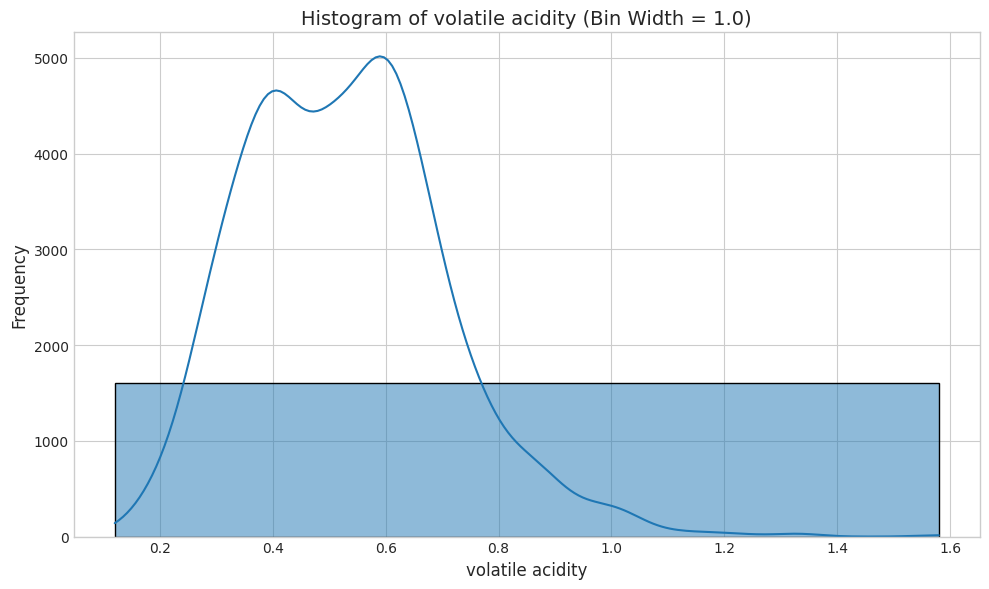

ValueError: `bins` must be positive, when an integer

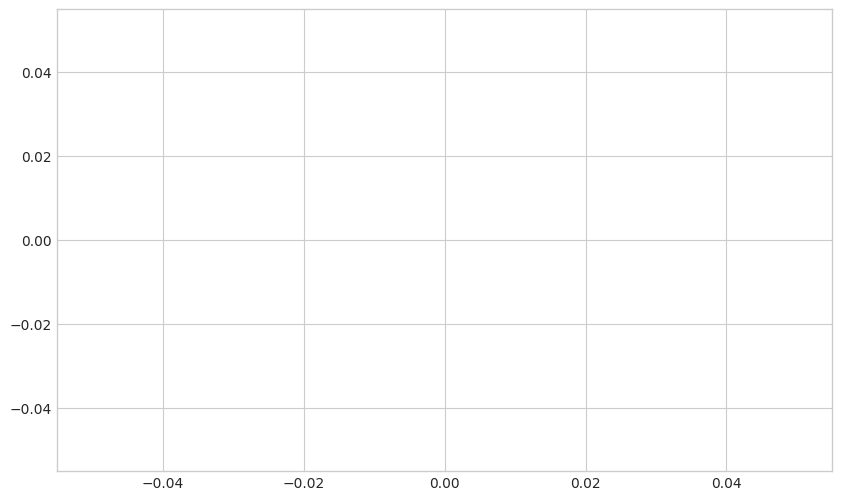

In [22]:
# Set up the plotting environment
plt.style.use('seaborn-v0_8-whitegrid')

# Define bin widths to test
bin_widths = [0.1, 0.5, 1.0, 2.0]

# Loop through each column (excluding the target column)
for column in red_wine.columns[:-1]:  # Exclude 'target'
    for bin_width in bin_widths:
        plt.figure(figsize=(10, 6))
        
        # Create histogram with specified bin width
        sns.histplot(red_wine[column], bins=int((red_wine[column].max() - red_wine[column].min()) / bin_width), kde=True)
        plt.title(f"Histogram of {column} (Bin Width = {bin_width})", fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.tight_layout()
        plt.show()

## Key Observations from Varying Bin Sizes :
1. Fixed Acidity :
Narrow bins reveal multiple peaks, suggesting a multimodal distribution.
Wide bins smooth out these peaks, showing an overall right-skewed distribution.

2. Volatile Acidity :
Narrow bins highlight a few extreme outliers and a concentration of values around the lower end.
Wide bins emphasize the general trend of low volatile acidity being more common.

3. Residual Sugar :
Narrow bins expose a long tail of high residual sugar values, indicating the presence of sweet wines.
Wide bins simplify this into a right-skewed distribution.

4. Chlorides :
Narrow bins show spikes at specific chloride levels, possibly reflecting standard practices.
Wide bins smooth these spikes, emphasizing the overall range.

5. Free Sulfur Dioxide :
Narrow bins reveal clusters of values, suggesting specific dosing levels.
Wide bins generalize these clusters into a broad distribution.

6. Total Sulfur Dioxide :
Narrow bins highlight a wide spread of values, with some extreme outliers.
Wide bins reduce the emphasis on outliers, focusing on the central tendency.

7. Density :
Narrow bins capture subtle variations in density values.
Wide bins show a tight clustering around a central peak.

8. Alcohol :
Narrow bins reveal slight multimodality, indicating distinct groups of alcohol content.
Wide bins simplify this into a unimodal distribution.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.